In [1]:
#Prints **all** console output, not just last item in cell 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Boilerplate

In [2]:
from joblib import Parallel, delayed
from tqdm import tqdm

In [3]:
import numpy as np

In [4]:
from numba import jit,njit

In [5]:
from boilerplate import *
from probdist import *

# Choose distributions to load and analyze

In [6]:
from os import getcwd
# os.chdir("/home/AD/emeinhar/c2-jnA/")
print('CWD: ' + getcwd())

CWD: /home/AD/emeinhar/c2-jn


In [7]:
# which_alignment = 'unaligned'
which_alignment = 'Hammond-aligned'
# which_alignment = 'IPhOD-aligned'

which_stress = 'destressed'
# which_stress = 'stressed'

# pseudocount = 0
pseudocount = 0.001
# pseudocount = 0.01
# pseudocount = 1
which_pseudocount = 'pseudocount' + str(pseudocount)

which = '_'.join([which_alignment, which_stress, which_pseudocount])
whichNoCount = '_'.join([which_alignment, which_stress])

In [8]:
which
whichNoCount

'Hammond-aligned_destressed_pseudocount0.001'

'Hammond-aligned_destressed'

In [9]:
%ls *Hammond-aligned_destressed*

 Hammond-aligned_destressed_fourCousins.json
'Hammond-aligned_destressed gate3 trials.csv'
'Hammond-aligned_destressed gate6 trials.csv'
 Hammond-aligned_destressed_oneCousins.json
'Hammond-aligned_destressed_pseudocount0.0011 f3_Y0Y1_X0X1.json'
'Hammond-aligned_destressed_pseudocount0.0011 f6_Y0Y1_X0X1.json'
'Hammond-aligned_destressed_pseudocount0.0011 p3Y01X01.json'
'Hammond-aligned_destressed_pseudocount0.0011 p3Y0X01.json'
'Hammond-aligned_destressed_pseudocount0.0011 p3Y1X01.json'
'Hammond-aligned_destressed_pseudocount0.0011 p3YX.json'
'Hammond-aligned_destressed_pseudocount0.0011 p6Y01X01.json'
'Hammond-aligned_destressed_pseudocount0.0011 p6Y0X01.json'
'Hammond-aligned_destressed_pseudocount0.0011 p6Y1X01.json'
'Hammond-aligned_destressed_pseudocount0.0011 p6YX.json'
'Hammond-aligned_destressed_pseudocount0.0011 pY1X0X1X2.json'
'Hammond-aligned_destressed_pseudocount0.0011 pYX.json'
'Hammond-aligned_destressed_pseudocount0.001 f3_Y0Y1_X0X1.json'
'Hammond-aligned_destressed_pse

## Import channel distributions

In [10]:
uniphone_suff = ' pYX'
triphone_suff = ' pY1X0X1X2'
preview_suff = ' p3Y1X01'

file_ext = '.json'

uniphone_fn = which + uniphone_suff + file_ext
triphone_fn = which + triphone_suff + file_ext
preview_fn = which + preview_suff + file_ext

In [11]:
with open(uniphone_fn, encoding='utf-8') as data_file:
   uniph_dist = json.loads(data_file.read())

with open(triphone_fn, encoding='utf-8') as data_file:
   triph_dist = json.loads(data_file.read())

triph_channel_dist = triph_dist

with open(preview_fn, encoding='utf-8') as data_file:
   preview_dist = json.loads(data_file.read())

In [12]:
assert areNormalized(uniph_dist)
assert areNormalized(triph_dist)
assert areNormalized(preview_dist)

In [13]:
# %ls *phatXhat0fX0k*

In [14]:
# incPosterior_fn_suff = 'phatXhat0fX0k'
# incPosterior_fn_suff_K2only = incPosterior_fn_suff + '_K2only'
# incPosterior_ext = '.npy'

# my_fn_suff = incPosterior_fn_suff_K2only
# # my_N = None
# # my_N = 80274
# my_N = 230951
# my_fn_suff = my_fn_suff + '_{0}'.format(my_N) if my_N is not None else my_fn_suff

# incPosterior_fn = which + ' ' + my_fn_suff
# incPosterior_fn

In [15]:
# phatXhat0fX0k = np.load(incPosterior_fn + incPosterior_ext, allow_pickle = False)
# phatXhat0fX0k.shape

In [16]:
# np.nansum(np.sum(phatXhat0fX0k, axis = 0)) # = number of columns with SOMETHING in them

## Import lexicon

In [17]:
if which_alignment == 'IPhOD-aligned':
    # my_lexicon_fn = 'IPhOD2_Words.txt'
    # my_lexicon_fn = 'IPhOD2_Words_IPA.csv'
    # my_lexicon_fn = 'IPhOD2_Words_IPA_prob.csv'
    # my_lexicon_fn = 'IPhOD2_Words_IPA_prob_caughtCotMerged.csv'
    my_lexicon_fn = 'IPhOD2_Words_IPA_prob_caughtCotMerged_schwa.csv'
    
    my_filename_stem = my_lexicon_fn[:-4]
elif which_alignment == 'Hammond-aligned':
    hammond_fn = 'Hammond_newdic_IPA_aligned.csv'
    
    my_filename_stem = hammond_fn[:-4] #'Hammond_newdic_IPA_aligned'
else:
    raise Exception('You must choose a lexicon...')
    
my_filename_stem

'Hammond_newdic_IPA_aligned'

In [18]:
my_fn_suffix_filter = '_' + which_stress + '_' + 'noBadTriphones'

my_fn_suffix_prob = '_phonWordToProb'
# my_fn_suffix_nlprob = '_phonWordToNlprob'b

In [19]:
phonWordToProb = None
with open(my_filename_stem + my_fn_suffix_filter +  my_fn_suffix_prob + '.json', encoding='utf-8') as data_file:
   phonWordToProb = json.loads(data_file.read())

In [20]:
assert isNormalized(phonWordToProb)

In [21]:
lexicon_triphs = lexiconTo3factors(phonWordToProb.keys())
len(lexicon_triphs)

8463

In [22]:
lexicon_diphs = lexiconTo2factors(phonWordToProb.keys())
len(lexicon_diphs)

1037

## Validate input models

In [23]:
assert isNormalized(phonWordToProb)
assert areNormalized(triph_channel_dist)
assert areNormalized(preview_dist)

In [24]:
triphChannelDistInventory = lexiconToKfactors(set(triph_channel_dist.keys()), 1)
sourceDistInventory = lexiconToKfactors(set(phonWordToProb.keys()), 1)
assert triphChannelDistInventory == sourceDistInventory

In [25]:
Xs_lex = sourceDistInventory
len(Xs_lex)

41

In [26]:
diphChannelDistInventory = lexiconToKfactors(set(preview_dist.keys()), 1)
assert diphChannelDistInventory == triphChannelDistInventory - edgeSymbols

In [27]:
lexiconTriphones = lexiconTo3factors(set(phonWordToProb.keys()))
channelTriphones = set(triph_channel_dist.keys()) #lexiconTo3factors(set(triph_channel_dist.keys()))
assert all(triph in channelTriphones for triph in lexiconTriphones)

In [28]:
lexiconDiphones = lexiconTo2factors(set(phonWordToProb.keys()))
len(lexiconDiphones)
lexiconDiphones = [each for each in lexiconDiphones if (not leftEdge in each) and (not rightEdge in each)]
len(lexiconDiphones)
channelDiphones = set(preview_dist.keys()) #lexiconTo2factors(set(preview_dist.keys()))
assert all(diph in channelDiphones for diph in lexiconDiphones)

1037

970

In [29]:
assert uniformOutcomes(triph_channel_dist)

In [30]:
assert uniformOutcomes(preview_dist)

# Construct alphabets, diphones, triphones, basic ProbDists

## Foundational distributions

In [31]:
pYX = condDistsAsProbDists(uniph_dist)
p3Y1X012 = condDistsAsProbDists(triph_dist)
p3Y1X01 = condDistsAsProbDists(preview_dist)

In [32]:
pW = ProbDist(phonWordToProb)

## Foundational sequences

In [33]:
Ws = set(pW.keys())
len(Ws)

12565

In [34]:
stimuli_uniphones = set(pYX.keys())
response_uniphones = union([ set(pYX[s].keys()) for s in stimuli_uniphones])

Xs = stimuli_uniphones
Ys = response_uniphones

In [35]:
stimuli_diphones = set(p3Y1X01.keys())
resp_phones = union([ set(p3Y1X01[s].keys()) for s in stimuli_diphones])
assert resp_phones == response_uniphones

X01s = stimuli_diphones

In [36]:
stimuli_triphones = set(p3Y1X012.keys())
X012s = stimuli_triphones

resp_phones = union([ set(p3Y1X012[w].keys()) for w in stimuli_triphones])
assert resp_phones == response_uniphones

In [37]:
Y012s = set(map(tupleToDottedString, tuple(product(Ys, repeat = 3))))

In [38]:
Xs_E = lexiconToKfactors(Ws, 1)
print(Xs_E)
Xs_E - {leftEdge, rightEdge} == stimuli_uniphones

{'aʊ', 'u', 's', 'θ', 'ɚ', 'r', 'd', 'ʃ', 'v', 'j', 'ɪ', 'ʒ', 't', 'f', 'p', 'k', 'dʒ', 'ɛ', 'g', 'ʌ', 'ə', 'ŋ', 'w', 'z', '⋉', 'n', 'tʃ', 'ɔɪ', 'ɑ', 'i', 'æ', 'aɪ', 'l', 'oʊ', 'ð', '⋊', 'eɪ', 'b', 'ʊ', 'h', 'm'}


True

In [39]:
def randomPrefix(l, alphabet=Xs):
    return randomString(alphabet, l, hasLeftEdge=True)
randomPrefix(3)
randomPrefix(5)
randomPrefix(6)

'⋊.m.ɔɪ.t'

'⋊.tʃ.g.w.v.ʌ'

'⋊.ʊ.ð.w.u.t.ð'

In [40]:
def wordformsOfLength(l, includingEdges = False):
    if includingEdges:
        return {w for w in Ws if len(ds2t(w)) == l}
    return {w for w in Ws if len(ds2t(w)) == l + 2}

wordformsOfLength(16)

{'⋊.t.ɛ.l.ɪ.k.ə.m.j.u.n.ə.k.eɪ.ʃ.ɪ.n.⋉'}

In [41]:
wordlengthsInclEdges = set(len(ds2t(w)) for w in Ws)
wordlengthsInclEdges
numWordsOfExactlyLength = {l:len(wordformsOfLength(l, True)) for l in wordlengthsInclEdges}
numWordsOfExactlyLength

{3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18}

{3: 4,
 4: 176,
 5: 1410,
 6: 2303,
 7: 2189,
 8: 1891,
 9: 1550,
 10: 1230,
 11: 818,
 12: 539,
 13: 262,
 14: 131,
 15: 42,
 16: 14,
 17: 5,
 18: 1}

In [42]:
wordlengthsNotIncludingEdges = {each-2 for each in wordlengthsInclEdges}
wordlengthsNotIncludingEdges

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16}

In [43]:
def wordformsAtLeastLlong(l, includingEdges = False):
    if includingEdges:
        maxL = max(wordlengthsInclEdges)
        return union([wordformsOfLength(eachl, includingEdges) for eachl in range(l, maxL+1)])
    if not includingEdges:
        maxL = max(wordlengthsNotIncludingEdges)
        return union([wordformsOfLength(eachl, includingEdges) for eachl in range(l, maxL+1)])

In [44]:
'd' in ds2t('u.dʒ')
def getWordformsWithx(x):
    return {w for w in Ws if x in ds2t(w)}

# xToWs = {x:getWordformsWithx(x) for x in Xs}
xToWs = {x:getWordformsWithx(x) for x in Xs_E}
{x:len(xToWs[x]) for x in Xs_E}

False

{'aʊ': 278,
 'u': 900,
 's': 4095,
 'θ': 308,
 'ɚ': 2184,
 'r': 3773,
 'd': 2389,
 'ʃ': 1081,
 'v': 1098,
 'j': 536,
 'ɪ': 5095,
 'ʒ': 83,
 't': 4861,
 'f': 1324,
 'p': 2411,
 'k': 3493,
 'dʒ': 705,
 'ɛ': 1915,
 'g': 929,
 'ʌ': 1002,
 'ə': 3345,
 'ŋ': 474,
 'w': 636,
 'z': 778,
 '⋉': 12565,
 'n': 4696,
 'tʃ': 486,
 'ɔɪ': 96,
 'ɑ': 2330,
 'i': 2317,
 'æ': 2126,
 'aɪ': 1073,
 'l': 4189,
 'oʊ': 1310,
 'ð': 79,
 '⋊': 12565,
 'eɪ': 1588,
 'b': 1607,
 'ʊ': 350,
 'h': 573,
 'm': 2509}

In [45]:
def wordsWhereXiIs(x, i):
    wordsWithX = xToWs[x]
    ws = set(map(ds2t, wordsWithX))
    return {t2ds(w) for w in ws if i <= len(w) - 1 and w[i] == x}
wordsWhereXiIs('b',10)

{'⋊.d.ə.m.ɑ.n.s.t.r.ə.b.l.⋉',
 '⋊.k.l.ɑ.s.t.r.ə.f.oʊ.b.i.ə.⋉',
 '⋊.k.ə.m.j.u.n.ɪ.k.ə.b.l.⋉',
 '⋊.ə.t.r.ɪ.b.j.u.t.ə.b.l.⋉',
 '⋊.ɪ.m.p.ɚ.s.ɛ.p.t.ə.b.l.⋉',
 '⋊.ɪ.m.p.ɛ.n.ɪ.t.r.ə.b.l.⋉',
 '⋊.ɪ.n.d.ɪ.s.aɪ.f.ɚ.ə.b.l.⋉',
 '⋊.ɪ.n.k.ə.m.p.æ.t.ə.b.l.⋉',
 '⋊.ɪ.n.k.ə.m.p.æ.t.ə.b.ɪ.l.ɪ.t.i.⋉',
 '⋊.ɪ.n.k.ɪ.n.s.oʊ.l.ɪ.b.l.⋉',
 '⋊.ɪ.n.s.ɚ.m.aʊ.n.t.ə.b.l.⋉',
 '⋊.ɪ.n.ɪ.g.z.ɑ.s.t.ə.b.l.⋉',
 '⋊.ɪ.r.ɪ.s.p.ɑ.n.s.ə.b.l.⋉',
 '⋊.ʌ.n.m.ə.s.t.eɪ.k.ə.b.l.⋉',
 '⋊.ʌ.n.p.r.ɑ.f.ə.t.ə.b.l.⋉'}

In [46]:
def getPrefixes(s):
    if type(s) == str:
        sAsTup = ds2t(s)
    elif type(s) == tuple:
        sAsTup = s
    else:
        raise Exception('s must be a string or a tuple.')
    prefsAsTuples = set(sAsTup[0:i] for i in range(1, len(sAsTup)+1))
    return set(map(t2ds, prefsAsTuples))

getPrefixes(getRandomKey(pW))

{'⋊',
 '⋊.tʃ',
 '⋊.tʃ.æ',
 '⋊.tʃ.æ.l',
 '⋊.tʃ.æ.l.ə',
 '⋊.tʃ.æ.l.ə.s',
 '⋊.tʃ.æ.l.ə.s.⋉'}

In [47]:
prefixes = union(list(map(getPrefixes, Ws)))
len(prefixes)
list(prefixes)[:10]

46186

['⋊.n.aɪ.n.t.i',
 '⋊.p.eɪ.s',
 '⋊.s.k.w.ɑ.l.ɚ',
 '⋊.æ.p.ə.θ.i',
 '⋊.k.ɑ.n.t.r.ə.b.j.u.ʃ.ɪ.n',
 '⋊.j.ɑ.n.d.ɚ',
 '⋊.s.i.p.i',
 '⋊.b.æ.t.ɚ.⋉',
 '⋊.ɑ.s.t.ɪ',
 '⋊.v.aɪ.z.ɚ']

In [48]:
prefixesOf = {w:getPrefixes(w) for w in Ws}

In [49]:
def getProperPrefixes(s):
    Ps = getPrefixes(s)
    return {p for p in Ps if p[-1] != rightEdge}

def isProperPrefix(word, prefix):
    PPs = getProperPrefixes(word)
    return prefix in PPs

getProperPrefixes('⋊.t.ɛ.n.ɪ.t.⋉')

properPrefixes = union(list(map(getProperPrefixes, Ws)))
len(properPrefixes)

{'⋊', '⋊.t', '⋊.t.ɛ', '⋊.t.ɛ.n', '⋊.t.ɛ.n.ɪ', '⋊.t.ɛ.n.ɪ.t'}

33621

In [50]:
def hasAsPrefix(word, prefix):
    if type(prefix) == str:
        prefix_t = ds2t(prefix)
    elif type(prefix) == tuple:
        prefix_t = prefix
    else:
        raise Exception('prefix should be a dotted string or a tuple.')
    if type(word) == str:
        word_t = ds2t(word)
    elif type(word) == tuple:
        word_t = word
    else:
        raise Exception('word should be a dotted string or a tuple.')
    
    l = len(prefix_t)
    return word_t[0:l] == prefix_t

In [51]:
def wordsWithPrefix(p):
    return {w for w in Ws if hasAsPrefix(w, p)}

my_p = choice(list(prefixes))
my_p
wordsWithPrefix(my_p)

'⋊.f.ə.n.i.m.ɪ.k'

{'⋊.f.ə.n.i.m.ɪ.k.⋉'}

In [52]:
def prefixesWithLength(l):
    return {p for p in prefixes if len(ds2t(p)) == l}

prefixLengths = {len(ds2t(p)) for p in prefixes}

In [53]:
prefixToWord_fn = whichNoCount + ' x0iToWs'+ '.json'
prefixToWord_fn

if exists(prefixToWord_fn):
    x0iToWs = importDict(prefixToWord_fn)

'Hammond-aligned_destressed x0iToWs.json'

In [54]:
# %pdef parallelDictDefinition

if not exists(prefixToWord_fn):
    # x0iToWs = {p:wordsWithPrefix(p) for p in tqdm(prefixes)} #15+m [kotoba/python3]
    # ~15+m
    # constructDictWProgressUpdates(wordsWithPrefix, prefixes, x0iToWs)

    def foo(p):
        return (p, wordsWithPrefix(p))

    # ~3m [kotoba/python3]
    x0iToWs = dict( Parallel(n_jobs=-1, backend="multiprocessing", verbose=5)(delayed(foo)(p) for p in prefixes) )

In [55]:
prefixToWord_fn = whichNoCount + ' x0iToWs'+ '.json'
prefixToWord_fn

if not exists(prefixToWord_fn):
    exportDict(prefixToWord_fn, {x0i:list(x0iToWs[x0i]) for x0i in x0iToWs})

    x0iToWs_in = importDict(prefixToWord_fn)
    assert x0iToWs_in == {x0i:list(x0iToWs[x0i]) for x0i in x0iToWs}
    x0iToWs = x0iToWs_in
    x0iToWs = {x0i:set(x0iToWs[x0i]) for x0i in x0iToWs}

'Hammond-aligned_destressed x0iToWs.json'

How many prefixes are unambiguously mappable to a unique wordform?

In [56]:
prefixToNumWordsWithPrefix_fn = whichNoCount + ' x0iTo'

def numWordsWithPrefix(p):
#     return "W(p = {0}) = {1}".format(p, len(wordsWithPrefix(p)))
    return len(x0iToWs[p])

# prefixToNumWordsWithPrefix = dict()
# constructDictWProgressUpdates(numWordsWithPrefix, prefixes, prefixToNumWordsWithPrefix)
# Counter(Parallel(n_jobs = -1)(delayed(numWordsWithPrefix)(p) for p in prefixes))

def foo(p):
    return (p, numWordsWithPrefix(p))

prefixToNumWordsWithPrefix = dict( Parallel(n_jobs = -1, backend="multiprocessing", verbose=5)(delayed(foo)(p) for p in prefixes) )

[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done 46186 out of 46186 | elapsed:    0.1s finished


In [57]:
len(prefixes)
# The values of counter dictionaries are always counts
# The keys of this counter dictionary correspond to values of prefixToNumWordsWithPrefix
vPrefixes_ThatArePrefixesOf_kWords = Counter(prefixToNumWordsWithPrefix.values())

#  = # of prefixes that map to exactly 1 word (i.e. are unambiguously associatable with a single wordform)
vPrefixes_ThatArePrefixesOf_kWords[1]

vPrefixes_ThatArePrefixesOf_kWords

46186

39647

Counter({2: 3395,
         5: 310,
         1: 39647,
         3: 1154,
         6: 212,
         9: 86,
         10: 56,
         4: 546,
         249: 1,
         7: 140,
         14: 30,
         17: 27,
         50: 5,
         8: 105,
         28: 9,
         35: 2,
         23: 11,
         13: 40,
         21: 11,
         49: 5,
         92: 1,
         65: 4,
         39: 3,
         1183: 1,
         15: 21,
         73: 2,
         31: 8,
         54: 2,
         16: 17,
         192: 1,
         30: 7,
         120: 1,
         44: 4,
         12: 36,
         32: 5,
         46: 3,
         20: 8,
         55: 3,
         37: 7,
         34: 8,
         48: 4,
         162: 1,
         63: 3,
         18: 17,
         62: 3,
         19: 15,
         11: 37,
         26: 7,
         27: 8,
         581: 1,
         113: 1,
         56: 4,
         669: 1,
         24: 9,
         25: 10,
         43: 3,
         29: 5,
         61: 2,
         245: 1,
         133: 1,
    

In [58]:
vPrefixes_ThatArePrefixesOf_kWords[1]
len(prefixes)

vPrefixes_ThatArePrefixesOf_kWords[1] / len(prefixes)

39647

46186

0.8584203005239683

Fully 86% of possible prefixes in the destressed Hammond lexicon can be associated with a unique wordform.

In [59]:
# prefixesWhoseSecondToLastSegIs = {x:{p for p in prefixes if len(ds2t(p)) > 1 and ds2t(p)[-2] == x} for x in Xs}
prefixesWhoseSecondToLastSegIs = {x:{p for p in prefixes if len(ds2t(p)) > 1 and ds2t(p)[-2] == x} for x in Xs_lex}
prefixesWhoseSecondToLastSegIs['g']

{'⋊.aʊ.t.g.oʊ',
 '⋊.aʊ.t.g.r',
 '⋊.b.aɪ.g.ɑ',
 '⋊.b.aɪ.ɑ.g.r',
 '⋊.b.aɪ.ə.g.r',
 '⋊.b.eɪ.g.l',
 '⋊.b.i.g.l',
 '⋊.b.j.u.g.l',
 '⋊.b.l.ɪ.t.s.k.r.i.g.⋉',
 '⋊.b.oʊ.g.ɪ',
 '⋊.b.r.oʊ.g.ə',
 '⋊.b.r.æ.g.⋉',
 '⋊.b.r.ɪ.g.eɪ',
 '⋊.b.r.ɪ.g.⋉',
 '⋊.b.u.t.l.ɛ.g.⋉',
 '⋊.b.æ.g.i',
 '⋊.b.æ.g.ɪ',
 '⋊.b.æ.g.⋉',
 '⋊.b.æ.n.d.w.æ.g.ɪ',
 '⋊.b.æ.ŋ.g.l',
 '⋊.b.ɑ.g.⋉',
 '⋊.b.ɑ.r.g.ɪ',
 '⋊.b.ɑ.ŋ.g.oʊ',
 '⋊.b.ə.g.ɛ',
 '⋊.b.ə.g.ɪ',
 '⋊.b.ɚ.g.l',
 '⋊.b.ɚ.g.⋉',
 '⋊.b.ɛ.g.ɚ',
 '⋊.b.ɛ.g.⋉',
 '⋊.b.ɪ.b.l.i.ɑ.g.r',
 '⋊.b.ɪ.d.r.æ.g.l',
 '⋊.b.ɪ.g.h',
 '⋊.b.ɪ.g.ɪ',
 '⋊.b.ɪ.g.⋉',
 '⋊.b.ʊ.g.i',
 '⋊.b.ʌ.g.i',
 '⋊.b.ʌ.g.⋉',
 '⋊.b.ʌ.ŋ.g.ə',
 '⋊.d.aɪ.g.r',
 '⋊.d.aɪ.æ.g.ɪ',
 '⋊.d.aɪ.ə.g.r',
 '⋊.d.aɪ.ə.l.ɑ.g.⋉',
 '⋊.d.aɪ.ɪ.g.n',
 '⋊.d.r.æ.g.ɪ',
 '⋊.d.r.æ.g.⋉',
 '⋊.d.r.ɛ.g.z',
 '⋊.d.r.ʌ.g.⋉',
 '⋊.d.æ.g.ɚ',
 '⋊.d.æ.ŋ.g.l',
 '⋊.d.ɑ.g.h',
 '⋊.d.ɑ.g.m',
 '⋊.d.ɑ.g.ə',
 '⋊.d.ɑ.g.⋉',
 '⋊.d.ə.g.r',
 '⋊.d.ə.m.ɑ.g.r',
 '⋊.d.ɛ.g.r',
 '⋊.d.ɛ.l.ə.g.eɪ',
 '⋊.d.ɛ.l.ɪ.g.eɪ',
 '⋊.d.ɛ.m.ə.g.r',
 '⋊.d.ɛ.n.ɪ.g.r',
 '⋊.d.ɛ.z.ɪ.g.n',
 '⋊.d.ɛ.ŋ.g.i',
 '⋊.

In [60]:
prefixesEndingWith = {x:{p for p in prefixes if ds2t(p)[-1] == x} for x in Xs}
{x:len(prefixesEndingWith[x]) for x in Xs}

{'aʊ': 110,
 'u': 399,
 's': 1869,
 'θ': 145,
 'ɚ': 1347,
 'r': 1034,
 'd': 1146,
 'ʃ': 874,
 'v': 477,
 'j': 258,
 'ɪ': 3405,
 'ʒ': 70,
 't': 3143,
 'f': 407,
 'p': 595,
 'k': 1448,
 'dʒ': 397,
 'ɛ': 553,
 'g': 357,
 'ʌ': 192,
 'ə': 2049,
 'w': 142,
 'z': 563,
 'ŋ': 330,
 'n': 2976,
 'tʃ': 292,
 'ɔɪ': 61,
 'ɑ': 606,
 'i': 1736,
 'æ': 483,
 'aɪ': 448,
 'l': 2322,
 'ð': 54,
 'oʊ': 576,
 'eɪ': 913,
 'h': 81,
 'b': 591,
 'ʊ': 178,
 'm': 993}

## Identifying different sets of triphones of interest and shaping the triphone 'lexicon'

### Different sets of triphones of interest

`X012s` has a few potentially undesirable properties:
 1. `X012s` contains some 'triphones' where between 1 and 2 segments are word edge symbols; these distributions don't really reflect perceptibility at word boundaries however.
 2. `X012s` contains some triphones that are not in the aligned lexicon.
 3. `X012s` contains some triphones that are not phonotactically licit in English.

Let's address these problems here.

In [61]:
#constructible X012s, as represented in the loaded channel distribution
len(p3Y1X012.keys())
len(X012s)

45553

45553

In [62]:
#no edge symbols
X012s_ne = set([each for each in X012s if leftEdge not in each and rightEdge not in each])
len(X012s_ne)

42930

In [63]:
X012s_AmE = lexicon_triphs
len(X012s_AmE)

8463

In [64]:
X012s_AmEne = set([each for each in X012s_AmE if leftEdge not in each and rightEdge not in each])
len(X012s_AmEne)

7426

### Which do we want?

Ultimately, we want to compare the effect of a real AmE lexicon to a comparable one where the lexicon just consists of triphones. That makes `X012s_AmENE` the set of triphones we're most interested in; to calculate this relatively easily, we will need a channel distribution defined on triphones that include word edges (left ones, anyway).

In [65]:
X012s_lex = X012s_AmEne
len(X012s_lex)

x01s_lex = {t2ds(ds2t(x012)[0:2]) for x012 in X012s_lex}
addLE = lambda x01: leftEdge + '.' + x01
X012s_lexLE = set.union(X012s_lex, set(map(addLE, x01s_lex)))
len(X012s_lexLE)

7426

8363

### Construct distributions

$X_0^2$s and a uniform distribution over $p(X_0^2)$:

In [66]:
# X012s = X012s_lex
pX012 = ProbDist(Counter(X012s_lex))
pX012_lex = ProbDist(Counter(X012s_lex))
H(Uniform(X012s_lex))
H(pX012_lex)
log(len(X012s_lex))

12.858369599853084

12.858369599853084

12.85836959985474

Let's trim $p_3(Y_1|X_0, X_1; X_2)$ to match:

In [67]:
len(X012s_lex)
len(X012s_lexLE)
len(p3Y1X012)

7426

8363

45553

In [68]:
p3Y1X012_lex = {k:p3Y1X012[k] for k in p3Y1X012 if k in X012s_lex}
p3Y1X012_lexLE = {k:p3Y1X012[k] for k in p3Y1X012 if k in X012s_lexLE}

In [69]:
'⋊.aɪ.dʒ' in p3Y1X012
'⋊.aɪ.dʒ' in p3Y1X012_lex
'⋊.aɪ.dʒ' in p3Y1X012_lexLE

True

False

True

In [70]:
def getXsubstrings(i, j=None):
    if j is None:
        Xis = {ds2t(x012)[i] for x012 in X012s_lex}
        return Xis
    Xijs = {ds2t(x012)[i] + '.' + ds2t(x012)[j] for x012 in X012s_lex}
    return Xijs

def substringToX012s(i, j=None):
    if j is None:
        Xis = getXsubstrings(i)
        return {xi:{x012 for x012 in X012s_lex if ds2t(x012)[i] == xi}
                for xi in Xis}
    Xijs = getXsubstrings(i,j)
    return {xij:{x012 for x012 in X012s_lex if ds2t(x012)[i:j+1] == ds2t(xij)}
            for xij in Xijs}


Xis = {i:getXsubstrings(i) for i in [0,1,2]}
Xijs = {(i,j):getXsubstrings(i,j) for (i,j) in [(0,1),(1,2)]}

xiToX012s = {i:substringToX012s(i) for i in [0,1,2]}
xijToX012s = {(i,j):substringToX012s(i,j) for (i,j) in [(0,1),(1,2)]}

pXi = {i:ProbDist({xi:sum([pX012_lex[x012] for x012 in xiToX012s[i][xi]]) 
                   for xi in Xis[i]})
       for i in [0,1,2]}
pXij = {(i,j):ProbDist({xij:sum([pX012_lex[x012] for x012 in xijToX012s[(i,j)][xij]]) for xij in Xijs[(i,j)]})
        for (i,j) in [(0,1),(1,2)]}

$X_0$s and the marginal distribution over $p(X_0)$:

In [71]:
X0s = Xis[0]
x0ToX012s = xiToX012s[0]
pX0 = pXi[0]

$X_1$s and the marginal distribution over $p(X_1)$:

In [72]:
X1s = Xis[1]
x1ToX012s = xiToX012s[1]
xhat1ToX012s = x1ToX012s
pX1 = pXi[1]

$X_2$s and the marginal distribution over $p(X_2)$:

In [73]:
X2s = Xis[2]
x2ToX012s = xiToX012s[2]
pX2 = pXi[2]

$p(X_0, X_1)$

In [74]:
X01s_lex = Xijs[(0,1)]
x01ToX012s = xijToX012s[(0,1)]
pX01 = pXij[(0,1)]
pX01_lex = pX01

$p(X_1|X_0)$

In [75]:
pX1X0 = {x0:{x1:pX01[x0 + '.' + x1]/pX0[x0] for x1 in X1s if x0 + '.' + x1 in pX01}
         for x0 in X0s}
x1ToX0s = {x1:{ds2t(x01)[0] for x01 in X01s_lex if ds2t(x01)[1] == x1}
           for x1 in X1s}
assert areNormalized(pX1X0)
pX1X0 = condDistsAsProbDists(pX1X0)

$p(X_0, X_2| X_1)$:

In [76]:
def pX02X1_func(x012, x1):
    x1_here = dottedStringToTuple(x012)[1]
    if x1_here != x1:
        return 0.0
    return pX012[x012] / pX1[x1]

#takes an x1 and then an x012
# pX02X1 = {x1:ProbDist({x012:pX02X1_func(x012) for x012 in xhat1ToX012s[x1]}) for x1 in X1s}
pX02X1 = {x1:ProbDist({x012:pX02X1_func(x012, x1) for x012 in X012s_lex}) for x1 in X1s}

$p(X_0, X_2)$

In [77]:
def toContext(x012):
    x012_t = ds2t(x012)
    x02_t = (x012_t[0], '_', x012_t[2])
    x02_ds = t2ds(x02_t)
    return x02_ds

def fuse(x02, x1):
    x02_t = ds2t(x02)
    x012_t = (x02_t[0], x1, x02_t[2])
    x012_ds = t2ds(x012_t)
    return x012_ds

toContext('t.u.p')
fuse('t._.p','u')

't._.p'

't.u.p'

In [78]:
X02s_lex = set(map(toContext, X012s_lex))
X02s = X02s_lex
len(X012s_lex)
len(X02s)

7426

1222

In [79]:
#21.0s [local/python3]
#10s [kotoba/python3]
x02ToX012s = {x02:{x012 for x012 in X012s_lex if x02 == toContext(x012)} for x02 in X02s}
x02ToX1s = {x02:{ds2t(x012)[1] for x012 in X012s_lex if x02 == toContext(x012)} for x02 in X02s}
x02ToNumX1s = {x02:len(x02ToX1s[x02]) for x02 in X02s}
x02ToNumX1s

{'g._.ɪ': 8,
 's._.oʊ': 11,
 'f._.ɚ': 4,
 'tʃ._.u': 2,
 'w._.ʒ': 1,
 'p._.tʃ': 8,
 'ʌ._.l': 12,
 'ʃ._.ɪ': 1,
 'r._.u': 6,
 'ʃ._.n': 8,
 'oʊ._.ʌ': 2,
 'ɚ._.j': 4,
 'm._.k': 12,
 'g._.oʊ': 5,
 'θ._.v': 1,
 'n._.aʊ': 6,
 'g._.ɔɪ': 1,
 's._.ʊ': 3,
 'aɪ._.b': 3,
 'ʌ._.tʃ': 4,
 'b._.tʃ': 5,
 'aɪ._.l': 15,
 'tʃ._.ɪ': 4,
 'z._.v': 1,
 't._.w': 2,
 'i._.l': 16,
 'eɪ._.dʒ': 1,
 'b._.ə': 11,
 'f._.ʃ': 4,
 'ɑ._.j': 7,
 'h._.m': 9,
 'ɛ._.ɚ': 18,
 'n._.dʒ': 6,
 'l._.aɪ': 6,
 'p._.ʒ': 1,
 'v._.p': 4,
 'k._.eɪ': 7,
 'b._.aɪ': 4,
 'eɪ._.r': 7,
 't._.i': 8,
 'ɑ._.n': 8,
 'd._.f': 7,
 's._.n': 14,
 'ɚ._.l': 17,
 'ð._.ə': 1,
 'z._.f': 1,
 'ʊ._.oʊ': 5,
 'θ._.l': 4,
 'eɪ._.i': 12,
 'θ._.d': 7,
 'z._.oʊ': 2,
 'p._.ə': 10,
 'f._.aʊ': 2,
 's._.r': 11,
 'ɚ._.k': 8,
 'm._.z': 9,
 'θ._.ʌ': 2,
 't._.k': 13,
 's._.w': 3,
 'ɑ._.r': 9,
 'θ._.æ': 5,
 'dʒ._.æ': 2,
 'v._.ð': 1,
 'ʃ._.ɛ': 2,
 'ɔɪ._.ɑ': 1,
 'oʊ._.ɑ': 10,
 'ŋ._.aɪ': 4,
 'ɪ._.w': 7,
 'θ._.tʃ': 1,
 'j._.tʃ': 1,
 'l._.n': 16,
 'ʊ._.l': 6,
 'ə._.t': 5,
 'ɚ._.p

limit_output extension: Maximum message size of 10000 exceeded with 13552 characters

In [80]:
pX02 = {x02:sum(pX012_lex[x012] for x012 in x02ToX012s[x02]) 
        for x02 in X02s}
assert isNormalized(pX02)
pX02 = ProbDist(pX02)

$p(X_1 | X_0, X_2)$

$p(X_1 = x^* | X_0 = x_0, X_2 = x_2) = \frac{p(X_0 = x_0, X_1 = x^*, X_2 = x_2)}{p(X_0 = x_0, X_2 = x_2)}$

In [81]:
x1ToX02s = {x1:{toContext(x012) for x012 in x1ToX012s[x1]} 
            for x1 in X1s}

In [82]:
pX1X02 = {x02:{x1:pX012_lex[fuse(x02,x1)]/pX02[x02] if fuse(x02,x1) in pX012_lex else 0.0
               for x1 in X1s}
          for x02 in X02s}
assert areNormalized(pX1X02)
pX1X02 = condDistsAsProbDists(pX1X02)

$p(X_2|X_0, X_1)$

$p(X_2 = x^*|X_0 = x_0, X_1 = x_1) = \frac{p(x_0,x^*,x_2)}{p(x_0, x_1)}$

In [83]:
trimRight = lambda x012: t2ds(ds2t(x012)[0:2])
x2ToX01s = {x2:{trimRight(x012)
                for x012 in X012s_lex if ds2t(x012)[2] == x2}
            for x2 in X2s}
# x2ToX01s

In [84]:
attachRight = lambda x01, x2: t2ds((ds2t(x01)[0], ds2t(x01)[1], x2))
pX2X01 = {x01:{x2:pX012_lex[attachRight(x01, x2)] / pX01_lex[x01] if attachRight(x01, x2) in pX012_lex else 0.0
               for x2 in X2s}
          for x01 in X01s_lex}
assert areNormalized(pX2X01)
pX2X01 = condDistsAsProbDists(pX2X01)

The probability $p(X_0^i)$ that the speaker's intended word $w = x_0^f$ has the prefix $x_0^i$ is the sum of the probabilities of all words $w'$ that have $x_0^i$ as a prefix.

In [85]:
prefix_dist_fn = whichNoCount + ' pX0i' + '.json'
prefix_dist_fn

if exists(prefix_dist_fn):
    pX0i_in = importProbDist(prefix_dist_fn)
    pX0i = pX0i_in

'Hammond-aligned_destressed pX0i.json'

In [86]:
if not exists(prefix_dist_fn):
    # pX0i = {x0i:sum(pW[w] for w in Ws if hasAsPrefix(w, x0i)) for x0i in prefixes}

#     pX0i = dict()
#     def calc_pX0i(x0i):
#         return sum(pW[w] for w in Ws if hasAsPrefix(w, x0i))
#     constructDictWProgressUpdates(calc_pX0i, prefixes, pX0i)


    # def calc_pX0i(x0i):
    #     return sum(pW[w] for w in Ws if hasAsPrefix(w, x0i))
    # pX0i = parallelDictDefinition(calc_pX0i, prefixes, -1)
    
    def calc_pX0i(x0i):
        return (x0i, sum(pW[w] for w in Ws if hasAsPrefix(w, x0i)))

    # ~1.8m [kotoba/python3]
    pX0i = dict( Parallel(n_jobs=-1, backend="multiprocessing", verbose=5)(delayed(calc_pX0i)(x0i) for x0i in prefixes) )

In [87]:
if not exists(prefix_dist_fn):
    prefix_dist_fn = whichNoCount + ' pX0i' + '.json'
    prefix_dist_fn
    exportProbDist(prefix_dist_fn, pX0i)

In [88]:
# def prefixesWithLength(l):
#     return {p for p in prefixes if len(ds2t(p)) == l}

prefixLengths = {len(ds2t(p)) for p in prefixes}
prefixLengths
{l:sum(pX0i[p] for p in prefixesWithLength(l)) for l in prefixLengths}

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18}

{1: 0.9999999999999998,
 2: 1.0,
 3: 0.9999999999999996,
 4: 0.9850977291169597,
 5: 0.6120590387403926,
 6: 0.3069463248025447,
 7: 0.16594105174567822,
 8: 0.10227387995398558,
 9: 0.061300079351523595,
 10: 0.03520581757545351,
 11: 0.02012092621842847,
 12: 0.008775975113547796,
 13: 0.0029362489094659936,
 14: 0.0010065404860659908,
 15: 0.0003287727729886568,
 16: 0.00014569388653587825,
 17: 1.1102684991409285e-05,
 18: 7.380115645826962e-07}

How predictable is each $x_{i+1}$?

I.e. for each $x_0^i$ and $x_{i+1}$, what is $p(X_{i+1}|X_0^i)$?

$p(x_{i+1}|x_0^i) = \frac{p(x_0^{i+1})}{p(x_0^i)}$

In [89]:
contextual_predictability_dist_fn = whichNoCount + ' pXiPrimeX0i' + '.json'
contextual_predictability_dist_fn

if exists(contextual_predictability_dist_fn):
    contextual_predictability_dist_in = importProbDist(contextual_predictability_dist_fn)
    contextual_predictability_dist = contextual_predictability_dist_in
    pXiPrimeX0i = contextual_predictability_dist

'Hammond-aligned_destressed pXiPrimeX0i.json'

In [90]:
if not exists(contextual_predictability_dist_fn):
    len(Xs) * len(properPrefixes)
    pXiPrimeX0i = {x0i:{xiPrime:pX0i[x0i + '.' + xiPrime] / pX0i[x0i] if x0i + '.' + xiPrime in pX0i else 0.0
                        for xiPrime in Xs_E}
                   for x0i in properPrefixes}
    assert areNormalized(pXiPrimeX0i)
    contextual_predictability_dist = pXiPrimeX0i

In [91]:
if not exists(contextual_predictability_dist_fn):
    contextual_predictability_dist_fn = whichNoCount + ' pXiPrimeX0i' + '.json'
    exportProbDist(contextual_predictability_dist_fn, contextual_predictability_dist)

What's the probability that the $i$th segment $x_i$ of the speaker's chosen word $w = x_0^f$ is $x_i$?

$p(X_{i+1} = x^* | \exists X_{i+1}) = p(X_{i+1} = x^*) = \frac{1}{n}\sum\limits_{w':|w'|\geq i+2} p(X_{i+1} = x^*|w')p(w')$, where $n = p(|w'|\geq i+2)$

In [92]:
#FIXME this calculation is wrong

In [93]:
# wordlengthsNotIncludingEdges
# wordlengthsInclEdges
# max(wordlengthsInclEdges)

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16}

{3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18}

18

In [94]:
# list(wordformsAtLeastLlong(3, True))[:5]

['⋊.ə.l.oʊ.n.⋉',
 '⋊.l.ɛ.n.d.⋉',
 '⋊.k.ɑ.m.p.t.r.oʊ.l.ɚ.⋉',
 '⋊.ə.n.ɔɪ.⋉',
 '⋊.æ.k.tʃ.u.æ.l.ɪ.t.i.⋉']

In [95]:
# pXi_fn = whichNoCount + ' pXi' + '.json'
# pXi_fn
# if exists(pXi_fn):
#     pXi = importProbDist(pXi_fn)
#     pXi = {int(i):pXi[i] for i in pXi}

In [96]:
# # ~1m [kotoba/python3]
# def xiIsXstar(xstar, i, w):
#     return ds2t(w)[i] == xstar

# if not exists(pXi_fn):
#     pXi = {i:{xstar:sum([pW[w] * xiIsXstar(xstar, i, w)
#                          for w in Ws if len(ds2t(w)) >= i+1]) / sum([pW[w] 
#                                                                      for w in wordformsAtLeastLlong(i+1, True)]) 
#               for xstar in Xs_E}
#            for i in range(max(wordlengthsInclEdges))}

# assert areNormalized(pXi)
# pXi = condDistsAsProbDists(pXi)

In [97]:
# pXi[4]

In [98]:
# pXi_fn = whichNoCount + ' pXi' + '.json'
# pXi_fn

# if not exists(pXi_fn):
#     exportProbDist(pXi_fn, pXi)

$p(X = x^*) = \sum\limits_{j \in [0,max(\{|w'|:w' \in Ws\})]} p(X_j = x^*) p(|w'| \geq j)$

In [99]:
#fixme this calculation is also wrong

In [100]:
# pX_fn = whichNoCount + ' pX' + '.json'
# pX_fn

# if exists(pX_fn):
#     pX = importProbDist(pX_fn)

In [101]:
# # ~40s [kotoba/python3]
# if not exists(pX_fn):
#     pX = {xstar:sum({pXi[j][xstar] * sum([pW[w] for w in wordformsAtLeastLlong(j+1, True)])
#                     for j in range(max(wordlengthsInclEdges))})
#           for xstar in Xs_E}
# pX
# norm(pX)
# {xstar:sum([pW[w] for w in getWordformsWithx(xstar)]) for xstar in Xs_E}
# # [(xstar, norm(pX[xstar])) for xstar in pX]


In [102]:
# pX_fn = whichNoCount + ' pX' + '.json'
# pX_fn

# if not exists(pX_fn):
#     exportProbDist(pX_fn, pX)

$p(x^* \text{ appears at position } j) = p(X_j = x^*|X = x^*) = \frac{p(X_j = x^*|j)p(|w'|\geq j)}{p(X=x^*)}$

In [103]:
#fixme this calculation is also wrong

In [104]:
# pXjX_fn = whichNoCount + ' pXjX' + '.json'
# pXjX_fn

# if exists(pXjX_fn):
#     pXjX = importProbDist(pXjX_fn)

In [105]:
# # ~40s [kotoba/python3]
# if not exists(pXjX_fn):
#     pXjX = {xstar:{j:pXi[j][xstar]*sum([pW[w] for w in wordformsAtLeastLlong(j+1, True)]) / pX[xstar]
#                    for j in range(max(wordlengthsInclEdges))}
#             for xstar in Xs_E}
# assert areNormalized(pXjX)
# pXjX = condDistsAsProbDists(pXjX)
# # {xstar:norm(pXjX[xstar]) for xstar in Xs_E}

In [106]:
# pXjX_fn = whichNoCount + ' pXjX' + '.json'
# pXjX_fn

# if not exists(pXjX_fn):
#     exportProbDist(pXjX_fn, pXjX)

## Create numpy equivalents

### Mapping strings to indices

In [107]:
def rev(t):
    return tuple(reversed(t))

def seqsToIndexMap(seqs):
    sorted_seqs = sorted(seqs)
    myIndexMap = dict(map(rev, enumerate(sorted_seqs)))
    return myIndexMap

def indexToSeqMap(seqs):
    sorted_seqs = sorted(seqs)
    mySeqMap = dict(enumerate(sorted_seqs))
    return mySeqMap

def areInverses(dictA, dictB):
    return all(dictB[dictA[k]] == k for k in dictA)

def seqMapToOneHots(seqMap):
    n = len(seqMap.keys())
    one_hots = np.zeros((n,n))
    for (seq, idx) in seqMap.items():
        one_hots[idx][idx] = 1.0
    return one_hots

def seqToOneHot(seq, seqMap, one_hots):
    return one_hots[seqMap[seq]]

def seqsToOneHotMap(seqs):
    seqMap = seqsToIndexMap(seqs)
    one_hots = seqMapToOneHots(seqMap)
    return {seq:one_hots[seqMap[seq]]
            for seq in seqMap}

def oneHotToSeqMap(seqs):
    sorted_seqs = sorted(seqs)
    seqsToOHmap = seqsToOneHotMap(seqs)
    seqsToOHmap_t = mapValues(tuple, seqsToOHmap)
    OHtoSeqs = dict(map(rev, seqsToOHmap_t.items()))
    def OHtoSeq(OH_vector):
        OH_t = tuple(OH_vector)
        return OHtoSeqs[OH_t]
    return OHtoSeq

In [108]:
Xs_lexMap = seqsToIndexMap(Xs_lex)
Xslex_idxmap = indexToSeqMap(Xs_lex)
Xmap = seqsToIndexMap(Xs)
XEmap = seqsToIndexMap(Xs_E)
# XREmap = seqsToIndexMap(Xs_RE)
XOHmap = seqsToOneHotMap(Xs)
Xs_lexOHmap = seqsToOneHotMap(Xs_lex)
Xs_lexOHseqMap = oneHotToSeqMap(Xs_lex)

Ymap = seqsToIndexMap(Ys)

X012map = seqsToIndexMap(X012s)
X012lexmap = seqsToIndexMap(X012s_lex)
X012lexLEmap = seqsToIndexMap(X012s_lexLE)
# X012OHmap = seqsToOneHotMap(X012s)
X1map = seqsToIndexMap(X1s)
X01map = seqsToIndexMap(X01s)
Y012map = seqsToIndexMap(Y012s)

Y012_idxmap = indexToSeqMap(Y012s)
X012lex_idxmap = indexToSeqMap(X012s_lex)
assert areInverses(Y012_idxmap, Y012map)
assert areInverses(X012lexmap, X012lex_idxmap)

X1_idxmap = dict(map(rev, X1map.items()))
assert areInverses(X1map, X1_idxmap)


X0fmap = seqsToIndexMap(Ws)
Wmap = X0fmap
X0f_idxMap = indexToSeqMap(Ws)
W_idxMap = X0f_idxMap
# X0fOHs = seqMapToOneHots(X0fmap)
# WOHs = X0fOHs
# X0fOHmap = seqsToOneHotMap(Ws)
# WOHmap = X0fOHmap

X0imap = seqsToIndexMap(prefixes)
prefixMap = X0imap
X0i_idxMap = indexToSeqMap(prefixes)
prefix_idxMap = X0i_idxMap
# X0iOHs = seqMapToOneHots(X0imap)
# prefixOHs = X0iOHs
# X0iOHmap = seqsToOneHotMap(prefixes)
# prefixOHmap = X0iOHmap



In [109]:
def dsToUniphoneIndices(ds, uniphoneToIndexMap):
    uniphoneSeq = ds2t(ds)
    return np.array([uniphoneToIndexMap[uniphone] for uniphone in uniphoneSeq])

def dsToUniphoneOHs(ds, uniphoneToOHmap):
    uniphoneSeq = ds2t(ds)
    return np.array([uniphoneToOHmap[uniphone] for uniphone in uniphoneSeq])

def dsToTriphoneSeq(ds):
    return dsToKfactorSequence(3, ds)

def dsToTriphoneIndices(ds, triphoneToIndexMap):
    triphoneSeq = dsToTriphoneSeq(ds)
    return np.array([triphoneToIndexMap[triphone] for triphone in triphoneSeq])

def dsToTriphoneOHs(ds, triphoneToOHmap):
    triphoneSeq = dsToTriphoneSeq(ds)
    return np.array([triphoneToOHmap[triphone] for triphone in triphoneSeq])

def x0kOHmap(ds):
    '''
    Returns an (s,l) matrix where each column is a one-hot vector.
    '''
    return dsToUniphoneOHs(ds, Xs_lexOHmap).T

dsToUniphoneIndices('t.u.f.l', Xmap)
dsToUniphoneOHs('t.u.f.l', XOHmap)
dsToTriphoneSeq('t.ai.pf.l')
dsToTriphoneIndices('t.u.f.l', X012map)
# dsToTriphoneOHs('t.u.f.l', X012OHmap)
# dsToTriphoneOHs('t.u.f.l', X012OHmap).shape
# dsToTriphoneOHs('t.u.f.l', X012OHmap)[0].shape
# dsToTriphoneOHs('t.u.f.l', X012OHmap)[0][5528]
# dsToTriphoneOHs('t.u.f.l', X012OHmap)[1][5852]

array([19, 21,  6, 12])

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

('t.ai.pf', 'ai.pf.l')

array([23486, 25543])

In [110]:
print(sorted(list(Xs_lex)))
Xs_lexOHmap['b']
dsToUniphoneOHs('t.u.f.l', Xs_lexOHmap)
dsToUniphoneOHs('t.u.f.l', Xs_lexOHmap).shape
x0kOHmap('t.u.f.l')

['aɪ', 'aʊ', 'b', 'd', 'dʒ', 'eɪ', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'oʊ', 'p', 'r', 's', 't', 'tʃ', 'u', 'v', 'w', 'z', 'æ', 'ð', 'ŋ', 'ɑ', 'ɔɪ', 'ə', 'ɚ', 'ɛ', 'ɪ', 'ʃ', 'ʊ', 'ʌ', 'ʒ', 'θ', '⋉', '⋊']


array([ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.])

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.]])

(4, 41)

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  

#### `numpy` representations of distributions

The convention adopted throughout this notebook is that a family of conditional distributions $p(B|A)$ where
 - $A = \{a_1 \ldots a_\alpha \ldots a_n\}$
 - $B = \{b_1 \ldots b_\beta \ldots b_m\}$

is represented by an $m \times n$ matrix $P$ where **each column is a probability distribution**, i.e. $P_{:,j} = p(B|a_j)$ and $P_{i,j} = p(b_i|a_j)$.



**Consequences for marginalization**

This means that if the $m \times n$ matrix $L^0$ represents $p(B|A)$ and $P$ is an $n$-row column vector representing $p(A)$, then 
 - $M^0 = L^0P$ represents the marginal probability distribution over $B = p(B) = \sum\limits_{a_j} p(B|a_j)p(a_j)$.
 - $M^0_i = p(b_i) = \sum\limits_{a_j} p(b_i|a_j)p(a_j) = L^0_{i,:}\cdot P$.




Let 
 - $C = \{c_1 \ldots c_\gamma \ldots c_\ell\}$.
 - the $\ell \times m$ matrix $L^1$ represent $p(C|B)$ where $L^1_{i,j} = p(c_j|b_i)$.

Then
 - $L^1M^1 = p(C) = \sum\limits_{b_j} p(C|b_j)p(b_j)$, an $\ell$-length column vector.
 - $L^1L^0 = p(C|A) = \sum\limits_{b_k} p(C|b_k)p(b_k|A) = M^2$, an $\ell \times n$ matrix where $M^2_{i,j} = p(c_i|a_j)$.

In [111]:
from math import isclose

In [112]:
def distToNP(pO):
    pO_np = np.array([float(pO[o]) for o in sorted(pO.keys())])
    return pO_np

def testNPdist(pO_np, outcomeMap, pO):
    assert all([ isclose(pO_np[outcomeMap[o]], pO[o]) for o in outcomeMap])
    
def condDistFamilyToNP(pOutIn):
    pOutIn_np = np.array([[float(pOutIn[i][o]) for o in sorted(pOutIn[i].keys())] for i in sorted(pOutIn.keys())])
    pOutIn_np = pOutIn_np.T
    return pOutIn_np

def testNPcondDist(pOutIn_np, inMap, outMap, pOutIn):
    assert all( isclose(pOutIn_np[outMap[o], inMap[i]], pOutIn[i][o]) for i in inMap for o in outMap)

In [113]:
pX0f_np = distToNP(pW)
testNPdist(pX0f_np, X0fmap, pW)
pX0f_np.shape

pX0i_np = distToNP(pX0i)
testNPdist(pX0i_np, X0imap, pX0i)
pX0i_np.shape

(12565,)

(46186,)

## Hamming neighborhoods

In [130]:
# np.infty

inf

In [131]:
# from itertools import starmap

In [132]:
# Ws_t = set(map(ds2t, Ws))

In [133]:
# # Hamming distance between symbol x and symbol y
# def d_s(x, y):
#     return x != y

# # Hamming distance between strings u and v
# def d_h(u, v):
#     u_t = ds2t(u)
#     v_t = ds2t(v)
#     if len(u_t) != len(v_t):
#         return np.infty
#     return sum(tuple(starmap(d_s, zip(u_t,v_t))))

# d_s('i','p')
# d_h('t.i.p','t.u.p')
# d_h('t.i.p.i.u','t.u.p.u.i')
# d_h('t.i.p.i.u','t.u.p.u.i.p.u')

True

1

3

inf

In [134]:
# def h_sphere(k, s, W, exclude_s = False):
#     sphere = {v for v in W if d_h(s,v) == k}
#     if exclude_s:
#         return sphere - {s}
#     return sphere

# def h_neighborhood(k, s, W, exclude_s = False):
#     N = {v for v in W if d_h(s,v) <= k}
#     if exclude_s:
#         return N - {s}
#     return N

# rand_pref = choice(list(prefixes))
# rand_pref
# h_neighborhood(2, rand_pref, prefixes)
# h_sphere(1, rand_pref, prefixes)

# rand_w = choice(list(Ws))
# rand_w
# h_neighborhood(2, rand_w, Ws)

'⋊.s.w.ɑ.p.⋉'

{'⋊.d.r.ɑ.p.⋉',
 '⋊.f.l.ɑ.p.⋉',
 '⋊.h.w.u.p.⋉',
 '⋊.h.w.ɑ.p.ɚ',
 '⋊.h.w.ɑ.t.⋉',
 '⋊.h.w.ɪ.p.⋉',
 '⋊.k.r.ɑ.p.⋉',
 '⋊.k.w.ɑ.d.⋉',
 '⋊.k.w.ɑ.ʃ.⋉',
 '⋊.k.w.ɪ.p.⋉',
 '⋊.p.l.ɑ.p.⋉',
 '⋊.p.r.ɑ.p.⋉',
 '⋊.s.k.oʊ.p.⋉',
 '⋊.s.k.u.p.⋉',
 '⋊.s.k.ɑ.f.⋉',
 '⋊.s.k.ɑ.r.⋉',
 '⋊.s.k.ɑ.t.⋉',
 '⋊.s.k.ɑ.tʃ.⋉',
 '⋊.s.k.ɪ.p.⋉',
 '⋊.s.l.i.p.⋉',
 '⋊.s.l.oʊ.p.⋉',
 '⋊.s.l.u.p.⋉',
 '⋊.s.l.æ.p.⋉',
 '⋊.s.l.ɑ.p.i',
 '⋊.s.l.ɑ.p.⋉',
 '⋊.s.l.ɑ.t.⋉',
 '⋊.s.l.ɑ.θ.⋉',
 '⋊.s.l.ɪ.p.⋉',
 '⋊.s.m.ɑ.g.⋉',
 '⋊.s.m.ɑ.k.⋉',
 '⋊.s.m.ɑ.l.⋉',
 '⋊.s.n.aɪ.p.⋉',
 '⋊.s.n.u.p.⋉',
 '⋊.s.n.æ.p.⋉',
 '⋊.s.n.ɑ.b.⋉',
 '⋊.s.n.ɑ.p.s',
 '⋊.s.n.ɪ.p.⋉',
 '⋊.s.p.ɑ.n.⋉',
 '⋊.s.p.ɑ.r.⋉',
 '⋊.s.p.ɑ.t.⋉',
 '⋊.s.t.i.p.⋉',
 '⋊.s.t.u.p.⋉',
 '⋊.s.t.ɑ.k.⋉',
 '⋊.s.t.ɑ.l.⋉',
 '⋊.s.t.ɑ.p.w',
 '⋊.s.t.ɑ.p.⋉',
 '⋊.s.t.ɑ.r.⋉',
 '⋊.s.t.ɛ.p.⋉',
 '⋊.s.w.aɪ.n.⋉',
 '⋊.s.w.aɪ.p.⋉',
 '⋊.s.w.eɪ.d.⋉',
 '⋊.s.w.eɪ.n.⋉',
 '⋊.s.w.i.d.⋉',
 '⋊.s.w.i.p.s',
 '⋊.s.w.i.p.⋉',
 '⋊.s.w.i.t.⋉',
 '⋊.s.w.oʊ.r.⋉',
 '⋊.s.w.u.n.⋉',
 '⋊.s.w.u.p.⋉',
 '⋊.s.w.æ.g.⋉',
 '⋊.s.w.æ.m.⋉',
 '⋊.s.w.ɑ.b.⋉',

{'⋊.s.l.ɑ.p.⋉',
 '⋊.s.t.ɑ.p.⋉',
 '⋊.s.w.aɪ.p.⋉',
 '⋊.s.w.i.p.⋉',
 '⋊.s.w.u.p.⋉',
 '⋊.s.w.ɑ.b.⋉',
 '⋊.s.w.ɑ.n.⋉',
 '⋊.s.w.ɑ.t.⋉',
 '⋊.s.w.ɑ.v.⋉',
 '⋊.s.w.ɑ.θ.⋉'}

'⋊.d.r.ə.m.æ.t.ɪ.k.⋉'

{'⋊.d.r.ə.m.æ.t.ɪ.k.⋉',
 '⋊.d.r.ʌ.m.s.t.ɪ.k.⋉',
 '⋊.d.ɑ.g.m.æ.t.ɪ.k.⋉',
 '⋊.k.r.oʊ.m.æ.t.ɪ.k.⋉',
 '⋊.t.r.ə.m.æ.t.ɪ.k.⋉',
 '⋊.ɑ.t.ə.m.æ.t.ɪ.k.⋉'}

In [135]:
# def neighborhood_measures(k, s, W, M, exclude_s = False):
#     N = h_neighborhood(k, s, W, exclude_s)
#     Ms = {v:M[v] for v in N}
#     return Ms

# rand_w
# sum(neighborhood_measures(2, rand_w, Ws, pW).values())

'⋊.d.r.ə.m.æ.t.ɪ.k.⋉'

9.388352401081291e-05

In [136]:
# def getSpheres(s, W):
#     D = range(len(ds2t(s)))
#     spheres = {d:h_sphere(d, s, W) for d in D}
#     return spheres

# rand_w
# getSpheres(rand_w, Ws)

'⋊.d.r.ə.m.æ.t.ɪ.k.⋉'

{0: {'⋊.d.r.ə.m.æ.t.ɪ.k.⋉'},
 1: {'⋊.t.r.ə.m.æ.t.ɪ.k.⋉'},
 2: {'⋊.d.r.ʌ.m.s.t.ɪ.k.⋉',
  '⋊.d.ɑ.g.m.æ.t.ɪ.k.⋉',
  '⋊.k.r.oʊ.m.æ.t.ɪ.k.⋉',
  '⋊.ɑ.t.ə.m.æ.t.ɪ.k.⋉'},
 3: {'⋊.k.l.aɪ.m.æ.t.ɪ.k.⋉', '⋊.p.r.ə.f.ɛ.t.ɪ.k.⋉', '⋊.s.k.ɪ.m.æ.t.ɪ.k.⋉'},
 4: {'⋊.d.aɪ.d.æ.k.t.ɪ.k.⋉',
  '⋊.d.aɪ.n.æ.s.t.ɪ.k.⋉',
  '⋊.d.r.ɑ.m.ə.t.aɪ.z.⋉',
  '⋊.d.ə.m.ɛ.s.t.ɪ.k.⋉',
  '⋊.d.ɛ.s.p.ɑ.t.ɪ.k.⋉',
  '⋊.f.r.ɪ.n.ɛ.t.ɪ.k.⋉',
  '⋊.k.ɑ.z.m.ɛ.t.ɪ.k.⋉',
  '⋊.l.ɪ.m.f.æ.t.ɪ.k.⋉',
  '⋊.p.r.ə.l.ɪ.f.ɪ.k.⋉',
  '⋊.p.r.ɪ.m.ə.t.ɪ.v.⋉',
  '⋊.æ.n.ə.l.ɪ.t.ɪ.k.⋉',
  '⋊.æ.p.ə.θ.ɛ.t.ɪ.k.⋉',
  '⋊.ɑ.r.t.ɪ.s.t.ɪ.k.⋉',
  '⋊.ɑ.t.ə.m.oʊ.t.ɪ.v.⋉',
  '⋊.ɪ.k.s.t.æ.t.ɪ.k.⋉'},
 5: {'⋊.b.i.ə.t.ɪ.f.ɪ.k.⋉',
  '⋊.b.r.ɪ.m.s.t.oʊ.n.⋉',
  '⋊.b.ə.l.ɪ.s.t.ɪ.k.⋉',
  '⋊.d.aɪ.ə.b.i.t.i.z.⋉',
  '⋊.d.r.ɑ.s.t.r.ɪ.ŋ.⋉',
  '⋊.d.æ.l.m.eɪ.ʃ.ɪ.n.⋉',
  '⋊.d.ɛ.k.ɚ.ɪ.t.ɪ.v.⋉',
  '⋊.d.ɪ.dʒ.ɛ.k.t.ɪ.d.⋉',
  '⋊.d.ɪ.f.ɛ.k.t.ɪ.v.⋉',
  '⋊.d.ɪ.m.ɛ.n.t.ɪ.d.⋉',
  '⋊.d.ɪ.s.m.æ.n.t.l.⋉',
  '⋊.d.ɪ.t.r.aɪ.t.ɪ.s.⋉',
  '⋊.d.ɪ.t.ɛ.k.t.ɪ.v.⋉',
  '⋊.dʒ.aɪ.g.æ.n.t.ɪ.k.⋉',
  '⋊.dʒ.i.ə.l.ɑ.dʒ

limit_output extension: Maximum message size of 10000 exceeded with 31389 characters

In [138]:
# def are_k_cousins(prefix, wordform, k, exactlyK = True):
#     if exactlyK:
#         k_cousins = h_sphere(k, prefix, prefixes)
#     else:
#         k_cousins = h_neighborhood(k, prefix, prefixes)
#     prefixesOfw = prefixesOf[wordform]
#     return any(p in k_cousins for p in prefixesOfw)

# def get_k_cousins(prefix, k, W, exactlyK = True, asIDs = False):
#     if exactlyK:
#         k_cousins = h_sphere(k, prefix, prefixes)
#     else:
#         k_cousins = h_neighborhood(k, prefix, prefixes)
#     if not asIDs:
#         return {w for w in Ws if any(p in k_cousins for p in prefixesOf[w])}
#     return {X0fmap[w] for w in Ws if any(p in k_cousins for p in prefixesOf[w])}

# def count_k_cousins(prefix, k, W, exactlyK = True):
#     if exactlyK:
#         k_cousins = h_sphere(k, prefix, prefixes)
#     else:
#         k_cousins = h_neighborhood(k, prefix, prefixes)
#     return len({w for w in Ws if any(p in k_cousins for p in prefixesOf[w])})

# rand_pref
# get_k_cousins(rand_pref, 2, Ws)
# # all(are_k_cousins(rand_pref, cousin, 2) for cousin in get_k_cousins(rand_pref, 2, Ws))
# # all(are_k_cousins(rand_pref, cousin, 2) for cousin in get_k_cousins(rand_pref, 3, Ws))
# # count_k_cousins(rand_pref, 2, Ws, exactlyK = True)
# # get_k_cousins(rand_pref, 0, Ws)
# # wordsWithPrefix(rand_pref)


'⋊.s.w.ɑ.p.⋉'

{'⋊.d.r.ɑ.p.⋉',
 '⋊.f.l.ɑ.p.⋉',
 '⋊.h.w.u.p.⋉',
 '⋊.h.w.ɑ.p.ɚ.⋉',
 '⋊.h.w.ɑ.t.⋉',
 '⋊.h.w.ɪ.p.⋉',
 '⋊.k.r.ɑ.p.⋉',
 '⋊.k.w.ɑ.d.⋉',
 '⋊.k.w.ɑ.ʃ.⋉',
 '⋊.k.w.ɪ.p.⋉',
 '⋊.p.l.ɑ.p.⋉',
 '⋊.p.r.ɑ.p.⋉',
 '⋊.s.k.oʊ.p.⋉',
 '⋊.s.k.u.p.⋉',
 '⋊.s.k.ɑ.f.⋉',
 '⋊.s.k.ɑ.r.⋉',
 '⋊.s.k.ɑ.t.⋉',
 '⋊.s.k.ɑ.tʃ.⋉',
 '⋊.s.k.ɪ.p.⋉',
 '⋊.s.l.i.p.⋉',
 '⋊.s.l.oʊ.p.⋉',
 '⋊.s.l.u.p.⋉',
 '⋊.s.l.æ.p.⋉',
 '⋊.s.l.ɑ.p.i.⋉',
 '⋊.s.l.ɑ.t.⋉',
 '⋊.s.l.ɑ.θ.⋉',
 '⋊.s.l.ɪ.p.⋉',
 '⋊.s.m.ɑ.g.⋉',
 '⋊.s.m.ɑ.k.⋉',
 '⋊.s.m.ɑ.l.⋉',
 '⋊.s.n.aɪ.p.⋉',
 '⋊.s.n.u.p.⋉',
 '⋊.s.n.æ.p.⋉',
 '⋊.s.n.ɑ.b.⋉',
 '⋊.s.n.ɑ.p.s.ɪ.s.⋉',
 '⋊.s.n.ɪ.p.⋉',
 '⋊.s.p.ɑ.n.⋉',
 '⋊.s.p.ɑ.r.⋉',
 '⋊.s.p.ɑ.t.⋉',
 '⋊.s.t.i.p.⋉',
 '⋊.s.t.u.p.⋉',
 '⋊.s.t.ɑ.k.⋉',
 '⋊.s.t.ɑ.l.⋉',
 '⋊.s.t.ɑ.p.w.ɑ.tʃ.⋉',
 '⋊.s.t.ɑ.r.⋉',
 '⋊.s.t.ɛ.p.⋉',
 '⋊.s.w.aɪ.n.⋉',
 '⋊.s.w.eɪ.d.⋉',
 '⋊.s.w.eɪ.n.⋉',
 '⋊.s.w.i.d.⋉',
 '⋊.s.w.i.p.s.t.eɪ.k.s.⋉',
 '⋊.s.w.i.t.⋉',
 '⋊.s.w.oʊ.r.⋉',
 '⋊.s.w.u.n.⋉',
 '⋊.s.w.æ.g.⋉',
 '⋊.s.w.æ.m.⋉',
 '⋊.s.w.ɑ.l.oʊ.⋉',
 '⋊.s.w.ɑ.m.p.⋉',
 '⋊.s.w.ɑ.r.eɪ.⋉',
 '⋊.s.w.ɑ.r.

In [139]:
# zeroCousins_fn = whichNoCount + '_' + 'zeroCousins' + '.json'
# oneCousins_fn = whichNoCount + '_' + 'oneCousins' + '.json'
# twoCousins_fn = whichNoCount + '_' + 'twoCousins' + '.json'
# threeCousins_fn = whichNoCount + '_' + 'threeCousins' + '.json'
# fourCousins_fn = whichNoCount + '_' + 'fourCousins' + '.json'

In [140]:
# # zeroCousinsOf = {p:get_k_cousins(p, 0, Ws)
# #                 for p in prefixes}

# def zeroCousins_calc(p):
#     return (p, get_k_cousins(p, 0, Ws, exactlyK = True, asIDs = False))

# # def zeroCousins_calc(p):
# #     return get_k_cousins(p, 0, Ws, exactlyK = True, asIDs = False)

# if exists(zeroCousins_fn):
#     zeroCousinsOf = castValuesToSets(importDict(zeroCousins_fn))
# else:
#     # ~7.75m [kotoba/python3], including export, index dictionary and count dictionary creation
#     zeroCousinsOf = dict( Parallel(n_jobs=-1, backend='multiprocessing', verbose=5)(delayed(zeroCousins_calc)(p) for p in prefixes) )
# #     zeroCousinsOf = dict()
# #     constructDictWProgressUpdates(zeroCousins_calc, prefixes, zeroCousinsOf)

#     exportDict(zeroCousins_fn, castSetValuesToTuples(zeroCousinsOf))

# zeroCousinsOf_idx = {p:{X0fmap[w] for w in zeroCousinsOf[p]} for p in zeroCousinsOf}
# numZeroCousinsOf = {p:len(zeroCousinsOf[p]) for p in zeroCousinsOf}

NameError: name 'X0fmap' is not defined

In [ ]:
# # oneCousinsOf = {p:get_k_cousins(p, 1, Ws)
# #                 for p in prefixes}

# def oneCousins_calc(p):
#     return (p, get_k_cousins(p, 1, Ws, exactlyK = True, asIDs = False))

# if exists(oneCousins_fn):
#     oneCousinsOf = castValuesToSets(importDict(oneCousins_fn))
# else:
#     # ~8m [kotoba/python3], including export, index dictionary and count dictionary creation
#     oneCousinsOf = dict( Parallel(n_jobs=-1, backend='multiprocessing', verbose=5)(delayed(oneCousins_calc)(p) for p in prefixes) )
#     exportDict(oneCousins_fn, castSetValuesToTuples(oneCousinsOf))

# oneCousinsOf_idx = {p:{X0fmap[w] for w in oneCousinsOf[p]} for p in oneCousinsOf}
# numOneCousinsOf = {p:len(oneCousinsOf[p]) for p in oneCousinsOf}

In [ ]:
# # twoCousinsOf = {p:get_k_cousins(p, 2, Ws)
# #                 for p in prefixes}

# def twoCousins_calc(p):
#     return (p, get_k_cousins(p, 2, Ws, exactlyK = True, asIDs = False))

# if exists(twoCousins_fn):
#     twoCousinsOf = castValuesToSets(importDict(twoCousins_fn))
# else:
#     # 8m [kotoba/python3], including export, index dictionary and count dictionary creation
#     twoCousinsOf = dict( Parallel(n_jobs=-1, backend='multiprocessing', verbose=5)(delayed(twoCousins_calc)(p) for p in prefixes) )
#     exportDict(twoCousins_fn, castSetValuesToTuples(twoCousinsOf))

# twoCousinsOf_idx = {p:{X0fmap[w] for w in twoCousinsOf[p]} for p in twoCousinsOf}
# numTwoCousinsOf = {p:len(twoCousinsOf[p]) for p in twoCousinsOf}

In [ ]:
# from functools import reduce

In [ ]:
# def mergeDictsOfSets(d_a, d_b):
#     keys = set.union(set(d_a.keys()), set(d_b.keys()))
#     return {k:set.union(d_a[k], d_b[k]) for k in keys}

# oneOrLessCousinsOf = reduce(mergeDictsOfSets, (zeroCousinsOf, oneCousinsOf))
# oneOrLessCousinsOf_idx = reduce(mergeDictsOfSets, (zeroCousinsOf_idx, oneCousinsOf_idx))

# twoOrLessCousinsOf = reduce(mergeDictsOfSets, (zeroCousinsOf, oneCousinsOf, twoCousinsOf))
# twoOrLessCousinsOf_idx = reduce(mergeDictsOfSets, (zeroCousinsOf_idx, oneCousinsOf_idx, twoCousinsOf_idx))

# # threeOrLessCousinsOf = reduce(mergeDictsOfSets, (zeroCousinsOf, oneCousinsOf, twoCousinsOf, threeCousinsOf))
# # threeOrLessCousinsOf_idx = reduce(mergeDictsOfSets, (zeroCousinsOf_idx, oneCousinsOf_idx, twoCousinsOf_idx, threeCousinsOf_idx))

# # fourOrLessCousinsOf = reduce(mergeDictsOfSets, (zeroCousinsOf, oneCousinsOf, twoCousinsOf, threeCousinsOf, fourCousinsOf))
# # fourOrLessCousinsOf_idx = reduce(mergeDictsOfSets, (zeroCousinsOf_idx, oneCousinsOf_idx, twoCousinsOf_idx, threeCousinsOf_idx, fourCousinsOf_idx))

# Analysis

In [114]:
import pandas as pd
from plotnine import *

In [115]:
smallSize = 0.01
lowAlpha = 0.15
largeWidth = 0.4

medSize = 0.1
medAlpha = 0.3

largeSize = 0.9
highAlpha = 0.9
smallWidth = 0.05

def plot(df, x_col, y_col, title, x_label, y_label, y_min=0.0, y_max=9.0, size=0.01, alpha=0.15, width=0.4, height=0.0):
    my_plot = ggplot(df, aes(x=x_col, y=y_col))
    my_plot = my_plot + geom_jitter(size = size, 
                                    alpha = alpha, 
                                    width = width, 
                                    height = height)
    my_plot = my_plot + scale_x_discrete(expand=(0.0, 2.0))
    my_plot = my_plot + scale_y_continuous(breaks=np.arange(y_min, y_max + 0.5, 0.5), 
                                           minor_breaks=4, 
                                           limits=(y_min, y_max))
    my_plot = my_plot + theme(axis_text_x = element_text(rotation = 90)) + theme_minimal()
    my_plot = my_plot + ggtitle(title)
    my_plot = my_plot + ylab(y_label)
    my_plot = my_plot + xlab(x_label)
    return my_plot

densePlot = lambda df, x_col, y_col, title, x_label, y_label: plot(df, x_col, y_col, title, x_label, y_label, smallSize, lowAlpha, largeWidth)
sparsePlot = lambda df, x_col, y_col, title, x_label, y_label: plot(df, x_col, y_col, title, x_label, y_label, largeSize, highAlpha, smallWidth)

In [116]:
plotsToSave = []

## Source measures

### Incremental context

#### $h(X_i = x^* | x_0, x_1, \ldots, x_{i-1})$ for all licit global incremental contexts of $x^*$

$p(X_i = x^* | x_0, x_1, \ldots, x_{i-1}) = \frac{p(x_0, x_1, \ldots, x_{i-1}, X_i = x^*)}{\sum\limits_{x'} p(x_0, x_1, \ldots, x_{i-1}, X_i = x')}$

In [114]:
#22.2s - 27.6s [python3/kotoba]

normalization = lambda x0h: sum(pX0i.get(x0h + '.' + x_prime, 0.0) for x_prime in X1s)

# let h = i-1
pXiX0h = {x0h:{x_prime:(pX0i.get(x0h + '.' + x_prime, 0.0) / normalization(x0h)) if normalization(x0h) != 0.0 else 0.0
               for x_prime in X1s}
          for x0h in properPrefixes}

In [115]:
areNormalized(pXiX0h)

False

In [116]:
norms(pXiX0h)

[1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0000000000000002,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.9999999999999999,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.9999999999999999,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.9999999999999999,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0

In [117]:
[each for each in pXiX0h if norm(pXiX0h[each]) == 0.0]

['⋊.b.ʊ.ʃ.l',
 '⋊.b.r.oʊ.ʃ.ʊ.r',
 '⋊.p.ɑ.m.ɚ',
 '⋊.k.ɑ.n.s.ɪ.k.w.ɛ.n.tʃ.l',
 '⋊.r.ɛ.p.ə.t.ɪ.ʃ.ɪ.n',
 '⋊.ɪ.n.f.ɚ.m.ə.t.i',
 '⋊.r.æ.ŋ.g.l',
 '⋊.f.l.ɛ.dʒ.l.ɪ.ŋ',
 '⋊.ɪ.g.z.ɚ.t',
 '⋊.w.ɑ.r.n',
 '⋊.z.eɪ.n.i',
 '⋊.ʌ.n.s.aɪ.ɪ.n.t.ɪ.f.ɪ.k',
 '⋊.h.ɑ.l.oʊ',
 '⋊.k.ɚ.ʌ.p.t',
 '⋊.p.oʊ.r.t.r.ə.tʃ.ʊ.r',
 '⋊.d.r.aɪ.v.ɚ',
 '⋊.ɪ.n.ɛ.p.t.ɪ.t.u.d',
 '⋊.s.ɚ.k.j.ʊ.l.eɪ.ʃ.ɪ.n',
 '⋊.k.ɑ.r.t.ɛ.l',
 '⋊.æ.d.m.ɚ.l',
 '⋊.ʃ.ɛ.v.r.ə.n',
 '⋊.v.aɪ.b.r.eɪ.t',
 '⋊.s.w.oʊ.l.ɪ.n',
 '⋊.k.ɑ.n.f.l.ə.g.r.eɪ.ʃ.ɪ.n',
 '⋊.b.l.ɪ.z.ɚ.d',
 '⋊.r.ɪ.v.oʊ.l.t',
 '⋊.ə.b.s.i.n',
 '⋊.ɑ.b.s.k.j.ʊ.r',
 '⋊.k.oʊ.r.t.l.i',
 '⋊.k.ɑ.m.p.r.ɛ.s',
 '⋊.h.aɪ.d.r.ə.k.ɑ.r.b.ɪ.n',
 '⋊.t.ɛ.ð.ɚ',
 '⋊.g.ɑ.r.t.ɚ',
 '⋊.ɑ.r.g.aɪ.l',
 '⋊.m.ɪ.d.w.i.k',
 '⋊.b.r.ɛ.k.f.ɪ.s.t',
 '⋊.h.ʌ.z.b.ə.n.d',
 '⋊.p.r.i.ɑ.k.j.u.p.aɪ.d',
 '⋊.s.p.aɪ.d.ɚ',
 '⋊.ə.m.eɪ.z',
 '⋊.z.aɪ.t.g.aɪ.s.t',
 '⋊.k.ʌ.m.l.i',
 '⋊.d.ɪ.p.oʊ.r.t.eɪ.ʃ.ɪ.n',
 '⋊.ɑ.n.w.ɚ.d',
 '⋊.n.ʌ.t.s',
 '⋊.m.ə.l.ɪ.ʃ.ɪ.s',
 '⋊.ɪ.p.ɪ.t.ə.m.i',
 '⋊.ɪ.n.d.ɪ.t.ɚ.m.ə.n.ɪ.t',
 '⋊.m.æ.t.r.ɪ.s',
 '⋊.n.ɑ.k.ʃ.ɪ.s',
 '⋊.f.i.m.ɚ',

limit_output extension: Maximum message size of 10000 exceeded with 19128 characters

Prefixes with a norm of 0.0 are all and only those whose next segment is `⋉`; we don't want to see that in any distributions and those prefixes aren't of interest anyway.

In [118]:
hXiX0h = {x0h:{x_prime:h_prime(pXiX0h[x0h][x_prime])
               for x_prime in X1s}
          for x0h in pXiX0h}

In [119]:
dropLast = lambda x0i: t2ds(ds2t(x0i)[:-1])
dropLast('⋊.ɪ.k.s.p.l.oʊ.ʒ')

'⋊.ɪ.k.s.p.l.oʊ'

In [120]:
hXistarX0h_for_all_licit_prefixes_by_xstar = {x_star:{x0h:hXiX0h[x0h][x_star]
                                                      for x0h in set(map(dropLast,
                                                                         prefixesEndingWith[x_star]))}
                                              for x_star in X1s}

In [121]:
hXistarX0h_by_xstar_df = pd.DataFrame(data = [{'$x^*$':'{0}'.format(x_star),
#                                              '$x_0.\_.x_2$':'${0}.\_.{1}$'.format(ds2t(x02)[0],ds2t(x02)[2]),
#                                              '$x_0.\_.x_2$':'{0}'.format(x02),
                                               '$x_0, x_1, \ldots x_{i-1}$':x0h,
                                               '$h(X_i = x^*|x_0, x_1 \ldots x_{i-1})$':hXistarX0h_for_all_licit_prefixes_by_xstar[x_star][x0h]}
                                               for x_star in hXistarX0h_for_all_licit_prefixes_by_xstar 
                                              for x0h in hXistarX0h_for_all_licit_prefixes_by_xstar[x_star]])
hXistarX0h_by_xstar_df.head()

$h(X_i = x^*|x_0, x_1 \ldots x_{i-1})$ $x^*$ $x_0, x_1, \ldots x_{i-1}$
0                                0.321186    oʊ                    ⋊.n.ʊ.m
1                                3.725760    oʊ                   ⋊.n.oʊ.t
2                               -0.000000    oʊ            ⋊.ə.b.z.ɚ.v.ə.t
3                                0.347558    oʊ                  ⋊.h.ɑ.r.m
4                               -0.000000    oʊ               ⋊.l.aɪ.m.s.t

In [122]:
hXistarX0h_by_xstar_df.sort_values(['$h(X_i = x^*|x_0, x_1 \ldots x_{i-1})$'], ascending=False)

$h(X_i = x^*|x_0, x_1 \ldots x_{i-1})$ $x^*$ $x_0, x_1, \ldots x_{i-1}$
10041                               19.236400     u                          ⋊
11560                               16.118819    dʒ                        ⋊.ɪ
28215                               15.948088     z                        ⋊.ə
3023                                15.811047     v                        ⋊.s
982                                 15.295045     ɑ                      ⋊.æ.n
13044                               15.266094    tʃ                      ⋊.æ.n
15036                               15.031557    ɔɪ                        ⋊.h
14945                               14.986687     θ                        ⋊.ɪ
3294                                14.733009     v                      ⋊.æ.n
13018                               14.414894    tʃ                        ⋊.ɪ
11280                               14.158163     ð                      ⋊.h.ɪ
7935                                14.104441     ə                        ⋊.h
1509                                14.076583    aɪ                        ⋊.ð
19731                               14.071956     ɛ                      ⋊.æ.n
9848                                14.019479    aʊ                        ⋊.ð
3852                                13.768144     p                        ⋊.ɪ
21864                               13.702751     s                     ⋊.f.oʊ
10475                               13.658308    eɪ                        ⋊.j
11566                               13.643411    dʒ                      ⋊.æ.n
4184                                13.511389     ʊ                        ⋊.m
134                                 13.420642    oʊ                        ⋊.θ
4198                                13.379498     ʊ                      ⋊.p.r
12433                               13.355552     r                     ⋊.l.aɪ
9922                                13.271395     u                      ⋊.h.w
7386                                13.213553     ŋ                        ⋊.ɑ
17938                               13.209850     j                        ⋊.n
13166                               13.180720     b                     ⋊.f.oʊ
13054                               13.149812    tʃ                        ⋊.ɛ
32120                               13.123031     ʌ                      ⋊.h.w
33282                               13.067527     m                      ⋊.b.ɪ
...                                       ...   ...                        ...
14525                               -0.000000     d               ⋊.k.ʌ.s.t.oʊ
14523                               -0.000000     d                    ⋊.ɛ.v.ɪ
14518                               -0.000000     d                 ⋊.d.i.h.aɪ
14513                               -0.000000     d                    ⋊.æ.f.ɪ
14512                               -0.000000     d            ⋊.f.ɑ.r.m.l.æ.n
14510                               -0.000000     d                ⋊.r.ɪ.f.ʌ.n
14508                               -0.000000     d         ⋊.ʌ.n.d.ɚ.g.r.aʊ.n
14541                               -0.000000     d                 ⋊.ɪ.n.l.eɪ
14542                               -0.000000     d        ⋊.i.v.ə.n.h.æ.n.d.ɪ
14548                               -0.000000     d                      ⋊.v.u
14567                               -0.000000     d              ⋊.s.t.æ.n.d.ɚ
14583                               -0.000000     d                  ⋊.b.l.ɑ.n
14580                               -0.000000     d            ⋊.k.ə.n.s.ɑ.l.ə
14579                               -0.000000     d               ⋊.r.oʊ.z.w.ʊ
14577                               -0.000000     d           ⋊.w.aɪ.d.s.p.r.ɛ
14576                               -0.000000     d                  ⋊.d.r.u.ɪ
14575                               -0.000000     d          ⋊.k.ɑ.r.b.oʊ.h.aɪ
14574                               -0.000000     d             ⋊.k.ɑ.m.p.aʊ.n
14570                               -0.000000     d      

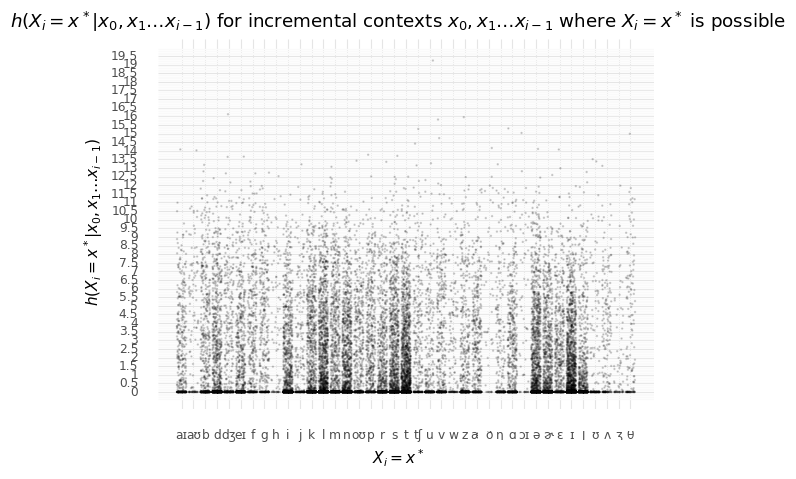

<ggplot: (8731935823694)>

In [123]:
hXistarX0h_by_xstar_plot = plot(hXistarX0h_by_xstar_df, 
     x_col = '$x^*$', 
     y_col = '$h(X_i = x^*|x_0, x_1 \ldots x_{i-1})$', 
     title = '$h(X_i = x^*|x_0, x_1 \ldots x_{i-1})$ for incremental contexts $x_0, x_1 \ldots x_{i-1}$ where $X_i = x^*$ is possible', 
     x_label = '$X_i = x^*$', 
     y_label = '$h(X_i = x^*|x_0, x_1 \ldots x_{i-1})$', 
     y_min = 0.0,
     y_max = 19.5,
     size=smallSize, 
#      size=medSize,
#      size=largeSize,
     alpha=lowAlpha,
#      alpha=medAlpha,
#      alpha=highAlpha,
     width=largeWidth)
hXistarX0h_by_xstar_plot

#### $h(X_i = x^* | x_0, x_1, \ldots, x_{i-1} \_\_; x_{i+1})$ for all licit global incremental contexts of $x^*$

#### $i(X_i = x^* ; x_0, x_1 \ldots x_{i-1})$ for all licit global incremental contexts of $x^*$

#### $i(X_i = x^* ; x_0, x_1, \ldots, x_{i-1} \_\_, x_{i+1})$ for all licit global incremental contexts of $x^*$

#### $\sum\limits_{x_0, x_1 \ldots x_{i-1}} p(x_0, x_1 \ldots x_{i-1}|X_i = x^*) h(X_i = x^*|x_0, x_1 \ldots x_{i-1})$ for all licit global incremental contexts of $x^*$

$p(x_0, x_1 \ldots x_{i-1} | X_i = x^*) = \frac{p(x_0, x_1 \ldots x_{i-1}, X_i = x^*)}{\sum\limits_{x'_0, x'_1 \ldots x'_{i-1}, X'_i = x^*} p(x'_0, x'_1 \ldots x'_{i-1}, X'_i = x^*)}$

In [124]:
# prefixNorm = lambda x_i_star: sum(pX0i[r] for r in prefixesEndingWith[x_i_star])
prefixNorms = {x_i_star:sum(pX0i[r] for r in prefixesEndingWith[x_i_star])
               for x_i_star in X1s}

# as above, let h = i-1
pX0hXistar = {x_star:{dropLast(x0i):pX0i[x0i] / prefixNorms[x_star]
                      for x0i in prefixesEndingWith[x_star]}
              for x_star in X1s}

areNormalized(pX0hXistar) #one would hope so

True

In [125]:
ICIxstar = {x_star:sum(pX0hXistar[x_star][x0h] * hXistarX0h_for_all_licit_prefixes_by_xstar[x_star][x0h]
                       for x0h in set(map(dropLast,
                                          prefixesEndingWith[x_star])))
            for x_star in X1s}

In [126]:
ICIxstar_df = pd.DataFrame(data = [{'$x^*$':'{0}'.format(xstar),
#                                     '$x_0.\_.x_2$':'${0}.\_.{1}$'.format(ds2t(x02)[0],ds2t(x02)[2]),
#                                     '$x_0.\_.x_2$':'{0}'.format(x02),
                                    '$\overline{h}(X_i = x^*|x_0, x_1 \ldots x_{i-1})$':ICIxstar[xstar]}
                                   for xstar in ICIxstar])
ICIxstar_df.head()

$\overline{h}(X_i = x^*|x_0, x_1 \ldots x_{i-1})$ $x^*$
0                                           3.240882    oʊ
1                                           3.576463     ɑ
2                                           3.866174    aɪ
3                                           3.352551     æ
4                                           3.370572     ʃ

In [127]:
ICIxstar_df.sort_values(['$\overline{h}(X_i = x^*|x_0, x_1 \ldots x_{i-1})$'], ascending=False)

$\overline{h}(X_i = x^*|x_0, x_1 \ldots x_{i-1})$ $x^*$
23                                           6.036484    ɔɪ
25                                           4.895002     g
26                                           4.824377     j
11                                           4.359952    aʊ
37                                           4.042368     f
2                                            3.866174    aɪ
20                                           3.846179     b
18                                           3.760345     h
35                                           3.755569     w
16                                           3.704972    dʒ
7                                            3.577538     ʊ
1                                            3.576463     ɑ
6                                            3.571176     p
36                                           3.433571     ʌ
4                                            3.370572     ʃ
3                                            3.352551     æ
14                                           3.339827    eɪ
28                                           3.335925     ɛ
0                                            3.240882    oʊ
19                                           3.079717    tʃ
15                                           3.007392     ð
22                                           2.954260     θ
29                                           2.890569     k
38                                           2.860047     m
30                                           2.380976     s
34                                           2.365358     ɪ
24                                           2.315547     l
17                                           2.211393     r
31                                           2.208501     i
10                                           2.017687     ə
27                                           1.825602     ɚ
13                                           1.783625     ʒ
8                                            1.761955     t
21                                           1.656118     d
33                                           1.552606     z
5                                            1.461833     v
32                                           1.387211     n
12                                           1.250634     u
9                                            0.880250     ŋ

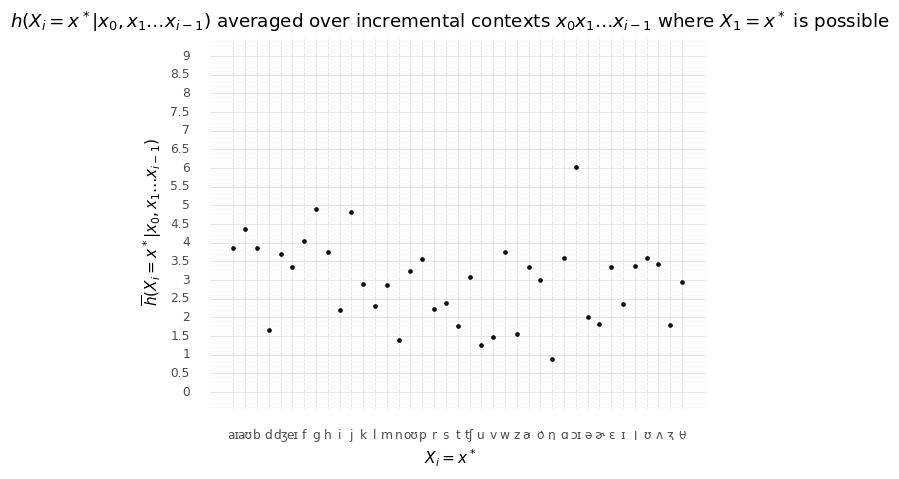

<ggplot: (8731923117544)>

In [128]:
ICIxstar_plot = plot(ICIxstar_df, 
     x_col = '$x^*$', 
     y_col = '$\overline{h}(X_i = x^*|x_0, x_1 \ldots x_{i-1})$', 
     title = '$h(X_i = x^*|x_0, x_1 \ldots x_{i-1})$ averaged over incremental contexts $x_0 x_1 \ldots x_{i-1}$ where $X_1 = x^*$ is possible', 
     x_label = '$X_i = x^*$', 
     y_label = '$\overline{h}(X_i = x^*|x_0, x_1 \ldots x_{i-1})$', 
     y_min = 0.0,
     y_max = 9.0,
#      size=smallSize, 
#      size=medSize,
     size=largeSize,
#      alpha=lowAlpha,
#      alpha=medAlpha,
     alpha=highAlpha,
     width=0.0)
ICIxstar_plot

### Total context

#### $h(X_i = x^* | x_0, x_1 \ldots x_{i-1}, \_\_, x_{i+1} \ldots x_{f-1}, x_f)$ for all licit global total contexts of $x^*$

#### $i(X_i = x^* ; x_0, x_1 \ldots x_{i-1}, \_\_, x_{i+1} \ldots x_{f-1}, x_f)$ for all licit global total contexts of $x^*$

#### $\sum\limits_{x_0, x_1 \ldots x_{i-1}, \_\_, x_{i+1} \ldots x_{f-1}, x_f} p(x_0, x_1 \ldots x_{i-1}, \_\_, x_{i+1} \ldots x_{f-1}, x_f) h(X_i = x^*|x_0, x_1 \ldots x_{i-1}, \_\_, x_{i+1} \ldots x_{f-1}, x_f)$ for all licit global total contexts of $x^*$

## Distortion-like measures

### Setup

$\hat{p}(\widehat{X}_0^f|X_0^i;X_{i+1}) = \hat{p}(\widehat{X}_0^f|X_0^k)$:

In [129]:
%ls *phatXhat0fX0k*

'Hammond-aligned_destressed_pseudocount0.001 phatXhat0fX0k_K2only_10855114.npy'
'Hammond-aligned_destressed_pseudocount0.001 phatXhat0fX0k_K2only_1242546.npy'
'Hammond-aligned_destressed_pseudocount0.001 phatXhat0fX0k_K2only_13548436.npy'
'Hammond-aligned_destressed_pseudocount0.001 phatXhat0fX0k_K2only_14631215.npy'
'Hammond-aligned_destressed_pseudocount0.001 phatXhat0fX0k_K2only_14722855.npy'
'Hammond-aligned_destressed_pseudocount0.001 phatXhat0fX0k_K2only_230951.npy'
'Hammond-aligned_destressed_pseudocount0.001 phatXhat0fX0k_K2only_2565635.npy'
'Hammond-aligned_destressed_pseudocount0.001 phatXhat0fX0k_K2only_3856361.npy'
'Hammond-aligned_destressed_pseudocount0.001 phatXhat0fX0k_K2only_5081610.npy'
'Hammond-aligned_destressed_pseudocount0.001 phatXhat0fX0k_K2only_638730.npy'
'Hammond-aligned_destressed_pseudocount0.001 phatXhat0fX0k_K2only_6856011.npy'
'Hammond-aligned_destressed_pseudocount0.001 phatXhat0fX0k_K2only_80274.npy'
'Hammond-aligned_destressed_pseudocount0.001 phatXha

In [130]:
incPosterior_fn_suff = 'phatXhat0fX0k'
incPosterior_fn_suff_K2only = incPosterior_fn_suff + '_K2only'
incPosterior_ext = '.npy'

my_fn_suff = incPosterior_fn_suff_K2only
# my_N = None
# my_N = 80274
# my_N = 230951
# my_N = 638730
# my_N = 1242546
# my_N = 2565635
# my_N = 5081610
# my_N = 6856011
# my_N = 13548436
# my_N = 14631215
my_N = 14722855
my_fn_suff = my_fn_suff + '_{0}'.format(my_N) if my_N is not None else my_fn_suff

incPosterior_fn = which + ' ' + my_fn_suff
incPosterior_fn

'Hammond-aligned_destressed_pseudocount0.001 phatXhat0fX0k_K2only_14722855'

In [131]:
phatXhat0fX0k_np = np.load(incPosterior_fn + incPosterior_ext, allow_pickle = False)
phatXhat0fX0k_np.shape

(12565, 46186)

In [132]:
np.nansum(np.sum(phatXhat0fX0k_np, axis = 0)) # = number of columns with SOMETHING in them

46149.0

In [133]:
def phatXhat0fX0k(xhat0f, x0k):
    return phatXhat0fX0k_np[Wmap[xhat0f], prefixMap[x0k]]

In [134]:
# randPrefix = getRandomKey(pX0i)
randWord = getRandomKey(pW)
a_prefix = choice(list(getPrefixes(randWord)))
(randWord, a_prefix) # (randWord, randPrefix)

phatXhat0fX0k(randWord, a_prefix)

('⋊.t.ɑ.r.g.ɪ.t.⋉', '⋊.t.ɑ.r.g.ɪ.t')

0.95431465

In [135]:
x = np.array([[0,1,2], [3,4,5]]); x
x.transpose(1,0)

array([[0, 1, 2],
       [3, 4, 5]])

array([[0, 3],
       [1, 4],
       [2, 5]])

$p(\hat{X}_j = x_i|x_0^k)$:

For various reasons we want to construct a matrix representing which segment occurs in which wordform. To that end...

Let 
 - $\bar{l}$ represent the maximum length of any prefix.
 - $f$ = `x0kOHmap`
 - $f': C \rightarrow (s,\bar{l})$ denote the version of $f$ that maps the index $c$ of a prefix $x_0^k$ to an $(s,\bar{l})$ matrix representing the sequence of $l$ of length-$s$ one-hot vectors representing the sequence of symbols in $x_0^k$, plus $\bar{l} - l$ extra columns of all-0 vectors.
 - $O' :: (n,s,\bar{l})$ represent the stack of $n$ matrices from each of the $n$ words in the lexicon.
 - $O :: (s,\bar{l}, n)$ represent the transposition (`O_prime.transpose(1,2,0)`)
 - NB: $O_{i,j,c} = 1$ iff the $j$th symbol $X_j$ of the $c$th prefix $x_0^k$ is $x_i$.

In [117]:
l_bar = max(wordlengthsInclEdges)

# O_prime = np.zeros((len(Ws), len(Xs_lex), max(wordlengthsInclEdges)))
# O_prime.shape

# Ws_l = sorted(list(Ws))

# for i in range(O_prime.shape[0]):
#     O_prime[i] = paddedX0kOHmap(Ws_l[i], l_bar)
# O_prime.shape

In [118]:
x0kOHmap('b.i.p').shape

def paddedX0kOHmap(x0k, max_l):
    l = len(ds2t(x0k))
    return np.hstack([x0kOHmap(x0k)] + [np.zeros((len(Xs_lex),1)) for each in range(max_l - l)])

paddedX0kOHmap('b.i.p', l_bar).shape

(41, 3)

(41, 18)

In [119]:
O_prime = np.stack([paddedX0kOHmap(x0f, l_bar) for x0f in sorted(list(Ws))])
O_prime.shape
O = O_prime.transpose(1,2,0)
O.shape
' '
np.allclose(O[:,:,0], paddedX0kOHmap('⋊.aɪ.b.ə.s.⋉', l_bar))
np.allclose( O_prime[0], paddedX0kOHmap('⋊.aɪ.b.ə.s.⋉', l_bar) )

(12565, 41, 18)

(41, 18, 12565)

' '

True

True

For various reasons, we also want to construct, for each prefix, the sequence of marginal (posterior) distributions over each segment (given that the prefix has been produced). To that end...

Let 
 - $\widehat{W} :: (n,m)$ be the matrix representing $\hat{p}(\widehat{X}_0^f|X_0^k)$.
 - $x_i$ denote the $i$th segment type among the relevant set of segment types $X$.
 - $\hat{X}_j$ denote the $j$th segment in some wordform $w$.
 - $c$ be the index of some prefix $x_0^k$.
 - $T :: (m,s,\bar{l})$, where
    - $T_{c,i,j} = p(\hat{X}_j = x_i|x_0^k) = \sum\limits_{\hat{x}_0^f:\hat{x}_j = x_i} p(\hat{x}_0^f|x_0^k) = O_{i,j,:} \cdot \hat{W}_{:,c} = \sum\limits_{w} O_{i,j,w} \hat{W}_{w,c}$.
    - I.e. $T_{c,:,:}$ is a matrix representing the sequence of marginal distributions (=columns) over $\hat{X}_j$ given that prefix $c$ has been produced.

In [139]:
# 12m [kotoba/python3]
T = np.einsum('ijw,wc->cij', O, phatXhat0fX0k_np)
T.shape

(46186, 41, 18)

In [140]:
#normalize each distribution (err,'row' = axis 1)
T_row_sums = T.sum(axis=1, keepdims=True)
T_normalized = T / T_row_sums
np.allclose(T, T_normalized)

/home/AD/emeinhar/anaconda3/envs/omnibus/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


False

In [141]:
# from numba import jit, njit
# @jit(parallel=True)
# def makeT(M, S, L_bar):
#     T = np.zeros((M, S, L_bar))
# #     T.shape
#     if N == 0:
#         return T

#     for c in np.arange(T.shape[0]):
#         for i in np.arange(T.shape[1]):
#             for j in np.arange(T.shape[2]):
#                 T[c,i,j] = np.dot(O[i,j], phatXhat0fX0k_np[:,c])
#     return T
# makeT(0,10,20)
# makeT(0,10,20)
# makeT(0,10,20)

# # takes >>20m [kotoba/python3]
# T = makeT(len(prefixes), len(Xs_lex), l_bar)
# T.shape

In [142]:
T_fn = which + ' pXhatjX0k_K2only' + '.npy'
np.save(T_fn, T_normalized, allow_pickle=False)

In [120]:
T_fn = which + ' pXhatjX0k_K2only' + '.npy'
T_normalized = np.load(T_fn, allow_pickle=False)

In [121]:
# T.shape

NameError: name 'T' is not defined

In [122]:
T_normalized.shape

(46186, 41, 18)

In [123]:
T_normalized.nbytes / 1e6

272.682144

In [124]:
def pXhatj_xStar_x0k(j, x_star, x0k):
    return T_normalized[prefixMap[x0k],Xs_lexMap[x_star],j]

In [125]:
len(Xs_lex)

41

In [126]:
#8.81s [kotoba/python3]
pXhatj_xStar_x0k_dict = {x0k:{j:{x_prime:pXhatj_xStar_x0k(j, x_prime, x0k)
                                 for x_prime in Xs_lex}
                              for j in range(l_bar)}
                         for x0k in prefixes}

$p(\widehat{X_i} = x'|x_0^k)$:

In [150]:
def pXhatiX0k_calc(x_prime, x0k):
    x0k_t = ds2t(x0k)
    l = len(x0k_t)
    
    # This function call should never happen...
    # but if it does, this is intended(?) to satisfy 
    # subsequent normalization checking
    if len(x0k) == 1 and x0k == '⋊':
        if x_prime == '⋊':
            return 1.0
        else:
            return 0.0
    
    x_i = x0k_t[-2]
    x_star = x_i
    i = l - 2
    
#     x0k_idx = prefixMap[x0k]
#     my_wordforms = wordsWhereXiIs(x_prime, i)
#     return np.sum([phatXhat0fX0k_np[Wmap[w], x0k_idx] for w in my_wordforms])
    return pXhatj_xStar_x0k_dict[x0k][i][x_prime]

pXhatiX0k = {x0k:{x_prime:pXhatiX0k_calc(x_prime, x0k)
                  for x_prime in Xs_lex}
             for x0k in prefixes}

In [284]:
randPrefix = getRandomKey(pX0i)
randPrefix

'⋊.h.æ.n.d.ʃ.eɪ'

In [285]:
pXhatiX0k_calc('s', randPrefix)

0.0

In [287]:
wordsWithPrefix(randPrefix)

{'⋊.h.æ.n.d.ʃ.eɪ.k.⋉'}

In [286]:
pXhatiX0k[randPrefix]

{'ɑ': 0.0,
 'oʊ': 0.0,
 'aɪ': 0.0,
 '⋊': 0.0,
 'æ': 0.0,
 'ʃ': 0.95411193036214592,
 'v': 0.0,
 'p': 0.0,
 'ʊ': 0.0,
 't': 0.0,
 '⋉': 0.0,
 'ŋ': 0.0,
 'ə': 0.0,
 'aʊ': 0.0087382081460559771,
 'u': 0.0,
 'ʒ': 0.0,
 'eɪ': 0.0,
 'ð': 0.0,
 'dʒ': 0.0,
 'r': 0.000553132707737586,
 'h': 0.0,
 'tʃ': 0.0,
 'b': 0.0049361766432613917,
 'd': 0.0,
 'θ': 0.0,
 'ɔɪ': 0.0,
 'l': 0.0,
 'g': 0.0,
 'j': 0.0,
 'ɚ': 0.0,
 'ɛ': 0.0,
 'k': 0.0,
 's': 0.0,
 'i': 0.0,
 'n': 0.0,
 'z': 0.0,
 'ɪ': 0.011535018431312268,
 'w': 0.0,
 'ʌ': 0.0,
 'f': 0.0,
 'm': 0.020125533709486811}

In [151]:
areNormalized(pXhatiX0k)
[each for each in pXhatiX0k if not isclose(norm(pXhatiX0k[each]), 1.0)] # this is fine...

False

['⋊.eɪ',
 '⋊.b',
 '⋊.n',
 '⋊.p',
 '⋊.ɑ',
 '⋊.w',
 '⋊.æ',
 '⋊.i',
 '⋊.t',
 '⋊.dʒ',
 '⋊.s',
 '⋊.l',
 '⋊.j',
 '⋊.aɪ',
 '⋊.k',
 '⋊.θ',
 '⋊.ɛ',
 '⋊.v',
 '⋊.h',
 '⋊.r',
 '⋊.m',
 '⋊.f',
 '⋊.ɚ',
 '⋊.aʊ',
 '⋊.ɪ',
 '⋊.oʊ',
 '⋊.z',
 '⋊.ʌ',
 '⋊.ʃ',
 '⋊.tʃ',
 '⋊.u',
 '⋊.d',
 '⋊.ɔɪ',
 '⋊.ə',
 '⋊.ð',
 '⋊.g']

$p(\widehat{X_i}|x_0^f)$:

In [152]:
def pXhatiX0f_calc(i, x_prime, x0f):
    x0f_t = ds2t(x0f)
    l = len(x0f_t)
    
    if len(x0f) == 1 and x0f == '⋊':
        if x_prime == '⋊':
            return 1.0
        else:
            return 0.0
    if i >= l:
        return 0.0

    x_i = x0f_t[i]
    x_star = x_i
#     i = l - 2
    
#     x0k_idx = prefixMap[x0k]
#     my_wordforms = wordsWhereXiIs(x_prime, i)
#     return np.sum([phatXhat0fX0k_np[Wmap[w], x0k_idx] for w in my_wordforms])
    return pXhatj_xStar_x0k_dict[x0f][i][x_prime]

pXhatiX0f = {x0f:{i:{x_prime:pXhatiX0f_calc(i, x_prime, x0f)
                     for x_prime in Xs_lex}
                  for i in range(l_bar)}
             for x0f in Ws}

In [153]:
for x0f in pXhatiX0f:
    for i in pXhatiX0f[x0f]:
        if not isNormalized(pXhatiX0f[x0f][i]):
            if not ds2t(x0f)[-1] == rightEdge:
                print((x0f, i, norm(pXhatiX0f[x0f][i])))

In [288]:
randW

'⋊.r.æ.ð.ɚ.⋉'

In [291]:
pXhatiX0f[randW][3]

{'ɑ': 0.0,
 'oʊ': 0.0,
 'aɪ': 0.0,
 '⋊': 0.0,
 'æ': 0.0,
 'ʃ': 0.0,
 'v': 0.018845360179105979,
 'p': 2.5378806695326325e-06,
 'ʊ': 0.0,
 't': 0.0016972947902556084,
 '⋉': 0.0,
 'ŋ': 2.578984751608678e-05,
 'ə': 0.0,
 'aʊ': 0.0,
 'u': 0.0,
 'ʒ': 0.0,
 'eɪ': 0.0,
 'ð': 0.94212899856874377,
 'dʒ': 0.005512891861815126,
 'r': 0.0,
 'h': 0.0,
 'tʃ': 0.0,
 'b': 0.011053592788588217,
 'd': 5.4210058080355146e-05,
 'θ': 0.0,
 'ɔɪ': 0.0,
 'l': 0.00049409540157183487,
 'g': 5.4692929927226058e-06,
 'j': 0.0,
 'ɚ': 0.0,
 'ɛ': 0.0,
 'k': 0.011164219437775381,
 's': 2.5655346966393644e-07,
 'i': 0.0,
 'n': 0.00036794006483270369,
 'z': 2.7889118183667233e-06,
 'ɪ': 0.0,
 'w': 0.0,
 'ʌ': 0.0,
 'f': 0.0086396151975648983,
 'm': 4.9391651997212305e-06}

### $h(\hat{X}_i = x^* | x_0 \ldots x_{i-1}; X_i = x^*)$

### $H(\hat{X}_i | x_0 \ldots x_{i-1}; X_i = x^*)$

### $H(\hat{X}_i | X_0 \ldots X_{i-1}; X_i = x^*)$

### $I(\hat{X}_i ; X_0 \ldots X_{i-1} | X_i = x^*)$

### $h(\hat{X}_i = x^* | x_0 \ldots x_{i-1}, X_i = x^*; x_{i+1})$

 - For each $x^*$, collect the set of prefixes $R_{x^*} = \{x_0^{i}; x_{i+1} | x_i = x^*\}$.
 - For each such prefix $r_j = x_0^{i+1}$, what is $p(\hat{X}_i = x^* | x_0^{i+1} = r_j)$?

$\{\hat{p}(\widehat{X}_i = x^* | x_0^i;x_{i+1}) | x_i = x^* \}$

In [154]:
pXhatiStarX0k = {x_star:{x0k:pXhatiX0k[x0k][x_star]
                         for x0k in prefixesWhoseSecondToLastSegIs[x_star]}
                 for x_star in Xs}
#                  for x_star in Xs_lex}

In [155]:
hXhatiStarX0k = {x_star:{x0k:h_prime( pXhatiStarX0k[x_star][x0k] )
                         for x0k in prefixesWhoseSecondToLastSegIs[x_star]}
                 for x_star in Xs}

In [156]:
def removeXi(x0k):
    x0k_t = ds2t(x0k)
    l = len(x0k_t)
    
    before_t = x0k_t[:-2]
    before_ds = t2ds(before_t)
    x_i = x0k_t[-2]
#     i = l - 2
    x_k = x0k_t[-1]
    return before_ds + '._.' + x_k

removeXi('b.i.p.b.u.p')

'b.i.p.b._.p'

In [157]:
def leftContext(x0k):
    x0k_t = ds2t(x0k)
    l = len(x0k_t)
    
    before_t = x0k_t[:-3]
    before_ds = t2ds(before_t)
#     x_i = x0k_t[-2]
#     i = l - 2
#     x_k = x0k_t[-1]
    return before_ds# + '._.' + x_k

leftContext('b.i.p.b.u.p')
leftContext('b.i.p')

'b.i.p'

''

In [158]:
hXhatiStarX0k_df = pd.DataFrame(data = [{'$x^*$':'{0}'.format(x_star),
                                         'incremental context':removeXi(x0k),
                                         '$h(\hat{X}_i = x^*|x_0, x_1, \ldots X_i = x^*, x_{i+1})$':hXhatiStarX0k[x_star][x0k]}
                                        for x_star in Xs for x0k in hXhatiStarX0k[x_star]])
hXhatiStarX0k_df.head()

$h(\hat{X}_i = x^*|x_0, x_1, \ldots X_i = x^*, x_{i+1})$ $x^*$  \
0                                           1.292263            ɑ   
1                                           0.009569            ɑ   
2                                          -0.000000            ɑ   
3                                           1.001720            ɑ   
4                                           0.873390            ɑ   

  incremental context  
0           ⋊.k.r._.n  
1         ⋊.θ.ɚ.m._.m  
2     ⋊.k.ɑ.m.ɪ.k._.z  
3             ⋊.h._.θ  
4            ⋊.w._.tʃ

In [159]:
hXhatiStarX0k_df.sort_values(['$h(\hat{X}_i = x^*|x_0, x_1, \ldots X_i = x^*, x_{i+1})$'], ascending=False)

$h(\hat{X}_i = x^*|x_0, x_1, \ldots X_i = x^*, x_{i+1})$ $x^*$  \
21004                                           7.199865            θ   
799                                             7.176518            ɑ   
43820                                           6.127886            ʌ   
387                                             5.878139            ɑ   
15736                                           5.845817            ð   
20750                                           5.394164            d   
14574                                           5.185967           eɪ   
4974                                            5.053767            v   
19559                                           5.045267            d   
12084                                           5.007950            ə   
6218                                            4.966205            ʊ   
15737                                           4.954658            ð   
11526                                           4.808801            ə   
20937                                           4.712397            θ   
20581                                           4.701505            d   
15693                                           4.662920            ð   
5021                                            4.630590            v   
4838                                            4.620822            v   
44154                                           4.549608            f   
6271                                            4.524807            ʊ   
14226                                           4.449644            u   
4702                                            4.430277            v   
43701                                           4.429092            ʌ   
20017                                           4.421965            d   
12075                                           4.418172            ə   
2642                                            4.392841           aɪ   
27637                                           4.334491            ɛ   
12662                                           4.302061            ə   
4523                                            4.301579            v   
4914                                            4.300249            v   
...                                                  ...          ...   
32185                                          -0.000000            s   
32184                                          -0.000000            s   
32183                                          -0.000000            s   
32181                                          -0.000000            s   
32180                                          -0.000000            s   
17525                                          -0.000000            r   
9403                                           -0.000000            t   
32177                                          -0.000000            s   
32175                                          -0.000000            s   
9402                                           -0.000000            t   
32171                                          -0.000000            s   
32194                                          -0.000000            s   
32195                                          -0.000000            s   
17521                                          -0.000000            r   
32212                                          -0.000000            s   
32221                                          -0.000000            s   
32220                                          -0.000000            s   
32219                                          -0.000000            s   
4513                                           -0.000000            v   
17508                                          -0.000000            r   
17515                                          -0.000000            r   
32210                                          -0.000000            s   
17519                                          -0.000000         

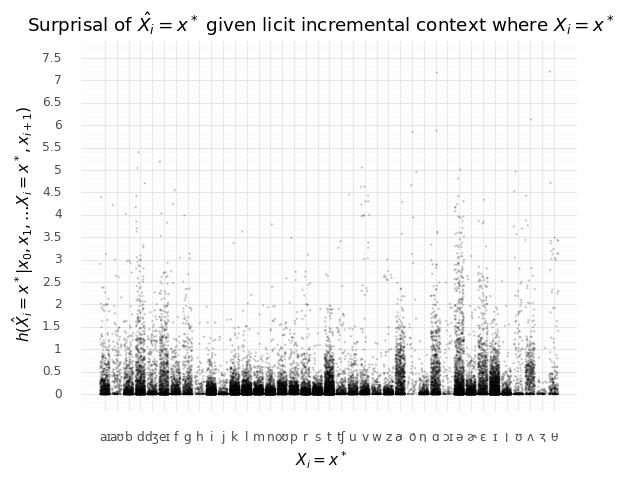

<ggplot: (8731923124379)>

In [160]:
hXhatiStarX0k_plot = plot(hXhatiStarX0k_df, 
     x_col = '$x^*$', 
     y_col = '$h(\hat{X}_i = x^*|x_0, x_1, \ldots X_i = x^*, x_{i+1})$', 
     title = 'Surprisal of $\hat{X_i} = x^*$ given licit incremental context where $X_i = x^*$', 
     x_label = '$X_i = x^*$', 
     y_label = '$h(\hat{X}_i = x^*|x_0, x_1, \ldots X_i = x^*, x_{i+1})$', 
     y_min = 0.0,
     y_max = 7.5,
     size=smallSize, 
     alpha=lowAlpha,
#      alpha=medAlpha,
     width=largeWidth)
hXhatiStarX0k_plot

### $H(\hat{X}_i | x_0 \ldots x_{i-1}, X_i = x^*; x_{i+1})$

In [161]:
# 3.2s [kotoba/python3]
incrementalEntropies_by_x0k = {x0k:H(ProbDist(pXhatiX0k[x0k]))
                               for x0k in prefixes}

In [162]:
incrementalEntropies_by_xstar_by_x0k = {x_star:{x0k:incrementalEntropies_by_x0k[x0k]
                                                for x0k in prefixesWhoseSecondToLastSegIs[x_star]}
                                        for x_star in Xs_lex}

In [163]:
HXhatiXstar_df = pd.DataFrame(data = [{'$x^*$':'{0}'.format(x_star),
                                       'incremental context':removeXi(x0k),
                                       '$H(\hat{X}_i|x_0, x_1, \ldots X_i = x^*, x_{i+1})$':incrementalEntropies_by_xstar_by_x0k[x_star][x0k]}
                                        for x_star in Xs for x0k in incrementalEntropies_by_xstar_by_x0k[x_star]])
HXhatiXstar_df.head()

$H(\hat{X}_i|x_0, x_1, \ldots X_i = x^*, x_{i+1})$ $x^*$  \
0                                           1.924196      ɑ   
1                                           0.063727      ɑ   
2                                           0.000000      ɑ   
3                                           1.491211      ɑ   
4                                           2.106041      ɑ   

  incremental context  
0           ⋊.k.r._.n  
1         ⋊.θ.ɚ.m._.m  
2     ⋊.k.ɑ.m.ɪ.k._.z  
3             ⋊.h._.θ  
4            ⋊.w._.tʃ

In [164]:
HXhatiXstar_df.sort_values(['$H(\hat{X}_i|x_0, x_1, \ldots X_i = x^*, x_{i+1})$'], ascending=False)

$H(\hat{X}_i|x_0, x_1, \ldots X_i = x^*, x_{i+1})$ $x^*$  \
38596                                           4.062979      z   
21166                                           4.048902     ɔɪ   
2035                                            4.034021     aɪ   
39075                                           3.995443      z   
38726                                           3.991885      z   
21140                                           3.985299     ɔɪ   
38829                                           3.974474      z   
2396                                            3.937203     aɪ   
2432                                            3.888763     aɪ   
39041                                           3.864417      z   
25693                                           3.846594      ɚ   
38661                                           3.827307      z   
3114                                            3.804599      æ   
38707                                           3.801025      z   
38921                                           3.800149      z   
13332                                           3.777160      ə   
24432                                           3.767458      g   
2492                                            3.747100     aɪ   
2490                                            3.739570     aɪ   
14702                                           3.699307     eɪ   
2639                                            3.697092     aɪ   
2393                                            3.665657     aɪ   
11363                                           3.661950      ə   
12973                                           3.642997      ə   
11812                                           3.626292      ə   
2453                                            3.600217     aɪ   
3541                                            3.592932      æ   
12234                                           3.558986      ə   
21198                                           3.555545     ɔɪ   
12070                                           3.549599      ə   
...                                                  ...    ...   
32431                                           0.000000      s   
16869                                           0.000000      r   
3891                                            0.000000      ʃ   
16872                                           0.000000      r   
32439                                           0.000000      s   
32425                                           0.000000      s   
16876                                           0.000000      r   
3892                                            0.000000      ʃ   
32420                                           0.000000      s   
16878                                           0.000000      r   
32418                                           0.000000      s   
32438                                           0.000000      s   
32441                                           0.000000      s   
32462                                           0.000000      s   
32453                                           0.000000      s   
32460                                           0.000000      s   
3886                                            0.000000      ʃ   
32458                                           0.000000      s   
32457                                           0.000000      s   
32456                                           0.000000      s   
32454                                           0.000000      s   
3888                                            0.000000      ʃ   
32442                                           0.000000      s   
16855                                           0.000000      r   
32450                                           0.000000      s   
32449                                           0.000000      s   
32447                                           0.000000      s   
32444                                           0.0000

/home/AD/emeinhar/anaconda3/envs/omnibus/lib/python3.6/site-packages/plotnine/layer.py:449: UserWarning: geom_jitter : Removed 3 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


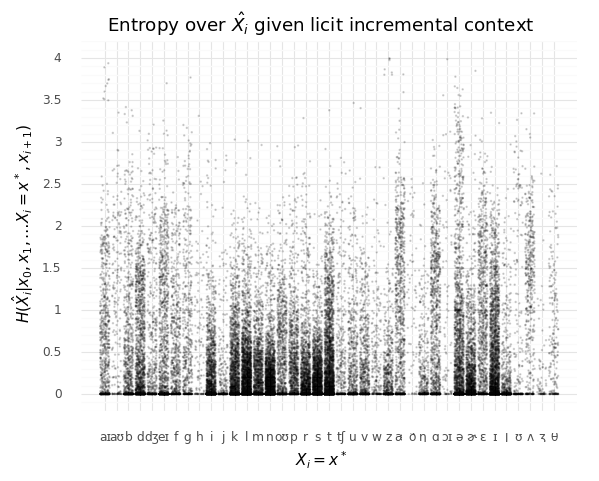

<ggplot: (-9223363305173413751)>

In [165]:
HXhatiXstar_plot = plot(HXhatiXstar_df, 
     x_col = '$x^*$', 
     y_col = '$H(\hat{X}_i|x_0, x_1, \ldots X_i = x^*, x_{i+1})$', 
     title = 'Entropy over $\hat{X_i}$ given licit incremental context', 
     x_label = '$X_i = x^*$', 
     y_label = '$H(\hat{X}_i|x_0, x_1, \ldots X_i = x^*, x_{i+1})$', 
     y_min = 0.0,
     y_max = 4.0,
     size=smallSize, 
     alpha=lowAlpha,
     width=largeWidth)
HXhatiXstar_plot

### $H(\hat{X}_i | X_0 \ldots X_{i-1}, X_i = x^*; X_{i+1})$

$H(\hat{X}_i | X_0 \ldots X_{i-1}, X_i = x^*; X_{i+1}) = \sum\limits_{x_0 \ldots x_{i-1}, X_i = x^*, x_{i+1}} p(x_0 \ldots x_{i-1}, x_{i+1}|X_i = x^*) H(\hat{X}_i | x_0 \ldots x_{i-1}, X_i = x^*; x_{i+1})$

where $p(x_0 \ldots x_{i-1}, x_{i+1}|X_i = x^*) = \frac{p(x_0 \ldots x_{i-1}, X_i = x^*, x_{i+1})}{\sum\limits_{x'_0 \ldots x'_{i-1}, X'_i = x^*, x'_{i+1}} p(x'_0 \ldots x'_{i-1}, X'_i = x^*, x'_{i+1})}$, similar to a calculation further above (`pX0hXistar`).

In [166]:
# pX0kXistar = {x_star:{removeXi(x0k):pX0i[x0k] / sum(pX0i[x0k_prime] for x0k_prime in prefixesWhoseSecondToLastSegIs[x_star])
#                       for x0k in prefixesWhoseSecondToLastSegIs[x_star]}
#               for x_star in Xs_lex}

# terribly inefficient naive calculation, yes
# 11.2s [kotoba/python3]
pX0kXistar = {x_star:{x0k:pX0i[x0k] / sum(pX0i[x0k_prime] for x0k_prime in prefixesWhoseSecondToLastSegIs[x_star])
                      for x0k in prefixesWhoseSecondToLastSegIs[x_star]}
              for x_star in Xs}
assert areNormalized(pX0kXistar)
pX0kXistar = condDistsAsProbDists(pX0kXistar)

In [167]:
avgIncrementalEntropies_by_xstar = {x_star:sum(pX0kXistar[x_star][x0k] * incrementalEntropies_by_x0k[x0k]
                                               for x0k in prefixesWhoseSecondToLastSegIs[x_star])
                                    for x_star in Xs}

In [168]:
avgHXhatiXstar_df = pd.DataFrame(data = [{'$x^*$':'{0}'.format(x_star),
                                       '$H(\hat{X}_i|X_0, X_1, \ldots X_i = x^*, X_{i+1})$':avgIncrementalEntropies_by_xstar[x_star]}
                                        for x_star in Xs])
avgHXhatiXstar_df.head()

$H(\hat{X}_i|X_0, X_1, \ldots X_i = x^*, X_{i+1})$ $x^*$
0                                           1.380437      ɑ
1                                           0.683190     oʊ
2                                           0.670477     aɪ
3                                           1.323268      æ
4                                           0.577550      ʃ

In [169]:
avgHXhatiXstar_df.sort_values(['$H(\hat{X}_i|X_0, X_1, \ldots X_i = x^*, X_{i+1})$'], ascending=False)

$H(\hat{X}_i|X_0, X_1, \ldots X_i = x^*, X_{i+1})$ $x^*$
25                                           1.706640      g
20                                           1.663928      b
36                                           1.402764      ʌ
0                                            1.380437      ɑ
7                                            1.362187      ʊ
15                                           1.324304      ð
3                                            1.323268      æ
6                                            1.315036      p
37                                           1.310656      f
10                                           1.240714      ə
23                                           1.190627     ɔɪ
35                                           1.179181      w
11                                           1.166889     aʊ
16                                           1.134286     dʒ
18                                           1.122729      h
28                                           1.090114      ɛ
13                                           1.033795     eɪ
26                                           0.920105      j
22                                           0.903669      θ
29                                           0.795264      k
8                                            0.779862      t
34                                           0.754787      ɪ
19                                           0.748591     tʃ
38                                           0.683599      m
1                                            0.683190     oʊ
21                                           0.682196      d
2                                            0.670477     aɪ
4                                            0.577550      ʃ
30                                           0.565975      s
5                                            0.544453      v
17                                           0.523808      r
24                                           0.503186      l
31                                           0.420212      i
27                                           0.359728      ɚ
33                                           0.299129      z
12                                           0.297210      u
32                                           0.296659      n
14                                           0.238495      ʒ
9                                            0.209969      ŋ

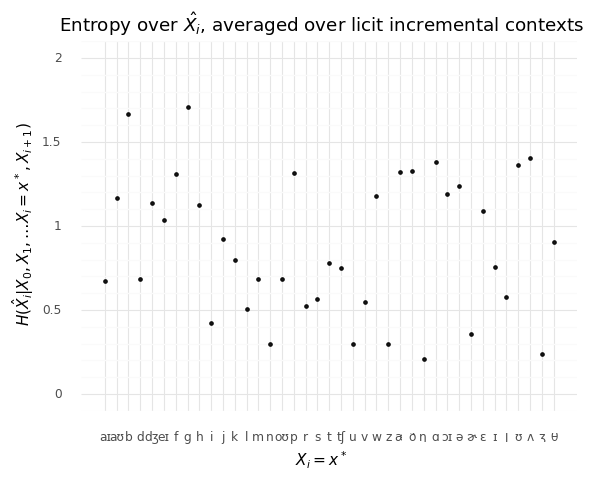

<ggplot: (-9223363305173649208)>

In [170]:
avgHXhatiXstar_plot = plot(avgHXhatiXstar_df, 
     x_col = '$x^*$', 
     y_col = '$H(\hat{X}_i|X_0, X_1, \ldots X_i = x^*, X_{i+1})$', 
     title = 'Entropy over $\hat{X_i}$, averaged over licit incremental contexts', 
     x_label = '$X_i = x^*$', 
     y_label = '$H(\hat{X}_i|X_0, X_1, \ldots X_i = x^*, X_{i+1})$', 
     y_min = 0.0,
     y_max = 2.0,
     size=largeSize, 
     alpha=highAlpha,
     width=0.0)
avgHXhatiXstar_plot

### $h(\widehat{X_i} = x^*|X_i = x^*)$ (marginalizing over all choices of $i$)

$p(\widehat{X}_i = x' |X_i = x^*) = \sum\limits_{x_0^{i}; x_{i+1} : X_i = x^*} p(x_0 \ldots x_{i-1}, x_{i+1}|X_i = x^*) p(\widehat{X}_i = x'|x_0, x_1, \ldots X_i = x^*; x_{i+1})$

where $p(x_0 \ldots x_{i-1}, x_{i+1}|X_i = x^*) = \frac{p(x_0 \ldots x_{i-1}, X_i = x^*, x_{i+1})}{\sum\limits_{x'_0 \ldots x'_{i-1}, X'_i = x^*, x'_{i+1}} p(x'_0 \ldots x'_{i-1}, X'_i = x^*, x'_{i+1})}$, as calculated above (`pX0kXistar`) and similar to a calculation further above (`pX0hXistar`).

In [171]:
def pXhatiXi_calc(x_prime, x_star):
    x_star_idx = Xs_lexMap[x_star]
    x_prime_idx = Xs_lexMap[x_prime]
    
    my_prefixes = prefixesWhoseSecondToLastSegIs[x_star]
    return np.sum([pX0kXistar[x_star][x0k] * pXhatiX0k[x0k][x_prime]
                   for x0k in my_prefixes])

In [172]:
pXhatiXi = {x_star:{x_prime:pXhatiXi_calc(x_prime, x_star)
                    for x_prime in Xs}
            for x_star in Xs}
assert areNormalized(pXhatiXi)
pXhatiXi = condDistsAsProbDists(pXhatiXi)

In [173]:
hXhatiStarXiStar = {x_star:h_prime(pXhatiXi[x_star][x_star])
                    for x_star in Xs}

In [174]:
hXhatiStarXiStar_df = pd.DataFrame(data = [{'$x^*$':'{0}'.format(x_star),
                                            '$h(\hat{X}_i = x^*|X_i = x^*)$':hXhatiStarXiStar[x_star]}
                                           for x_star in Xs])
hXhatiStarXiStar_df.head()

$h(\hat{X}_i = x^*|X_i = x^*)$ $x^*$
0                        0.507510     ɑ
1                        0.147997    oʊ
2                        0.171334    aɪ
3                        0.373226     æ
4                        0.110123     ʃ

In [175]:
hXhatiStarXiStar_df.sort_values(['$h(\hat{X}_i = x^*|X_i = x^*)$'], ascending=False)

$h(\hat{X}_i = x^*|X_i = x^*)$ $x^*$
25                        0.674791     g
7                         0.517815     ʊ
36                        0.511804     ʌ
22                        0.507943     θ
0                         0.507510     ɑ
20                        0.488585     b
13                        0.437910    eɪ
6                         0.410898     p
28                        0.399962     ɛ
16                        0.380598    dʒ
3                         0.373226     æ
10                        0.363623     ə
37                        0.355780     f
23                        0.328191    ɔɪ
11                        0.321084    aʊ
15                        0.282188     ð
21                        0.278226     d
19                        0.270053    tʃ
35                        0.268195     w
18                        0.232805     h
8                         0.219168     t
29                        0.197386     k
26                        0.187043     j
34                        0.183749     ɪ
2                         0.171334    aɪ
5                         0.168326     v
38                        0.156160     m
1                         0.147997    oʊ
17                        0.122612     r
24                        0.110292     l
4                         0.110123     ʃ
30                        0.107248     s
31                        0.090209     i
27                        0.082915     ɚ
32                        0.060648     n
33                        0.055988     z
12                        0.054754     u
14                        0.051550     ʒ
9                         0.043604     ŋ

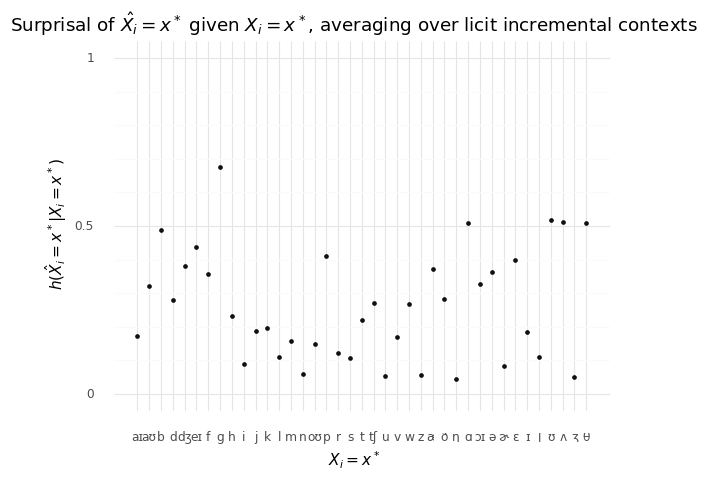

<ggplot: (-9223363305173927108)>

In [176]:
hXhatiStarXiStar_close = plot(hXhatiStarXiStar_df, 
     x_col = '$x^*$', 
     y_col = '$h(\hat{X}_i = x^*|X_i = x^*)$', 
     title = 'Surprisal of $\hat{X_i} = x^*$ given $X_i = x^*$, averaging over licit incremental contexts', 
     x_label = '$X_i = x^*$', 
     y_label = '$h(\hat{X}_i = x^*|X_i = x^*)$', 
     y_min = 0.0,
     y_max = 1.0,
     size=largeSize, 
     alpha=highAlpha,
     width=0.0)
hXhatiStarXiStar_close

### $i(\hat{X}_i = x^* ; x_0 \ldots x_{i-1}, x_{i+1} | X_i = x^*)$ (version 1)

$i(\widehat{X}_i = x^*;x_0, x_1, \ldots x_{i+1} | X_i = x^*) = h(\widehat{X}_i = x^* | X_i = x^*) - h(\widehat{X}_i = x^* | x_0, x_1, \ldots X_i = x^*; x_{i+1})$

Here, the probability distribution underlying $h(\widehat{X}_i = x^* | X_i = x^*)$ is taken to be the marginal distribution over all possible choices of prefix (and therefore choices of $i$).

In [177]:
iXhatiStarX0kXiStar = {x_star:{x0k:hXhatiStarXiStar[x_star] - hXhatiStarX0k[x_star][x0k]
                               for x0k in prefixesWhoseSecondToLastSegIs[x_star]}
                       for x_star in Xs}

In [178]:
iXhatiStarX0kXiStar_df = pd.DataFrame(data = [{'$x^*$':'{0}'.format(x_star),
                                               'incrmental context':removeXi(x0k),
                                               '$i(\hat{X}_i = x^*; x_0, x_1, \ldots \_, x_{i+1} |X_i = x^*)$':iXhatiStarX0kXiStar[x_star][x0k]}
                                        for x_star in Xs for x0k in iXhatiStarX0kXiStar[x_star]])
iXhatiStarX0kXiStar_df.head()

$i(\hat{X}_i = x^*; x_0, x_1, \ldots \_, x_{i+1} |X_i = x^*)$ $x^*$  \
0                                          -0.784753                 ɑ   
1                                           0.497942                 ɑ   
2                                           0.507510                 ɑ   
3                                          -0.494209                 ɑ   
4                                          -0.365879                 ɑ   

  incrmental context  
0          ⋊.k.r._.n  
1        ⋊.θ.ɚ.m._.m  
2    ⋊.k.ɑ.m.ɪ.k._.z  
3            ⋊.h._.θ  
4           ⋊.w._.tʃ

In [179]:
iXhatiStarX0kXiStar_df.sort_values(['$i(\hat{X}_i = x^*; x_0, x_1, \ldots \_, x_{i+1} |X_i = x^*)$'], ascending=False)

$i(\hat{X}_i = x^*; x_0, x_1, \ldots \_, x_{i+1} |X_i = x^*)$ $x^*$  \
24767                                           0.674791                 g   
24457                                           0.674791                 g   
24730                                           0.674791                 g   
24700                                           0.674791                 g   
24477                                           0.674791                 g   
24592                                           0.674791                 g   
24614                                           0.674791                 g   
24456                                           0.674791                 g   
24435                                           0.674791                 g   
24786                                           0.674791                 g   
24855                                           0.674791                 g   
24612                                           0.674791                 g   
24594                                           0.674791                 g   
24648                                           0.674791                 g   
24374                                           0.674791                 g   
24758                                           0.674791                 g   
24375                                           0.674791                 g   
24376                                           0.674791                 g   
24438                                           0.674791                 g   
24534                                           0.674791                 g   
24429                                           0.674791                 g   
24834                                           0.674791                 g   
24621                                           0.674791                 g   
24720                                           0.674791                 g   
24652                                           0.674791                 g   
24620                                           0.674791                 g   
24713                                           0.674791                 g   
24358                                           0.674791                 g   
24579                                           0.674791                 g   
24662                                           0.674791                 g   
...                                                  ...               ...   
27637                                          -3.934529                 ɛ   
12662                                          -3.938437                 ə   
6271                                           -4.006992                 ʊ   
12075                                          -4.054548                 ə   
4483                                           -4.063569                 v   
4914                                           -4.131923                 v   
4523                                           -4.133254                 v   
20017                                          -4.143739                 d   
44154                                          -4.193829                 f   
20937                                          -4.204454                 θ   
2642                                           -4.221507                aɪ   
4702                                           -4.261952                 v   
15693                                          -4.380732                 ð   
14226                                          -4.394890                 u   
20581                                          -4.423279                 d   
11526                                          -4.445177                 ə   
6218                                           -4.448389                 ʊ   
4838                                           -4.452496                 v   
5021                                           -4.462264                 v   
12084                        

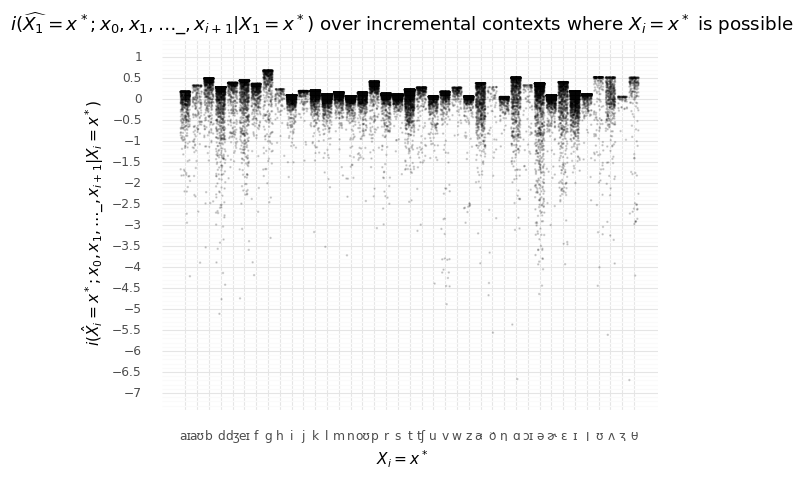

<ggplot: (-9223363305173846079)>

In [180]:
iXhatiStarX0kXiStar_plot = plot(iXhatiStarX0kXiStar_df, 
     x_col = '$x^*$', 
     y_col = '$i(\hat{X}_i = x^*; x_0, x_1, \ldots \_, x_{i+1} |X_i = x^*)$', 
     title = '$i(\widehat{X_1} = x^*; x_0, x_1, \ldots \_, x_{i+1} | X_1 = x^*)$ over incremental contexts where $X_i = x^*$ is possible', 
     x_label = '$X_i = x^*$', 
     y_label = '$i(\hat{X}_i = x^*; x_0, x_1, \ldots \_, x_{i+1} |X_i = x^*)$', 
     y_min = -7.0,
     y_max = 1.0,
     size=smallSize, 
     alpha=lowAlpha,
     width=largeWidth)
iXhatiStarX0kXiStar_plot

### $h(\widehat{X_i} = x^*|X_i = x^*)$ (for each choice of $i$)

$p(\widehat{X}_i = x' |X_i = x^*) = \sum\limits_{x_0^{i}; x_{i+1} : X_i = x^*} p(x_0 \ldots x_{i-1}, x_{i+1}|X_i = x^*) p(\widehat{X}_i = x'|x_0, x_1, \ldots X_i = x^*; x_{i+1})$

where $p(x_0 \ldots x_{i-1}, x_{i+1}|X_i = x^*) = \frac{p(x_0 \ldots x_{i-1}, X_i = x^*, x_{i+1})}{\sum\limits_{x'_0 \ldots x'_{i-1}, X'_i = x^*, x'_{i+1}} p(x'_0 \ldots x'_{i-1}, X'_i = x^*, x'_{i+1})}$, almost as calculated above (`pX0kXistar`) and similar to a calculation further above (`pX0hXistar`), but where normalization is done only by summing over prefixes matched for length/specific value of $i$.

In [181]:
xiToX0ks = {x_star:{i:{each for each in prefixesWhoseSecondToLastSegIs[x_star] if len(ds2t(each)) == i + 2}
                    for i in range(l_bar)}
            for x_star in Xs}

In [182]:
xstarToIs = {x_star:{i for i in range(l_bar) if len(xiToX0ks[x_star][i]) > 0}
             for x_star in Xs}

In [183]:
# ~1.41s [kotoba/python3]
# terribly naive and inefficient calculation
pX0kXistar_i = {x_star:{i:{x0k:pX0i[x0k] / sum(pX0i[x0k_prime] 
                                               for x0k_prime in xiToX0ks[x_star][i])
                           for x0k in xiToX0ks[x_star][i]}
                        for i in xstarToIs[x_star]}
                for x_star in Xs}

In [184]:
for x_star, i in product(Xs, range(l_bar)):
    if i in pX0kXistar_i[x_star] and len(pX0kXistar_i[x_star][i]) != 0:
        assert isNormalized(pX0kXistar_i[x_star][i])
        pX0kXistar_i[x_star][i] = ProbDist(pX0kXistar_i[x_star][i])

In [185]:
def pXhatiXi_i_calc(x_prime, x_star, i):
    x_star_idx = Xs_lexMap[x_star]
    x_prime_idx = Xs_lexMap[x_prime]
    
    l = i + 2
#     my_prefixes = set.intersection(prefixesWhoseSecondToLastSegIs[x_star],
#                                    prefixesWithLength(l))
    my_prefixes = xiToX0ks[x_star][i]
    return np.sum([pX0kXistar_i[x_star][i][x0k] * pXhatiX0k[x0k][x_prime]
                   for x0k in my_prefixes])

pXhatiXi_i = {x_star:{i:{x_prime:pXhatiXi_i_calc(x_prime, x_star, i)
                         for x_prime in Xs}
                      for i in xstarToIs[x_star]}
              for x_star in Xs}

In [186]:
for x_star, i in product(Xs, range(l_bar)):
    if i in pXhatiXi_i[x_star]:
        assert isNormalized(pXhatiXi_i[x_star][i]) or isclose(norm(pXhatiXi_i[x_star][i]), 0.0)
        if isNormalized(pXhatiXi_i[x_star][i]):
            pXhatiXi_i[x_star][i] = ProbDist(pXhatiXi_i[x_star][i])
    #     if len(pX0kXistar_i[x_star][i]) != 0:
    #         assert isNormalized(pX0kXistar_i[x_star][i])
    #         pX0kXistar_i[x_star][i] = ProbDist(pX0kXistar_i[x_star][i])

In [187]:
hXhatiStarXiStar_i = {x_star:{i: h_prime(pXhatiXi_i[x_star][i][x_star])
                              for i in xstarToIs[x_star]}
                      for x_star in Xs}

In [188]:
hXhatiStarXiStar_i_df = pd.DataFrame(data = [{'$x^*$':'{0}'.format(x_star),
                                              '$i$':'{0}'.format(i),
                                            '$h(\hat{X}_i = x^*|X_i = x^*)$':hXhatiStarXiStar_i[x_star][i]}
                                           for x_star in Xs for i in xstarToIs[x_star]])
hXhatiStarXiStar_i_df.head()

$h(\hat{X}_i = x^*|X_i = x^*)$ $i$ $x^*$
0                        1.020303   1     ɑ
1                        0.410535   2     ɑ
2                        0.193180   3     ɑ
3                        0.085077   4     ɑ
4                        0.047218   5     ɑ

In [189]:
hXhatiStarXiStar_i_df.sort_values(['$h(\hat{X}_i = x^*|X_i = x^*)$'], ascending=False)

$h(\hat{X}_i = x^*|X_i = x^*)$ $i$ $x^*$
135                        4.449644   1     u
56                         3.460771   1     v
243                        3.007787   1     θ
376                        2.641304   1     z
413                        2.494567   1     ʌ
251                        1.994975   1    ɔɪ
307                        1.959879   1     ɛ
146                        1.730014   1    eɪ
229                        1.540500   1     d
204                        1.495189   1    tʃ
294                        1.294990   1     ɚ
173                        1.194379   1    dʒ
273                        1.131335   1     g
0                          1.020303   1     ɑ
69                         0.862961   1     p
90                         0.802914   1     t
115                        0.761125   1     ə
244                        0.728571   2     θ
215                        0.689395   1     b
128                        0.647856   1    aʊ
147                        0.620058   2    eɪ
345                        0.610949   1     i
80                         0.598581   2     ʊ
422                        0.502480   1     f
31                         0.497510   1     æ
185                        0.495675   1     r
318                        0.471120   1     k
230                        0.458951   2     d
414                        0.437501   2     ʌ
1                          0.410535   2     ɑ
..                              ...  ..   ...
158                       -0.000000  13    eɪ
225                       -0.000000  11     b
164                       -0.000000   8     ʒ
170                       -0.000000   6     ð
172                       -0.000000   8     ð
375                       -0.000000  16     n
374                       -0.000000  15     n
373                       -0.000000  14     n
293                       -0.000000  11     j
371                       -0.000000  12     n
181                       -0.000000   9    dʒ
182                       -0.000000  10    dʒ
183                       -0.000000  11    dʒ
184                       -0.000000  12    dʒ
359                       -0.000000  15     i
358                       -0.000000  14     i
357                       -0.000000  13     i
356                       -0.000000  12     i
355                       -0.000000  11     i
194                       -0.000000  10     r
195                       -0.000000  11     r
202                       -0.000000   7     h
203                       -0.000000   9     h
212                       -0.000000   9    tʃ
213                       -0.000000  10    tʃ
344                       -0.000000  15     s
343                       -0.000000  13     s
342                       -0.000000  12     s
214                       -0.000000  12    tʃ
443                       -0.000000  12     m

[444 rows x 3 columns]

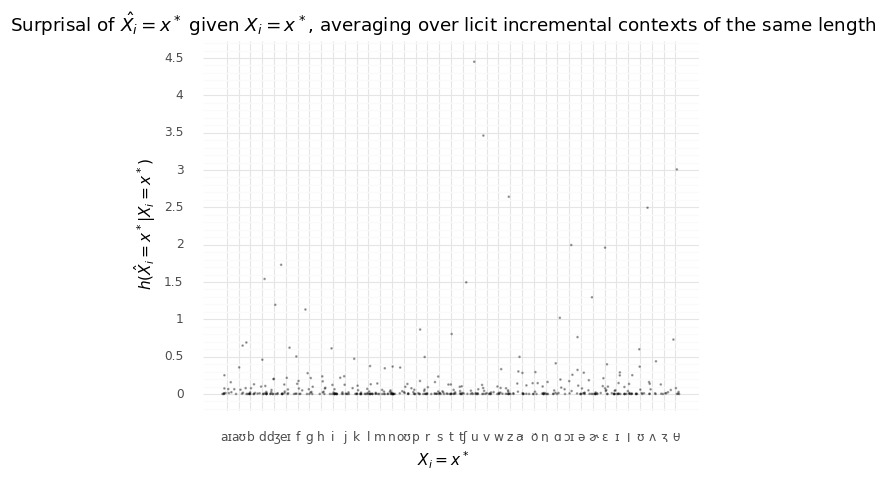

<ggplot: (-9223363304909833528)>

In [190]:
hXhatiStarXiStar_i_close = plot(hXhatiStarXiStar_i_df, 
     x_col = '$x^*$', 
     y_col = '$h(\hat{X}_i = x^*|X_i = x^*)$', 
     title = 'Surprisal of $\hat{X_i} = x^*$ given $X_i = x^*$, averaging over licit incremental contexts of the same length', 
     x_label = '$X_i = x^*$', 
     y_label = '$h(\hat{X}_i = x^*|X_i = x^*)$', 
     y_min = 0.0,
     y_max = 4.5,
     size=medSize, 
     alpha=medAlpha,
     width=largeWidth)
hXhatiStarXiStar_i_close

### $i(\hat{X}_i = x^* ; x_0 \ldots x_{i-1}, x_{i+1} | X_i = x^*)$ (version 2)

$i(\widehat{X}_i = x^*;x_0, x_1, \ldots x_{i+1} | X_i = x^*) = h(\widehat{X}_i = x^* | X_i = x^*) - h(\widehat{X}_i = x^* | x_0, x_1, \ldots X_i = x^*; x_{i+1})$

Here, the probability distribution underlying $h(\widehat{X}_i = x^* | X_i = x^*)$ is taken to be the marginal distribution over all possible choices of prefix **for a specific $i$ matched to that in the righthand term**.

### $H(\widehat{X_i}|X_i = x^*)$

$H(\widehat{X_i}|X_i = x^*) = \sum\limits_{x'} p(\widehat{X_i} = x'|X_i = x^*) h(\widehat{X_i} = x' | X_i = x^*)$

In [191]:
H(pXhatiXi['z'])

0.39270609697061154

In [192]:
HXhatiXi = {x_star:sum(pXhatiXi[x_star][x_prime] * h_prime(pXhatiXi[x_star][x_prime])
                       for x_prime in Xs)
            for x_star in Xs}

In [193]:
HXhatiXi_df = pd.DataFrame(data = [{'$x^*$':'{0}'.format(x_star),
                                    '$H(\hat{X}_i| X_i = x^*)$':HXhatiXi[x_star]}
                                   for x_star in Xs])
HXhatiXi_df.head()

$H(\hat{X}_i| X_i = x^*)$ $x^*$
0                   1.745076     ɑ
1                   0.862658    oʊ
2                   0.921465    aɪ
3                   1.526874     æ
4                   0.702879     ʃ

In [194]:
HXhatiXi_df.sort_values(['$H(\hat{X}_i| X_i = x^*)$'], ascending=False)

$H(\hat{X}_i| X_i = x^*)$ $x^*$
25                   2.134240     g
20                   1.924684     b
36                   1.821458     ʌ
0                    1.745076     ɑ
7                    1.720934     ʊ
6                    1.667665     p
10                   1.663266     ə
23                   1.641202    ɔɪ
22                   1.586400     θ
16                   1.551858    dʒ
13                   1.531108    eɪ
3                    1.526874     æ
37                   1.511143     f
28                   1.469818     ɛ
11                   1.447497    aʊ
15                   1.394643     ð
35                   1.377559     w
18                   1.203275     h
19                   1.143802    tʃ
21                   1.087056     d
8                    1.069695     t
26                   1.033763     j
29                   0.999315     k
34                   0.944363     ɪ
2                    0.921465    aɪ
1                    0.862658    oʊ
38                   0.859032     m
5                    0.856859     v
17                   0.727091     r
4                    0.702879     ʃ
24                   0.695406     l
30                   0.687868     s
31                   0.589891     i
27                   0.532306     ɚ
32                   0.412479     n
33                   0.392706     z
12                   0.379092     u
14                   0.333009     ʒ
9                    0.302765     ŋ

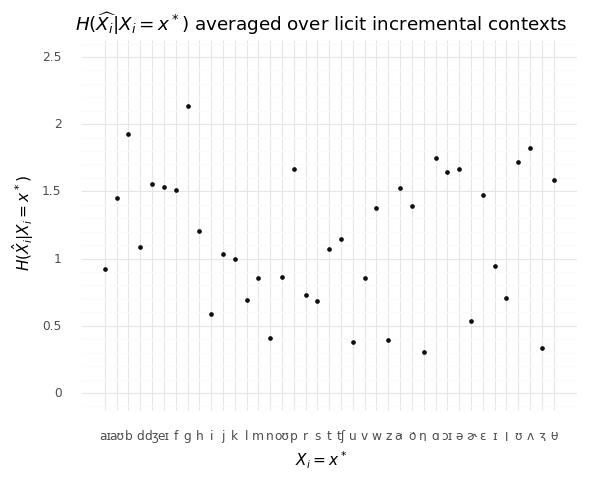

<ggplot: (-9223363304905542761)>

In [195]:
HXhatiXi_df_plot = plot(HXhatiXi_df, 
     x_col = '$x^*$', 
     y_col = '$H(\hat{X}_i| X_i = x^*)$', 
     title = '$H(\widehat{X_i}| X_i = x^*)$ averaged over licit incremental contexts', 
     x_label = '$X_i = x^*$', 
     y_label = '$H(\hat{X}_i| X_i = x^*)$', 
     y_min = 0.0,
     y_max = 2.5,
     size=largeSize, 
     alpha=highAlpha,
     width=0.0)
HXhatiXi_df_plot

### $I(\hat{X}_i ; X_0 \ldots X_{i-1}, X_{i+1} | X_i = x^*)$

$I(\widehat{X_1}; X_0 \ldots X_{i-1}, X_{i+1} | X_i = x^*) = H(\widehat{X_i} | X_i = x^*) - H(\widehat{X_i} | X_0 \ldots X_{i-1}, X_{i} = x^*, X_{i+1})$

In [196]:
IXhatiX0kXi_by_xstar = {x_star:HXhatiXi[x_star] - avgIncrementalEntropies_by_xstar[x_star]
                        for x_star in Xs}

In [197]:
IXhatiX0kXi_by_xstar_df = pd.DataFrame(data = [{'$x^*$':'{0}'.format(x_star),
                                                '$I(\widehat{X_i}; X_0 \ldots X_{i-1}, X_{i+1}| X_i = x^*)$':IXhatiX0kXi_by_xstar[x_star]}
                                               for x_star in Xs])
IXhatiX0kXi_by_xstar_df.head()

$I(\widehat{X_i}; X_0 \ldots X_{i-1}, X_{i+1}| X_i = x^*)$ $x^*$
0                                           0.364640              ɑ
1                                           0.179468             oʊ
2                                           0.250988             aɪ
3                                           0.203606              æ
4                                           0.125329              ʃ

In [198]:
IXhatiX0kXi_by_xstar_df.sort_values(['$I(\widehat{X_i}; X_0 \ldots X_{i-1}, X_{i+1}| X_i = x^*)$'], ascending=False)

$I(\widehat{X_i}; X_0 \ldots X_{i-1}, X_{i+1}| X_i = x^*)$ $x^*$
22                                           0.682731              θ
13                                           0.497313             eɪ
23                                           0.450575             ɔɪ
25                                           0.427600              g
10                                           0.422552              ə
36                                           0.418694              ʌ
16                                           0.417572             dʒ
21                                           0.404860              d
19                                           0.395211             tʃ
28                                           0.379705              ɛ
0                                            0.364640              ɑ
7                                            0.358748              ʊ
6                                            0.352629              p
5                                            0.312405              v
8                                            0.289833              t
11                                           0.280608             aʊ
20                                           0.260757              b
2                                            0.250988             aɪ
29                                           0.204050              k
3                                            0.203606              æ
17                                           0.203284              r
37                                           0.200487              f
35                                           0.198378              w
24                                           0.192220              l
34                                           0.189576              ɪ
1                                            0.179468             oʊ
38                                           0.175433              m
27                                           0.172578              ɚ
31                                           0.169679              i
4                                            0.125329              ʃ
30                                           0.121893              s
32                                           0.115821              n
26                                           0.113657              j
14                                           0.094514              ʒ
33                                           0.093577              z
9                                            0.092797              ŋ
12                                           0.081883              u
18                                           0.080547              h
15                                           0.070339              ð

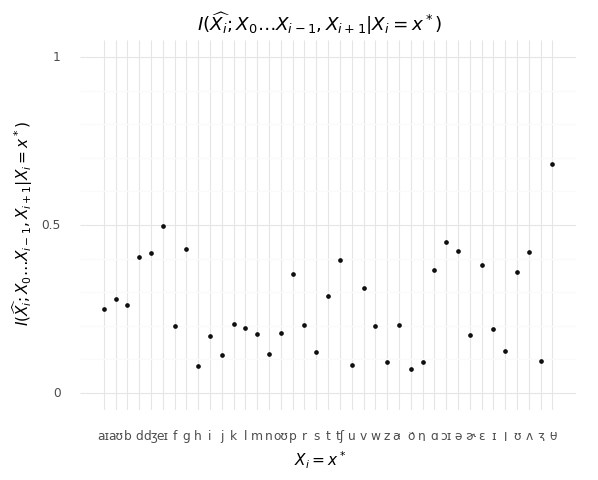

<ggplot: (-9223363305172971723)>

In [199]:
IXhatiX0kXi_by_xstar_plot = plot(IXhatiX0kXi_by_xstar_df, 
     x_col = '$x^*$', 
     y_col = '$I(\widehat{X_i}; X_0 \ldots X_{i-1}, X_{i+1}| X_i = x^*)$', 
     title = '$I(\widehat{X_i}; X_0 \ldots X_{i-1}, X_{i+1}| X_i = x^*)$', 
     x_label = '$X_i = x^*$', 
     y_label = '$I(\widehat{X_i}; X_0 \ldots X_{i-1}, X_{i+1}| X_i = x^*)$', 
     y_min = 0.0,
     y_max = 1.0,
     size=largeSize, 
     alpha=highAlpha,
     width=0.0)
IXhatiX0kXi_by_xstar_plot

### Average incremental contextual perceptual contrast: $D_{\overline{C}}(x^*,x') = D_{JS}(p(Y_i|X_i = x^*) || p(Y_i| X_i = x'))$

#FIXME

Suppose $c = x_0 \ldots x_{i-1}, x_{i+1}$ is a context that both $x^*$ and $x'$ can appear in as $x_i$. Then

$D_c(x^*, x') = D_{KL}(p(Y_i|x_0 \ldots x_{i-1} X_i = x^*; x_{i+1}) || p(Y_i|x_0 \ldots x_{i-1} X_i = x'; x_{i+1})) \\ = \sum\limits_{y} p(Y_i = y|x_0 \ldots x_{i-1} X_i = x^*; x_{i+1}) \log \frac{p(Y_i = y|x_0 \ldots x_{i-1} X_i = x^*; x_{i+1})}{p(Y_i = y|x_0 \ldots x_{i-1} X_i = x'; x_{i+1})}$

measures how perceptually discriminable or contrastive $x^*$ is from $x'$ in context $c = x_0 \ldots x_{i-1}, x_{i+1}$ given that $x^*$ was actually produced: this measure will be 0 iff $p(Y_i|x_0 \ldots x_{i-1} X_i = x^*; x_{i+1}) = p(Y_i|x_0 \ldots x_{i-1} X_i = x'; x_{i+1})$ and increase the more distinct they are.

#FIXME

If we take the expectation of this with respect to the set of common contexts $C_{X_i}(x^*, x') = \{x_0 \ldots x_{i-1}, x_{i+1}| x_0 \ldots x_{i-1}, X_i = x^*, x_{i+1} \in W \land x_0 \ldots x_{i-1}, X_i = x', x_{i+1} \in W\}$, we have a measure of how perceptually discriminable $x^*$ is from $x'$:

$D_{\overline{C}}(x^*,x') = \sum\limits_{x_0 \ldots x_{i-1}, x_{i+1} \in C_{X_i}(x^*, x')} \frac{p(x_0 \ldots x_{i-1}, x_{i+1} | X_i = x^*)}{\sum\limits_{x'_0 \ldots x'_{i-1}, x'_{i+1} \in C_{X_i}(x^*, x')} p(x'_0 \ldots x'_{i-1}, x'_{i+1} | X_i = x^*)} D_{KL}(p(Y_i|x_0 \ldots x_{i-1}, X_i = x^*; x_{i+1}) || p(Y_i| x_0 \ldots x_{i-1}, X_i = x'; x_{i+1}))$

**Note** that since the distribution over $Y_i$ depends **only** on $X_{i-1}, X_i, X_{i+1}$, this measure will *only differ from the corresponding triphone language heatmap* for two reasons:
 - as a result of the difference in the distribution being used to take an expectation
 - as a result of the fact that the triphone language heatmap only considers word-medial triphone contexts.

In [200]:
#whole cell takes ~3s [kotoba/python3]
def get_common_contexts_inc(x_star, x_prime):
    x_star_C = prefixesWhoseSecondToLastSegIs[x_star]
    x_prime_C = prefixesWhoseSecondToLastSegIs[x_prime]
    x_star_C_hole = set(map(removeXi,
                            x_star_C))
    x_prime_C_hole = set(map(removeXi,
                            x_prime_C))
    C = set.intersection(x_star_C_hole, x_prime_C_hole)
    return C

commonContexts_inc = {(x_star, x_prime):get_common_contexts_inc(x_star, x_prime)
                      for x_star, x_prime in product(Xs, Xs)}
noCommonContexts_inc = {(x_star, x_prime) 
                        for x_star, x_prime in commonContexts_inc 
                        if commonContexts_inc[(x_star, x_prime)] == set()}
list(commonContexts_inc[('i','u')])[:5]
len(noCommonContexts_inc) / 2
len(set(product(Xs, Xs))) / 2
list(noCommonContexts_inc)[:5]

['⋊.k._.⋉', '⋊.k.r._.d', '⋊.s.t._.p', '⋊.s.ə.l._.n', '⋊.g.l._.⋉']

151.0

760.5

[('z', 'ɛ'), ('ŋ', 'ɚ'), ('θ', 'ʌ'), ('ʒ', 'ʊ'), ('ɑ', 'tʃ')]

In [201]:
removeXi('b.i.p')
ds2t(removeXi('b.i.p'))
ds2t(removeXi('b.i.p'))[:3-2]
ds2t(removeXi('b.i.p'))[3-1:]

'b._.p'

('b', '_', 'p')

('b',)

('p',)

In [202]:
def insertXi(x0k_w_hole, x_star):
    x0k_w_hole_t = ds2t(x0k_w_hole)
    l = len(x0k_w_hole_t)
    i = l - 2
    assert x0k_w_hole_t[i] == '_'
    before_hole = x0k_w_hole_t[:l-2]
    after_hole = x0k_w_hole_t[l-1:]
    filled_in = t2ds(before_hole) + '.' + x_star + '.' + t2ds(after_hole)
    return filled_in

insertXi('b.i.p.b._.p', 'u')

'b.i.p.b.u.p'

In [203]:
def perceptualContrast_inc(x_star, x_prime, x0k_w_hole):
    assert x0k_w_hole in commonContexts_inc[(x_star, x_prime)]
    
    x0k_w_hole_t = ds2t(x0k_w_hole)
#     l = len(x0k_w_hole_t)
    localContext = t2ds(x0k_w_hole_t[-3:])
    
    channel_dist_xstar = p3Y1X012[fuse(localContext, x_star)]   #p3Y1X012_lex[fuse(localContext, x_star)]
    channel_dist_xprime = p3Y1X012[fuse(localContext, x_prime)] #p3Y1X012_lex[fuse(localContext, x_prime)]
    
#     pc = DKL(channel_dist_xstar, channel_dist_xprime)
    pc = JS(channel_dist_xstar, channel_dist_xprime)
    return pc

In [204]:
def avgPerceptualContrast_inc(x_star, x_prime):
    C = tuple(commonContexts_inc[(x_star, x_prime)])
    if len(C) == 0:
#         print((x_star, x_prime))
        return np.nan
    
    fusedC = tuple([insertXi(c, x_star) for c in C])
    unnormed_probs = tuple([pX0kXistar[x_star][c] for c in fusedC])
#     unnormed_probs = tuple([pX02[c] for c in C])
    norm_term = sum(unnormed_probs)
    probs = tuple([p/norm_term for p in unnormed_probs])
    PCs = tuple([perceptualContrast_inc(x_star, x_prime, c) for c in C])
    
    terms = tuple(zip(probs, PCs))
    prods = tuple(map(prod, terms))
    s = sum(prods)
#     assert s == sum([pX02X1[x_star][fuse(c, x_star)] * perceptualContrast(x_star, x_prime, c)
#                      for c in C])
#     assert s == sum([(pX02X1[x_star][fuse(c, x_star)]/sum(pX02X1[x_star][c_prime] for c_prime in fusedC)) * perceptualContrast(x_star, x_prime, c)
#                      for c in C])
    return s

In [205]:
len(p3Y1X012.keys())

45553

In [206]:
len(p3Y1X012_lex.keys())

7426

In [207]:
# 6.2s [kotoba/python3]
avgPC_inc = {(x_star, x_prime):avgPerceptualContrast_inc(x_star, x_prime)
             for x_star, x_prime in product(Xs, Xs)}

In [208]:
[pair for pair in avgPC_inc if np.isnan(avgPC_inc[pair])]

[('ɑ', 'v'),
 ('ɑ', 'ŋ'),
 ('ɑ', 'ʒ'),
 ('ɑ', 'ð'),
 ('ɑ', 'dʒ'),
 ('ɑ', 'h'),
 ('ɑ', 'tʃ'),
 ('ɑ', 'j'),
 ('ɑ', 'w'),
 ('oʊ', 'ŋ'),
 ('oʊ', 'ʒ'),
 ('aɪ', 'ŋ'),
 ('aɪ', 'ʒ'),
 ('æ', 'ʃ'),
 ('æ', 'v'),
 ('æ', 'ŋ'),
 ('æ', 'ʒ'),
 ('æ', 'ð'),
 ('æ', 'dʒ'),
 ('æ', 'r'),
 ('æ', 'h'),
 ('æ', 'tʃ'),
 ('æ', 'θ'),
 ('æ', 'l'),
 ('æ', 'j'),
 ('æ', 'z'),
 ('æ', 'w'),
 ('æ', 'm'),
 ('ʃ', 'æ'),
 ('ʃ', 'ʊ'),
 ('ʃ', 'u'),
 ('ʃ', 'ɔɪ'),
 ('ʃ', 'ɛ'),
 ('ʃ', 'i'),
 ('ʃ', 'ʌ'),
 ('v', 'ɑ'),
 ('v', 'æ'),
 ('v', 'ʊ'),
 ('v', 'aʊ'),
 ('v', 'u'),
 ('v', 'ɔɪ'),
 ('v', 'ɛ'),
 ('v', 'ɪ'),
 ('v', 'ʌ'),
 ('p', 'ʊ'),
 ('ʊ', 'ʃ'),
 ('ʊ', 'v'),
 ('ʊ', 'p'),
 ('ʊ', 't'),
 ('ʊ', 'ŋ'),
 ('ʊ', 'ʒ'),
 ('ʊ', 'ð'),
 ('ʊ', 'dʒ'),
 ('ʊ', 'r'),
 ('ʊ', 'h'),
 ('ʊ', 'tʃ'),
 ('ʊ', 'b'),
 ('ʊ', 'd'),
 ('ʊ', 'θ'),
 ('ʊ', 'l'),
 ('ʊ', 'g'),
 ('ʊ', 'j'),
 ('ʊ', 'k'),
 ('ʊ', 's'),
 ('ʊ', 'n'),
 ('ʊ', 'z'),
 ('ʊ', 'w'),
 ('ʊ', 'f'),
 ('ʊ', 'm'),
 ('t', 'ʊ'),
 ('t', 'ɔɪ'),
 ('t', 'ʌ'),
 ('ŋ', 'ɑ'),
 ('ŋ', 'oʊ'),
 ('ŋ', 'aɪ'),
 ('ŋ', 'æ

In [209]:
avgPC_inc_df = pd.DataFrame(data = [{'$x^*$':'{0}'.format(x_star),
                                     "$x'$":'{0}'.format(x_prime),
#                                      '$x_0.\_.x_2$':'${0}.\_.{1}$'.format(ds2t(x02)[0],ds2t(x02)[2]),
#                                      '$x_0.\_.x_2$':'{0}'.format(x02),
                                 "$D_{\overline{C}}(x^*, x')$":avgPC_inc[(x_star, x_prime)]}
                                for x_star, x_prime in avgPC_inc])
avgPC_inc_df.head()

$D_{\overline{C}}(x^*, x')$ $x'$ $x^*$
0                 6.397733e-16    ɑ     ɑ
1                 9.299660e-01   oʊ     ɑ
2                 8.018028e-01   aɪ     ɑ
3                 4.609022e-01    æ     ɑ
4                 9.325645e-01    ʃ     ɑ

In [210]:
noData_avgPC_inc = avgPC_inc_df[avgPC_inc_df["$D_{\overline{C}}(x^*, x')$"].isnull()]
noData_avgPC_inc.head()

$D_{\overline{C}}(x^*, x')$ $x'$ $x^*$
5                           NaN    v     ɑ
9                           NaN    ŋ     ɑ
14                          NaN    ʒ     ɑ
15                          NaN    ð     ɑ
16                          NaN   dʒ     ɑ

In [211]:
avgPC_inc_df[avgPC_inc_df["$x^*$"] == 't'].sort_values("$D_{\overline{C}}(x^*, x')$")

$D_{\overline{C}}(x^*, x')$ $x'$ $x^*$
320                 1.432926e-16    t     t
333                 2.531689e-01    d     t
329                 7.056127e-01    r     t
322                 7.785217e-01    ə     t
328                 7.869560e-01   dʒ     t
337                 8.052445e-01    g     t
331                 8.494446e-01   tʃ     t
323                 8.598133e-01   aʊ     t
332                 8.640596e-01    b     t
318                 8.664640e-01    p     t
346                 8.670083e-01    ɪ     t
342                 8.778436e-01    s     t
312                 8.912575e-01    ɑ     t
340                 8.937138e-01    ɛ     t
334                 8.948604e-01    θ     t
341                 8.959093e-01    k     t
321                 9.111948e-01    ŋ     t
315                 9.163502e-01    æ     t
314                 9.184482e-01   aɪ     t
350                 9.229390e-01    m     t
330                 9.245616e-01    h     t
327                 9.261970e-01    ð     t
336                 9.296138e-01    l     t
339                 9.320672e-01    ɚ     t
313                 9.324047e-01   oʊ     t
349                 9.360735e-01    f     t
317                 9.382684e-01    v     t
347                 9.442168e-01    w     t
324                 9.458349e-01    u     t
326                 9.458400e-01    ʒ     t
343                 9.464164e-01    i     t
316                 9.464626e-01    ʃ     t
345                 9.476150e-01    z     t
344                 9.481671e-01    n     t
338                 9.498421e-01    j     t
325                 9.591785e-01   eɪ     t
319                          NaN    ʊ     t
335                          NaN   ɔɪ     t
348                          NaN    ʌ     t

/home/AD/emeinhar/anaconda3/envs/omnibus/lib/python3.6/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or
/home/AD/emeinhar/anaconda3/envs/omnibus/lib/python3.6/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or
/home/AD/emeinhar/anaconda3/envs/omnibus/lib/python3.6/site-packages/mizani/bounds.py:352: RuntimeWarning: invalid value encountered in less
  outside = (x < range[0]) | (x > range[1])
/home/AD/emeinhar/anaconda3/envs/omnibus/lib/python3.6/site-packages/mizani/bounds.py:352: RuntimeWarning: invalid value encountered in greater
  outside = (x < range[0]) | (x > range[1])
/home/AD/emeinhar/anaconda3/envs/omnibus/lib/python3.6/site-packages/matplotlib/colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


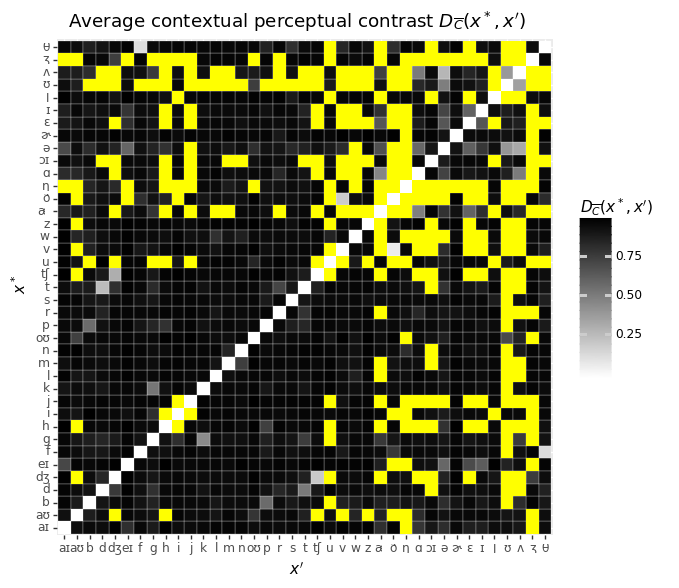

<ggplot: (8731923091688)>

In [212]:
avgPC_inc_hm_d = ggplot(avgPC_inc_df, aes("$x'$", "$x^*$"))
avgPC_inc_hm_d = avgPC_inc_hm_d + scale_fill_gradient(low = "white", high = 'black', na_value='yellow')
avgPC_inc_hm_d = avgPC_inc_hm_d + geom_tile(aes(fill="$D_{\overline{C}}(x^*, x')$", width=1.0, height=1.0), color="white") + coord_fixed()
avgPC_inc_hm_d = avgPC_inc_hm_d + geom_tile(fill = 'yellow', data = noData_avgPC_inc) + coord_fixed()
avgPC_inc_hm_d = avgPC_inc_hm_d + ggtitle("Average contextual perceptual contrast $D_{\overline{C}}(x^*, x')$")
avgPC_inc_hm_d

/home/AD/emeinhar/anaconda3/envs/omnibus/lib/python3.6/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or
/home/AD/emeinhar/anaconda3/envs/omnibus/lib/python3.6/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or
/home/AD/emeinhar/anaconda3/envs/omnibus/lib/python3.6/site-packages/mizani/bounds.py:352: RuntimeWarning: invalid value encountered in less
  outside = (x < range[0]) | (x > range[1])
/home/AD/emeinhar/anaconda3/envs/omnibus/lib/python3.6/site-packages/mizani/bounds.py:352: RuntimeWarning: invalid value encountered in greater
  outside = (x < range[0]) | (x > range[1])
/home/AD/emeinhar/anaconda3/envs/omnibus/lib/python3.6/site-packages/matplotlib/colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


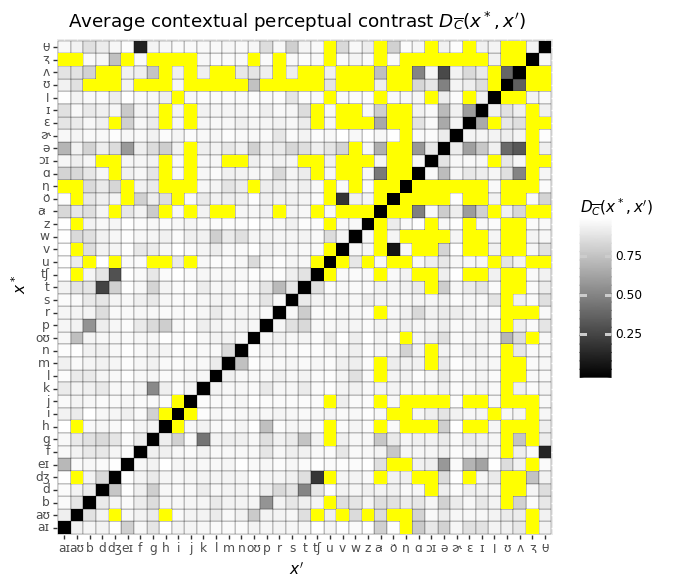

<ggplot: (-9223363304931688490)>

In [223]:
avgPC_inc_hm_l = ggplot(avgPC_inc_df, aes("$x'$", "$x^*$"))
avgPC_inc_hm_l = avgPC_inc_hm_l + scale_fill_gradient(low = "black", high = 'white', na_value='yellow')
avgPC_inc_hm_l = avgPC_inc_hm_l + geom_tile(aes(fill="$D_{\overline{C}}(x^*, x')$", width=1.0, height=1.0), color="black") + coord_fixed()
avgPC_inc_hm_l = avgPC_inc_hm_l + geom_tile(fill = 'yellow', data = noData_avgPC_inc) + coord_fixed()
avgPC_inc_hm_l = avgPC_inc_hm_l + ggtitle("Average contextual perceptual contrast $D_{\overline{C}}(x^*, x')$")
avgPC_inc_hm_l

### Average incremental contextual discriminability: $\hat{D}_{\overline{C}}(x^*,x') = D_{JS}(p(\hat{X}_i|X_i = x^*) || p(\hat{X}_i| X_i = x'))$

In [214]:
def contextualDiscriminability_inc(x_star, x_prime, x0k_w_hole):
    assert x0k_w_hole in commonContexts_inc[(x_star, x_prime)]
    
    posterior_dist_xstar = ProbDist(pXhatiX0k[insertXi(x0k_w_hole, x_star)])
    posterior_dist_xprime = ProbDist(pXhatiX0k[insertXi(x0k_w_hole, x_prime)])
    
#     pc = DKL(posterior_dist_xstar, posterior_dist_xprime)
    pc = JS(posterior_dist_xstar, posterior_dist_xprime)
    return pc

In [215]:
def avgContextualDiscriminability_inc(x_star, x_prime):
    C = tuple(commonContexts_inc[(x_star, x_prime)])
    if len(C) == 0:
#         print((x_star, x_prime))
        return np.nan
    
    fusedC = tuple([insertXi(c, x_star) for c in C])
    unnormed_probs = tuple([pX0kXistar[x_star][c] for c in fusedC])
#     unnormed_probs = tuple([pX02[c] for c in C])
    norm_term = sum(unnormed_probs)
    probs = tuple([p/norm_term for p in unnormed_probs])
    PCs = tuple([contextualDiscriminability_inc(x_star, x_prime, c) for c in C])
    
    terms = tuple(zip(probs, PCs))
    prods = tuple(map(prod, terms))
    s = sum(prods)
#     assert s == sum([pX02X1[x_star][fuse(c, x_star)] * contextualDiscriminability(x_star, x_prime, c)
#                      for c in C])
#     assert s == sum([(pX02X1[x_star][fuse(c, x_star)]/sum(pX02X1[x_star][c_prime] for c_prime in fusedC)) * contextualDiscriminability(x_star, x_prime, c)
#                      for c in C])
    return s

In [216]:
# 10.3s [kotoba/python3]
avgCD_inc = {(x_star, x_prime):avgContextualDiscriminability_inc(x_star, x_prime)
             for x_star, x_prime in product(Xs, Xs)}

In [217]:
avgCD_inc_df = pd.DataFrame(data = [{'$x^*$':'{0}'.format(x_star),
                                     "$x'$":'{0}'.format(x_prime),
#                                  '$x_0.\_.x_2$':'${0}.\_.{1}$'.format(ds2t(x02)[0],ds2t(x02)[2]),
#                                  '$x_0.\_.x_2$':'{0}'.format(x02),
                                     "$\hat{D}_{\overline{C}}(x^*, x')$":avgCD_inc[(x_star, x_prime)]}
                                    for x_star, x_prime in avgCD_inc])
avgCD_inc_df.head()

$\hat{D}_{\overline{C}}(x^*, x')$ $x'$ $x^*$
0                       8.179028e-18    ɑ     ɑ
1                       8.067722e-01   oʊ     ɑ
2                       5.669888e-01   aɪ     ɑ
3                       2.710975e-01    æ     ɑ
4                       8.861230e-01    ʃ     ɑ

In [218]:
noData_avgCD_inc = avgCD_inc_df[avgCD_inc_df["$\hat{D}_{\overline{C}}(x^*, x')$"].isnull()]
noData_avgCD_inc.head()

$\hat{D}_{\overline{C}}(x^*, x')$ $x'$ $x^*$
5                                 NaN    v     ɑ
9                                 NaN    ŋ     ɑ
14                                NaN    ʒ     ɑ
15                                NaN    ð     ɑ
16                                NaN   dʒ     ɑ

In [219]:
avgCD_inc_df[avgCD_inc_df["$x^*$"] == 't'].sort_values("$\hat{D}_{\overline{C}}(x^*, x')$")

$\hat{D}_{\overline{C}}(x^*, x')$ $x'$ $x^*$
320                       1.246793e-17    t     t
333                       8.661237e-02    d     t
329                       3.997020e-01    r     t
322                       4.187167e-01    ə     t
328                       5.178591e-01   dʒ     t
331                       5.857154e-01   tʃ     t
346                       5.965408e-01    ɪ     t
337                       5.991036e-01    g     t
325                       6.112702e-01   eɪ     t
332                       6.526193e-01    b     t
318                       6.639014e-01    p     t
321                       6.645037e-01    ŋ     t
314                       6.785570e-01   aɪ     t
323                       7.019289e-01   aʊ     t
324                       7.126035e-01    u     t
345                       7.208652e-01    z     t
341                       7.210248e-01    k     t
339                       7.244530e-01    ɚ     t
313                       7.312511e-01   oʊ     t
312                       7.329874e-01    ɑ     t
334                       7.345201e-01    θ     t
342                       7.765329e-01    s     t
336                       7.822826e-01    l     t
349                       7.837850e-01    f     t
327                       7.911872e-01    ð     t
330                       8.009654e-01    h     t
316                       8.022717e-01    ʃ     t
317                       8.042395e-01    v     t
347                       8.052628e-01    w     t
340                       8.146458e-01    ɛ     t
350                       8.243808e-01    m     t
326                       8.368355e-01    ʒ     t
343                       8.463573e-01    i     t
338                       8.469071e-01    j     t
344                       8.653984e-01    n     t
315                       9.192702e-01    æ     t
319                                NaN    ʊ     t
335                                NaN   ɔɪ     t
348                                NaN    ʌ     t

/home/AD/emeinhar/anaconda3/envs/omnibus/lib/python3.6/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or
/home/AD/emeinhar/anaconda3/envs/omnibus/lib/python3.6/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or
/home/AD/emeinhar/anaconda3/envs/omnibus/lib/python3.6/site-packages/mizani/bounds.py:352: RuntimeWarning: invalid value encountered in less
  outside = (x < range[0]) | (x > range[1])
/home/AD/emeinhar/anaconda3/envs/omnibus/lib/python3.6/site-packages/mizani/bounds.py:352: RuntimeWarning: invalid value encountered in greater
  outside = (x < range[0]) | (x > range[1])
/home/AD/emeinhar/anaconda3/envs/omnibus/lib/python3.6/site-packages/matplotlib/colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


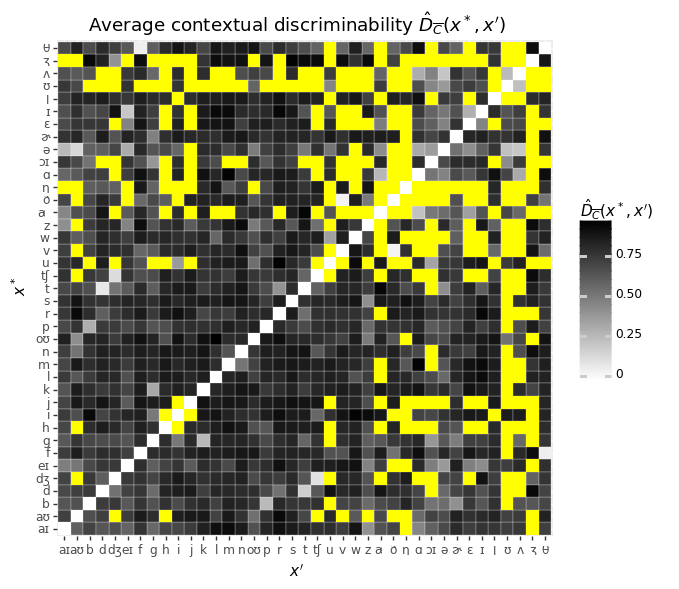

<ggplot: (8731678604345)>

In [220]:
avgCD_inc_hm_d = ggplot(avgCD_inc_df, aes("$x'$", "$x^*$"))
avgCD_inc_hm_d = avgCD_inc_hm_d + scale_fill_gradient(low = "white", high = 'black', na_value='yellow')
avgCD_inc_hm_d = avgCD_inc_hm_d + geom_tile(aes(fill="$\hat{D}_{\overline{C}}(x^*, x')$", width=1.0, height=1.0), color="white") + coord_fixed()
avgCD_inc_hm_d = avgCD_inc_hm_d + geom_tile(fill = 'yellow', data = noData_avgCD_inc) + coord_fixed()
avgCD_inc_hm_d = avgCD_inc_hm_d + ggtitle("Average contextual discriminability $\hat{D}_{\overline{C}}(x^*, x')$")
avgCD_inc_hm_d

/home/AD/emeinhar/anaconda3/envs/omnibus/lib/python3.6/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or
/home/AD/emeinhar/anaconda3/envs/omnibus/lib/python3.6/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or
/home/AD/emeinhar/anaconda3/envs/omnibus/lib/python3.6/site-packages/mizani/bounds.py:352: RuntimeWarning: invalid value encountered in less
  outside = (x < range[0]) | (x > range[1])
/home/AD/emeinhar/anaconda3/envs/omnibus/lib/python3.6/site-packages/mizani/bounds.py:352: RuntimeWarning: invalid value encountered in greater
  outside = (x < range[0]) | (x > range[1])
/home/AD/emeinhar/anaconda3/envs/omnibus/lib/python3.6/site-packages/matplotlib/colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


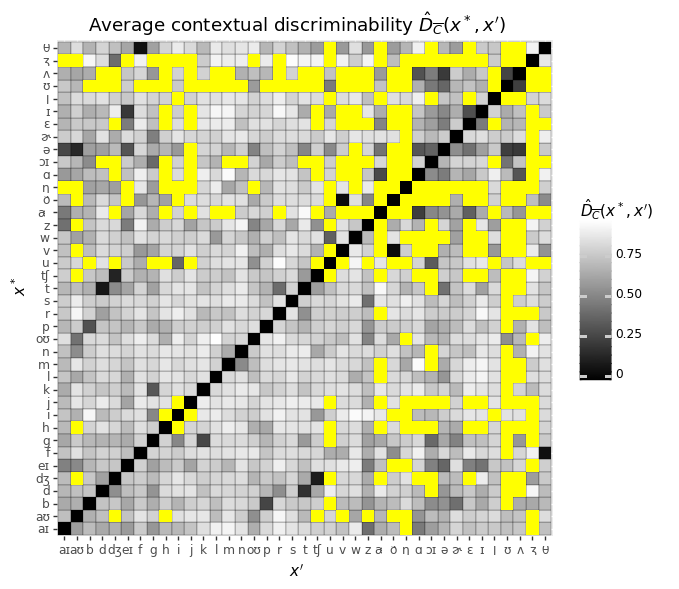

<ggplot: (8731677977699)>

In [224]:
avgCD_inc_hm_l = ggplot(avgCD_inc_df, aes("$x'$", "$x^*$"))
avgCD_inc_hm_l = avgCD_inc_hm_l + scale_fill_gradient(low = "black", high = 'white', na_value='yellow')
avgCD_inc_hm_l = avgCD_inc_hm_l + geom_tile(aes(fill="$\hat{D}_{\overline{C}}(x^*, x')$", width=1.0, height=1.0), color="black") + coord_fixed()
avgCD_inc_hm_l = avgCD_inc_hm_l + geom_tile(fill = 'yellow', data = noData_avgCD_inc) + coord_fixed()
avgCD_inc_hm_l = avgCD_inc_hm_l + ggtitle("Average contextual discriminability $\hat{D}_{\overline{C}}(x^*, x')$")
avgCD_inc_hm_l

### $\Delta(w^*, x^*, i) = h(\widehat{X_0^f} = w^*|x_0^{i-1};x_{i}) - h(\widehat{X_0^f} = w^*|x_0^{i};x_{i+1})$

For each $x^*$, what is the set of changes in value of the listener's beliefs as a result of producing each token of $x^*$?

In [225]:
randW = getRandomKey(pW)

In [226]:
len(ds2t(randW))

6

In [227]:
sorted(list(getPrefixes(randW)))
len(sorted(list(getPrefixes(randW))))
sorted(list(getPrefixes(randW)))[2:]

['⋊', '⋊.r', '⋊.r.æ', '⋊.r.æ.ð', '⋊.r.æ.ð.ɚ', '⋊.r.æ.ð.ɚ.⋉']

6

['⋊.r.æ', '⋊.r.æ.ð', '⋊.r.æ.ð.ɚ', '⋊.r.æ.ð.ɚ.⋉']

In [228]:
list(map(lambda r: prefixMap[r],
         sorted(list(getPrefixes(randW)))))

[0, 24302, 24943, 25117, 25118, 25119]

In [229]:
def prefixSequence(w, fromIndex=False, toIndices=False):
    if fromIndex:
        w = W_idxMap[w]
    prefSeq = tuple(sorted(list(getPrefixes(w)))[2:])
    
    if not toIndices:
        return prefSeq
    
    return tuple(map(lambda r: prefixMap[r],
                    prefSeq))

In [230]:
randW
prefixSequence(randW)
prefixSequence(randW, toIndices=True)
prefixSequence(Wmap[randW], fromIndex=True, toIndices=True)

'⋊.r.æ.ð.ɚ.⋉'

('⋊.r.æ', '⋊.r.æ.ð', '⋊.r.æ.ð.ɚ', '⋊.r.æ.ð.ɚ.⋉')

(24943, 25117, 25118, 25119)

(24943, 25117, 25118, 25119)

Let $R :: (n,m)$ denote the matrix where $R_{i,j} = 1$ iff prefix $r_j$ is a prefix of wordform $w_i$ and $0$ otherwise.

In [231]:
max(prefixMap.values())

46185

In [232]:
phatXhat0fX0k_np.shape
R = np.zeros(phatXhat0fX0k_np.shape)

(12565, 46186)

In [233]:
def r_update(i):
    w = W_idxMap[i]
    jsToUpdate = map(lambda r: prefixMap[r],
                     getPrefixes(w))
    for j in jsToUpdate:
        R[i,j] = 1

In [234]:
for i in range(R.shape[0]):
    r_update(i)

In [235]:
for each in map(lambda r: prefixMap[r], getPrefixes(randW)):
    assert R[Wmap[randW],each] == 1

Recall that
 - $\widehat{W} :: (n,m)$ is the matrix representing $\hat{p}(\widehat{X}_0^f|X_0^k)$.

$\therefore$ $\widehat{W_{a,b}} = \hat{p}(\widehat{X}_0^f = w_a|X_0^k = r_b)$.

Let 
 - $\Delta(w^*, i) = h(\widehat{X_0^f} = w^*|x_0^{i-1};x_{i}) - h(\widehat{X_0^f} = w^*|x_0^{i};x_{i+1})$.
 - $\Delta(w_a, i) = \widehat{W_{a,k-1}} - \widehat{W_{a,k}}$, where $r_{k-1} = x_{0}^{*i-1}, x_i^*$ and $r_k = x_{0}^{*i}, x_{i+1}^*$

In [236]:
l_bar

18

$V(w_a) :: (1,\bar{l}-1)$

In [237]:
def get_value_vec(w, fromIndex=False, pad=False):
    if not fromIndex:
        w_idx = Wmap[w]
    else:
        w_idx = w
        w = W_idxMap[w_idx]
    
    l = len(ds2t(w))
    
    # will be a sequence of length l-2
    my_prefix_indices = prefixSequence(w_idx, True, True)
    
    # will be a sequence of length l-1
    my_value_vec = [pW[w]] + [phatXhat0fX0k_np[w_idx, r_idx] for r_idx in my_prefix_indices]
    my_value_vec = [h_prime(p) for p in my_value_vec]
    
    if pad:
        padding = [np.nan for each in range((l_bar-1) - (l-1))]
        return np.array(my_value_vec + padding)
    return np.array(my_value_vec)

In [238]:
randW
h_prime(pW[randW])
print(get_value_vec(randW))
len(get_value_vec(randW))
' '
print(get_value_vec(randW, pad=True))
len(get_value_vec(randW, pad=True))

'⋊.r.æ.ð.ɚ.⋉'

11.454829408604283

[ 11.45482941   4.02753067   1.13156268   0.07655082   0.09715892]


5

' '

[ 11.45482941   4.02753067   1.13156268   0.07655082   0.09715892
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan]


17

$V :: (n, \bar{l}-1)$ where $V_{i,j}$ = $h(\widehat{X_0^f} = w^*_i|x_{-1} \ldots x_j; x_{j+1})$

In [239]:
V = np.stack([get_value_vec(w, fromIndex=False, pad=True) for w in sorted(list(Ws))])
V.shape

(12565, 17)

In [240]:
randW
V[Wmap[randW],:]
V[Wmap[randW],0] #value of listener's beliefs before anything has been produced (i.e. 'at' ⋊)
V[Wmap[randW],1] #value of listener's beliefs after x_0 has been produced

'⋊.r.æ.ð.ɚ.⋉'

array([ 11.45482941,   4.02753067,   1.13156268,   0.07655082,
         0.09715892,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,          nan])

11.454829408604283

4.0275306734412348

$\Delta(w_a) :: (1,\bar{l} - 2)$

In [241]:
def get_delta_vec(w, fromIndex=False, pad=False):
    if not fromIndex:
        w_idx = Wmap[w]
    else:
        w_idx = w
        w = W_idxMap[w_idx]
    
    l = len(ds2t(w))
    
    # will be a sequence of length l-1
    my_value_vec = get_value_vec(w)
    v = my_value_vec
    
    # will be a sequence of length l-2
    my_delta_vec = np.array([v[i-1] - v[i] for i in range(1, len(v))])
    
    if pad:
        padding = [np.nan for each in range((l_bar-2) - (l-2))]
        return np.array(list(my_delta_vec) + padding)
    
#     my_delta_vec = np.array([v[i-1] - v[i] for i in range(1, len(v))])
    return my_delta_vec

In [242]:
get_delta_vec(randW, pad=False)
get_delta_vec(randW, pad=True)

array([ 7.42729874,  2.89596799,  1.05501186, -0.0206081 ])

array([ 7.42729874,  2.89596799,  1.05501186, -0.0206081 ,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan])

$\Delta :: (n,\bar{l}-2)$ where $\Delta_{i,j} = h(\widehat{X_0^f} = w^*_i|x_0 \ldots x_{j-1};x_{j}) - h(\widehat{X_0^f} = w_i^*|x_0 \ldots x_{j};x_{j+1})$

In [243]:
Delta = np.stack([get_delta_vec(w, fromIndex=False, pad=True) for w in sorted(list(Ws))])
Delta.shape

(12565, 16)

In [244]:
randW
len(ds2t(randW))
Wmap[randW]
Delta[Wmap[randW],:]
Delta[Wmap[randW],0] #change in value of (expected) listener's beliefs as a result of producing x_0, the first non-edge segment
V[Wmap[randW],0] - V[Wmap[randW],1] #should be identical to value just above

'⋊.r.æ.ð.ɚ.⋉'

6

7078

array([ 7.42729874,  2.89596799,  1.05501186, -0.0206081 ,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan])

7.4272987351630482

7.4272987351630482

In [245]:
Delta[Wmap[randW],:].shape
Delta[Wmap[randW],:]

(16,)

array([ 7.42729874,  2.89596799,  1.05501186, -0.0206081 ,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan])

In [246]:
ds2t(randW)[1] #symbol
Xs_lexMap[ds2t(randW)[1]] #symbol index i
Xs_lexOHmap[ds2t(randW)[1]] #OH vector
Xs_lexOHmap[ds2t(randW)[1]][ Xs_lexMap[ds2t(randW)[1]] ] # ith index of OH vector

'r'

17

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.])

1.0

Recall/note that 
 - $O :: (s,\bar{l}, n)$
 - $O_{:,:,c}$ is the sequence of one-hot vectors for the $c$th wordform indicating what the symbols in it are.
 - $O_{:,j,c}$ is a one-hot vector indicating what the $j$th symbol of the $c$th wordform is (or if it doesn't have one).
 - $O_{i,j,c} = 1$ iff the $j$th symbol $X_j$ of the $c$th wordform $x_0^f$ is $x_i$.
 - $O_{:,j,:}$ is a stack of $n$ one-hot vectors indicating what the $j$th symbol is (or if there is no such symbol) for all $n$ wordforms.
 - $O_{i,j,:}$ is a length $n$ vector indicating for each of the $n$ wordforms $\{w_c\}$ whether $w_c$'s $j$th symbol is $x_i$ or not.
 - $O_{i,:,:}$ is a $\bar{l} \times n$ matrix indicating for each word $c$ (i.e. each column) whether its $j$th symbol (i.e. each row) is symbol $x_i$.
 - $O_{i,:,c}$ is a length $\bar{l}$ vector indicating which of wordform $c$'s indices are symbol $x_i$.

In [247]:
O.shape

(41, 18, 12565)

In [248]:
leftEdgeVec = O[:,0,0]
leftEdgeVec
Xs_lexOHseqMap(leftEdgeVec)
O[:,0,1]
O[:,0,2]
O[:,0,2343]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  1.])

'⋊'

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  1.])

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  1.])

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  1.])

In [249]:
Delta.shape

(12565, 16)

In [250]:
O_hat = O[:,1:-1,:]
O_hat.shape

(41, 16, 12565)

$\Delta_{c,:} \cdot \hat{O}_{i,:,c} = \sum\limits_{j} \Delta_{c,j} \cdot \hat{O}_{i,j,c}$ = the net value contributed by all instances of $x_i$ in wordform $c$.

$\Delta_{c,:} \odot \hat{O}_{i,:,c}$ = just the value contributed by instances of $x_i$ in wordform $c$.

In [251]:
randW

'⋊.r.æ.ð.ɚ.⋉'

In [252]:
Delta[Wmap[randW],:]
Delta[Wmap[randW],:].shape
' '
O[Xs_lexMap[ds2t(randW)[1]],:,Wmap[randW]]
O[Xs_lexMap[ds2t(randW)[1]],:,Wmap[randW]].shape
O[Xs_lexMap[ds2t(randW)[1]],:,Wmap[randW]][1:-1]
O[Xs_lexMap[ds2t(randW)[1]],:,Wmap[randW]][1:-1].shape
np.dot(Delta[Wmap[randW],:], O[Xs_lexMap[ds2t(randW)[1]],:,Wmap[randW]][1:-1])
np.nansum(Delta[Wmap[randW],:] * O[Xs_lexMap[ds2t(randW)[1]],:,Wmap[randW]][1:-1])
Delta[Wmap[randW],:] * O[Xs_lexMap[ds2t(randW)[1]],:,Wmap[randW]][1:-1]
Delta[Wmap[randW],:] * O_hat[Xs_lexMap[ds2t(randW)[1]],:,Wmap[randW]]

array([ 7.42729874,  2.89596799,  1.05501186, -0.0206081 ,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan])

(16,)

' '

array([ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.])

(18,)

array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.])

(16,)

nan

7.4272987351630482

array([ 7.42729874,  0.        ,  0.        , -0.        ,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan])

array([ 7.42729874,  0.        ,  0.        , -0.        ,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan])

Let $\hat{\Delta}_i = \Delta^T \odot \hat{O}_{i} :: (\bar{l}-2, n)$, where
 - $\hat{\Delta}_{i,j,c}$ is the value contributed by a token of $x_i$ at index $j+1$ of wordform $c$, for any non-word-edge symbol $x_i$.

In [253]:
Delta_hat_l = Delta.T * O_hat[Xs_lexMap[ds2t(randW)[1]]]
Delta_hat_l.shape
Delta_hat_l[:,Wmap[randW]]

(16, 12565)

array([ 7.42729874,  0.        ,  0.        , -0.        ,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan])

In [254]:
#what I want is a dataframe where each row is either
# (i in x_i, j, c in w^*_c, \Delta_{c,j}) <- direct translation of Delta_hat below
# (x^*, j, w^*_c, \Delta_{c,j}) # <- more readable

In [255]:
Delta_hat = Delta.T * O_hat
Delta_hat.shape
O_hat.shape
prod(O_hat.shape)

(41, 16, 12565)

(41, 16, 12565)

8242640

In [256]:
#2.9s [kotoba/python3]
Delta_hat_dicts = []
for i in np.arange(Delta_hat.shape[0]):
    for j in np.arange(Delta_hat.shape[1]):
        for c in np.arange(Delta_hat.shape[2]):
            if O_hat[i,j,c] == 1:
                Delta_hat_dicts.append({'i':i,
                                       'j_bar':j+1,
                                       'j':j,
                                       'c':c,
                                       'delta':Delta_hat[i,j,c],
                                       'x*':Xslex_idxmap[i],
                                       'w':W_idxMap[c]})

In [257]:
Delta_hat_l.shape
Delta_hat[Xs_lexMap[ds2t(randW)[1]]].shape
Delta_hat[Xs_lexMap[ds2t(randW)[1]]][:,Wmap[randW]]

(16, 12565)

(16, 12565)

array([ 7.42729874,  0.        ,  0.        , -0.        ,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan])

In [258]:
Delta_hat_dicts[0]

{'i': 0,
 'j_bar': 1,
 'j': 0,
 'c': 0,
 'delta': 10.109286965171647,
 'x*': 'aɪ',
 'w': '⋊.aɪ.b.ə.s.⋉'}

In [259]:
from frozendict import *

In [260]:
Delta_hat_by_x_star = {x_star:{FrozenDict(row) for row in Delta_hat_dicts if row['x*'] == x_star}
                       for x_star in Xs}

In [261]:
Delta_hat_df = pd.DataFrame(data = Delta_hat_dicts)
Delta_hat_df.head()

c      delta  i  j  j_bar                          w  x*
0  0  10.109287  0  0      1               ⋊.aɪ.b.ə.s.⋉  aɪ
1  1   8.418428  0  0      1             ⋊.aɪ.d.i.l.i.⋉  aɪ
2  2   8.719727  0  0      1  ⋊.aɪ.d.i.l.ə.z.eɪ.ʃ.ɪ.n.⋉  aɪ
3  3   8.676172  0  0      1         ⋊.aɪ.d.i.l.ɪ.z.m.⋉  aɪ
4  4   8.608585  0  0      1               ⋊.aɪ.d.i.l.⋉  aɪ

In [262]:
Delta_hat_df.sort_values('delta', ascending=False)

c      delta   i   j  j_bar                                    w  \
48703   9565  14.786755  21   0      1                              ⋊.u.z.⋉   
30287   5778  13.902778  15   0      1                        ⋊.oʊ.z.oʊ.n.⋉   
30291   5782  13.855630  15   0      1                               ⋊.oʊ.⋉   
10781   3018  13.117970   9   0      1                                ⋊.i.⋉   
10761   2998  12.187862   9   0      1                          ⋊.i.m.j.u.⋉   
30335    857  12.146040  15   1      2                           ⋊.d.oʊ.z.⋉   
48761   2377  12.112424  21   1      2                            ⋊.g.u.f.⋉   
5722   10148  11.926989   4   1      2                           ⋊.æ.dʒ.l.⋉   
63766   2099  11.886373  32   1      2                        ⋊.f.ɛ.z.n.t.⋉   
10776   3013  11.735094   9   0      1                            ⋊.i.z.i.⋉   
10775   3012  11.702937   9   0      1                   ⋊.i.z.i.g.oʊ.ɪ.ŋ.⋉   
10777   3014  11.671366   9   0      1                            ⋊.i.z.l.⋉   
51413  12174  11.624615  24   1      2                            ⋊.ɪ.z.m.⋉   
57310  10754  11.619365  29   0      1                         ⋊.ɔɪ.s.t.ɚ.⋉   
6674   12201  11.574832   5   1      2                           ⋊.ʃ.eɪ.z.⋉   
10778   3015  11.571873   9   0      1                              ⋊.i.z.⋉   
10960   4821  11.327834   9   1      2                        ⋊.m.i.z.l.i.⋉   
61136  11162  11.317407  31   0      1                          ⋊.ɚ.m.ə.n.⋉   
61130  11156  11.316531  31   0      1             ⋊.ɚ.b.ɪ.n.ɪ.z.eɪ.ʃ.ɪ.n.⋉   
8575    2704  11.305810   6   2      3                ⋊.h.æ.f.h.ɑ.r.t.ɪ.d.⋉   
61129  11155  11.301685  31   0      1                         ⋊.ɚ.b.eɪ.n.⋉   
48968   9633  11.269440  21   1      2                          ⋊.v.u.d.u.⋉   
61131  11157  11.259063  31   0      1                          ⋊.ɚ.b.ɪ.n.⋉   
61143  11169  11.248085  31   0      1                     ⋊.ɚ.θ.k.w.eɪ.k.⋉   
57309  10753  11.237397  29   0      1                   ⋊.ɔɪ.n.t.m.ə.n.t.⋉   
63705   1168  11.216170  32   1      2                 ⋊.d.ɛ.z.ɪ.g.n.eɪ.t.⋉   
61142  11168  11.195306  31   0      1                            ⋊.ɚ.θ.i.⋉   
37        37  11.167844   0   0      1                           ⋊.aɪ.v.i.⋉   
63767   2100  11.141656  32   1      2                            ⋊.f.ɛ.z.⋉   
54380   2943  11.135636  26   2      3                          ⋊.h.ɪ.ð.ɚ.⋉   
...      ...        ...  ..  ..    ...                                  ...   
87352  11673        NaN  39  13     14        ⋊.ɪ.n.d.ɪ.s.k.r.ɪ.m.ə.n.ɪ.t.⋉   
87353  11676        NaN  39  13     14        ⋊.ɪ.n.d.ɪ.s.t.r.ʌ.k.t.ə.b.l.⋉   
87354  11680        NaN  39  13     14       ⋊.ɪ.n.d.ɪ.v.ɪ.dʒ.u.æ.l.ɪ.t.i.⋉   
87355  11804        NaN  39  13     14       ⋊.ɪ.n.k.ɑ.n.s.ɪ.k.w.ɛ.n.tʃ.l.⋉   
87356  11826        NaN  39  13     14        ⋊.ɪ.n.k.ɪ.n.s.p.ɪ.k.j.u.ə.s.⋉   
87357  11946        NaN  39  13     14        ⋊.ɪ.n.t.ɚ.d.ɪ.p.ɛ.n.d.ɪ.n.t.⋉   
87358  11974        NaN  39  13     14        ⋊.ɪ.n.t.ɚ.s.k.ə.l.æ.s.t.ɪ.k.⋉   
87359  12040        NaN  39  13     14        ⋊.ɪ.n.v.ɪ.n.s.ə.b.ɪ.l.ɪ.t.i.⋉   
87360  12390        NaN  39  13     14       ⋊.ʌ.n.k.ɑ.m.p.r.ə.m.aɪ.z.ɪ.ŋ.⋉   
87361  12392        NaN  39  13     14        ⋊.ʌ.n.k.ɑ.n.s.t.ɪ.t.u.ʃ.n.l.⋉   
87362  12405        NaN  39  13     14        ⋊.ʌ.n.p.r.ɛ.s.ə.d.ɛ.n.t.ɪ.d.⋉   
87363    832        NaN  39  14     15     ⋊.d.i.s.ɛ.n.t.r.l.ɪ.z.eɪ.ʃ.ɪ.n.⋉   
87364   1287        NaN  39  14     15      ⋊.d.ɪ.s.s.æ.t.ɪ.s.f.æ.k.ʃ.ɪ.n.⋉   
87365   3854        NaN  39  14     15     ⋊.k.ɑ.r.d.i.oʊ.v.æ.s.k.j.ʊ.l.ɚ.⋉   
87366   5321        NaN  39  14     15     ⋊.m.ɪ.s.k.æ.l.k.j.ʊ.l.eɪ.ʃ.ɪ.n.⋉   
87367   6435        NaN  39  14     15    ⋊.p.ɑ.l.i.ʌ.n.s.æ.tʃ.ɚ.eɪ.t.ɪ.d.⋉   
87368   7394        NaN  39  14     15      ⋊.r.ɪ.s.p.ɑ.n.s.ɪ.b.ɪ.l.ɪ.t.i.⋉   
87369   9025        NaN  39  14     15     ⋊.t.r.æ.n.s.f.ɪ.g.j.ɚ.eɪ.ʃ.ɪ.n.⋉   
87370   9030        NaN  39  14     15      ⋊.t.r.æ.n.s.k.ɑ.n

limit_output extension: Maximum message size of 10000 exceeded with 12105 characters

In [263]:
Delta_hat_noNaNs = [row for row in Delta_hat_dicts if not np.isnan( row['delta'] ) ]

In [264]:
Delta_hat_df_noNaN = pd.DataFrame(data = Delta_hat_noNaNs)
Delta_hat_df_noNaN.sort_values('delta', ascending = False)

c      delta   i  j  j_bar                          w  x*
48703   9565  14.786755  21  0      1                    ⋊.u.z.⋉   u
30287   5778  13.902778  15  0      1              ⋊.oʊ.z.oʊ.n.⋉  oʊ
30291   5782  13.855630  15  0      1                     ⋊.oʊ.⋉  oʊ
10781   3018  13.117970   9  0      1                      ⋊.i.⋉   i
10761   2998  12.187862   9  0      1                ⋊.i.m.j.u.⋉   i
30335    857  12.146040  15  1      2                 ⋊.d.oʊ.z.⋉  oʊ
48761   2377  12.112424  21  1      2                  ⋊.g.u.f.⋉   u
5722   10148  11.926989   4  1      2                 ⋊.æ.dʒ.l.⋉  dʒ
63766   2099  11.886373  32  1      2              ⋊.f.ɛ.z.n.t.⋉   ɛ
10776   3013  11.735094   9  0      1                  ⋊.i.z.i.⋉   i
10775   3012  11.702937   9  0      1         ⋊.i.z.i.g.oʊ.ɪ.ŋ.⋉   i
10777   3014  11.671366   9  0      1                  ⋊.i.z.l.⋉   i
51413  12174  11.624615  24  1      2                  ⋊.ɪ.z.m.⋉   z
57310  10754  11.619365  29  0      1               ⋊.ɔɪ.s.t.ɚ.⋉  ɔɪ
6674   12201  11.574832   5  1      2                 ⋊.ʃ.eɪ.z.⋉  eɪ
10778   3015  11.571873   9  0      1                    ⋊.i.z.⋉   i
10960   4821  11.327834   9  1      2              ⋊.m.i.z.l.i.⋉   i
61136  11162  11.317407  31  0      1                ⋊.ɚ.m.ə.n.⋉   ɚ
61130  11156  11.316531  31  0      1   ⋊.ɚ.b.ɪ.n.ɪ.z.eɪ.ʃ.ɪ.n.⋉   ɚ
8575    2704  11.305810   6  2      3      ⋊.h.æ.f.h.ɑ.r.t.ɪ.d.⋉   f
61129  11155  11.301685  31  0      1               ⋊.ɚ.b.eɪ.n.⋉   ɚ
48968   9633  11.269440  21  1      2                ⋊.v.u.d.u.⋉   u
61131  11157  11.259063  31  0      1                ⋊.ɚ.b.ɪ.n.⋉   ɚ
61143  11169  11.248085  31  0      1           ⋊.ɚ.θ.k.w.eɪ.k.⋉   ɚ
57309  10753  11.237397  29  0      1         ⋊.ɔɪ.n.t.m.ə.n.t.⋉  ɔɪ
63705   1168  11.216170  32  1      2       ⋊.d.ɛ.z.ɪ.g.n.eɪ.t.⋉   ɛ
61142  11168  11.195306  31  0      1                  ⋊.ɚ.θ.i.⋉   ɚ
37        37  11.167844   0  0      1                 ⋊.aɪ.v.i.⋉  aɪ
63767   2100  11.141656  32  1      2                  ⋊.f.ɛ.z.⋉   ɛ
54380   2943  11.135636  26  2      3                ⋊.h.ɪ.ð.ɚ.⋉   ð
...      ...        ...  .. ..    ...                        ...  ..
70072   6585  -0.383717  33  5      6          ⋊.p.ɚ.d.ɪ.ʃ.ɪ.n.⋉   ɪ
59955  10742  -0.407716  30  4      5  ⋊.ɑ.θ.oʊ.r.ə.t.eɪ.t.ɪ.v.⋉   ə
17262  11577  -0.420467  11  6      7    ⋊.ɪ.m.p.ɚ.f.ɛ.k.ʃ.ɪ.n.⋉   k
28420   3849  -0.428266  14  5      6           ⋊.k.ɑ.r.b.aɪ.n.⋉   n
43994   6784  -0.430222  19  2      3                  ⋊.p.ʊ.t.⋉   t
61973   4888  -0.455312  31  3      4                ⋊.m.æ.d.ɚ.⋉   ɚ
6223   11989  -0.471166   4  6      7   ⋊.ɪ.n.t.ɛ.l.ə.dʒ.ɪ.b.l.⋉  dʒ
64788   6619  -0.478595  32  3      4      ⋊.p.ɚ.p.ɛ.tʃ.u.eɪ.t.⋉   ɛ
11523   2637  -0.485669   9  3      4               ⋊.h.oʊ.r.i.⋉   i
41974  11933  -0.490825  18  5      6          ⋊.ɪ.n.t.r.ʌ.s.t.⋉   s
4378    2279  -0.515340   3  3      4               ⋊.g.r.eɪ.d.⋉   d
40233   9608  -0.531143  18  2      3                 ⋊.v.eɪ.s.⋉   s
24099   8980  -0.574708  13  4      5     ⋊.t.r.aɪ.ʌ.m.f.ə.n.t.⋉   m
27870   5736  -0.580426  14  4      5         ⋊.oʊ.r.i.ɛ.n.t.l.⋉   n
20682   9420  -0.605186  12  4      5              ⋊.t.ɪ.ŋ.k.l.⋉   l
16980   8802  -0.723485  11  5      6     ⋊.s.ʌ.b.dʒ.ɛ.k.t.ɪ.v.⋉   k
51508   4385  -0.732515  24  2      3                  ⋊.l.i.z.⋉   z
20301   1684  -0.733117  12  4      5              ⋊.f.j.u.d.l.⋉   l
15953  12315  -0.764046  11  2      3                  ⋊.ʃ.ʌ.k.⋉   k
24098   8979  -0.768022  13  4      5         ⋊.t.r.aɪ.ʌ.m.f.l.⋉   m
62746   7791  -0.795684  31  4      5              ⋊.s.l.ɪ.ð.ɚ.⋉   ɚ
64789   6620  -0.829072  32  3      4         ⋊.p.ɚ.p.ɛ.tʃ.u.l.⋉   ɛ
46938   3796  -0.865258  19  6      7  ⋊.k.ɑ.n.s.t.ə.t.u.t.ɪ.v.⋉   t
62215   9846  -0.916088  31  3      4               ⋊.w.eɪ.v.ɚ.⋉   ɚ
61944   4604  -1.149106  31  3      4                ⋊.l.ɛ.v.ɚ.⋉   ɚ
62028   5641  -1.443425  31  3      4                ⋊.n.ɛ.ð.ɚ.⋉   ɚ
27512  11

limit_output extension: Maximum message size of 10000 exceeded with 11734 characters

In [265]:
get_delta_vec('⋊.u.z.⋉')
get_delta_vec('⋊.oʊ.z.oʊ.n.⋉')

array([ 14.78675451,   0.25850884])

array([ 13.9027785 ,   2.01637686,   0.16540053,  -0.05434056])

/home/AD/emeinhar/anaconda3/envs/omnibus/lib/python3.6/site-packages/plotnine/layer.py:449: UserWarning: geom_jitter : Removed 6 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


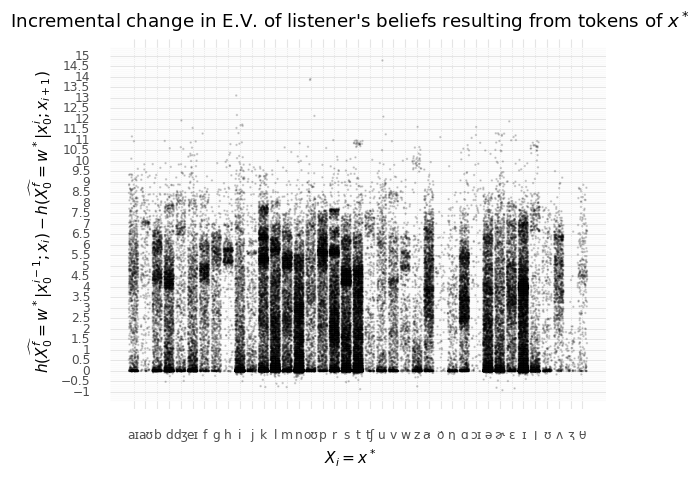

<ggplot: (8731680320197)>

In [266]:
Delta_hat_plot = plot(Delta_hat_df_noNaN, 
     x_col = 'x*', 
     y_col = 'delta', 
     title = "Incremental change in E.V. of listener's beliefs resulting from tokens of $x^*$", 
     x_label = '$X_i = x^*$', 
     y_label = '$h(\widehat{X_0^f} = w^*|x_0^{i-1};x_{i}) - h(\widehat{X_0^f} = w^*|x_0^{i};x_{i+1})$', 
     y_min = -1.0,
     y_max = 15.0,
     size=smallSize, 
     alpha=lowAlpha,
     width=largeWidth)
Delta_hat_plot

0.01

0.15

0.4

/home/AD/emeinhar/anaconda3/envs/omnibus/lib/python3.6/site-packages/plotnine/layer.py:449: UserWarning: geom_jitter : Removed 6 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


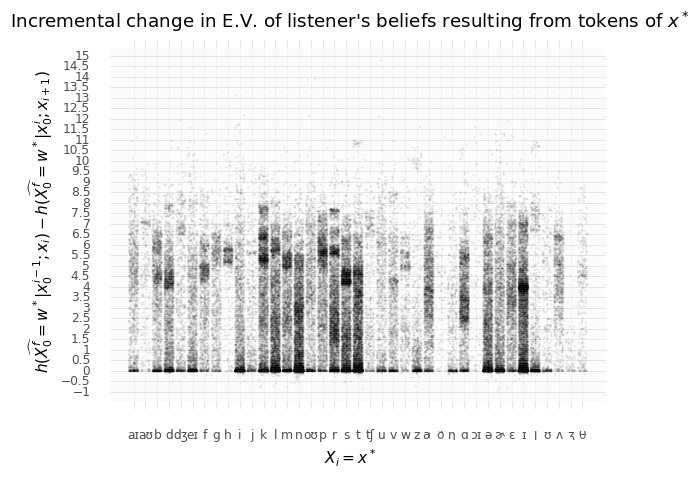

<ggplot: (-9223363305176382250)>

In [267]:
smallSize
lowAlpha
largeWidth
Delta_hat_plot_rez = plot(Delta_hat_df_noNaN, 
     x_col = 'x*', 
     y_col = 'delta', 
     title = "Incremental change in E.V. of listener's beliefs resulting from tokens of $x^*$", 
     x_label = '$X_i = x^*$', 
     y_label = '$h(\widehat{X_0^f} = w^*|x_0^{i-1};x_{i}) - h(\widehat{X_0^f} = w^*|x_0^{i};x_{i+1})$', 
     y_min = -1.0,
     y_max = 15.0,
     size=smallSize, 
     alpha=0.05,
     width=largeWidth)
Delta_hat_plot_rez

### $\bar{\Delta}(x^*) = \sum\limits_{w^*, i : w^*_i = x^*} \frac{p(w^*)}{\sum\limits_{w': \exists i.w'_i = x^*} p(w')} [h(\widehat{X_0^f} = w^*|x_0^{i-1};x_{i}) - h(\widehat{X_0^f} = w^*|x_0^{i};x_{i+1})]$

In [268]:
delta_bar_norm = {x_star:sum(pW[w_prime] for w_prime in getWordformsWithx(x_star))
                  for x_star in Xs}

def delta_bar_weight(w_star, x_star, i):
#     w_star_t = ds2t(w_star)
#     assert w_star_t[i] == x_star, "w*_i != x*: w* = {0}, x* = {1}, i = {2}".format(w_star, x_star, i)
    return pW[w_star] / delta_bar_norm[x_star]

def extractDeltaBarInfo(delta_hat_row):
    return delta_hat_row['w'], delta_hat_row['j_bar'], delta_hat_row['delta']

delta_bar = {x_star:sum(delta_bar_weight(w_star, x_star, i) * delta
                        for w_star, i, delta in set(map(extractDeltaBarInfo, Delta_hat_by_x_star[x_star])))
             for x_star in Xs}

In [269]:
delta_bar_df = pd.DataFrame(data = [{'$x^*$':x_star,
                                     '$\overline{\Delta}(x^*)$':delta_bar[x_star]}
                                    for x_star in delta_bar])
delta_bar_df.head()

$\overline{\Delta}(x^*)$ $x^*$
0                  3.540625     ɑ
1                  3.403758    oʊ
2                  3.944979    aɪ
3                  3.364301     æ
4                  3.358202     ʃ

In [270]:
delta_bar_df.sort_values('$\overline{\Delta}(x^*)$', ascending=False)

$\overline{\Delta}(x^*)$ $x^*$
18                  5.659072     h
23                  5.134824    ɔɪ
26                  4.533534     j
35                  4.366328     w
25                  4.322964     g
6                   4.297872     p
20                  4.266765     b
11                  4.016135    aʊ
2                   3.944979    aɪ
37                  3.908747     f
0                   3.540625     ɑ
16                  3.502979    dʒ
29                  3.455197     k
1                   3.403758    oʊ
3                   3.364301     æ
4                   3.358202     ʃ
15                  3.292176     ð
28                  3.123010     ɛ
38                  3.039075     m
34                  2.959246     ɪ
36                  2.956250     ʌ
13                  2.931483    eɪ
7                   2.721529     ʊ
30                  2.646440     s
19                  2.518117    tʃ
17                  2.428942     r
24                  2.320729     l
22                  2.200344     θ
10                  1.976975     ə
8                   1.874926     t
31                  1.791979     i
27                  1.717035     ɚ
32                  1.625156     n
21                  1.543794     d
5                   1.498985     v
12                  1.329824     u
9                   0.843570     ŋ
14                  0.729930     ʒ
33                  0.586955     z

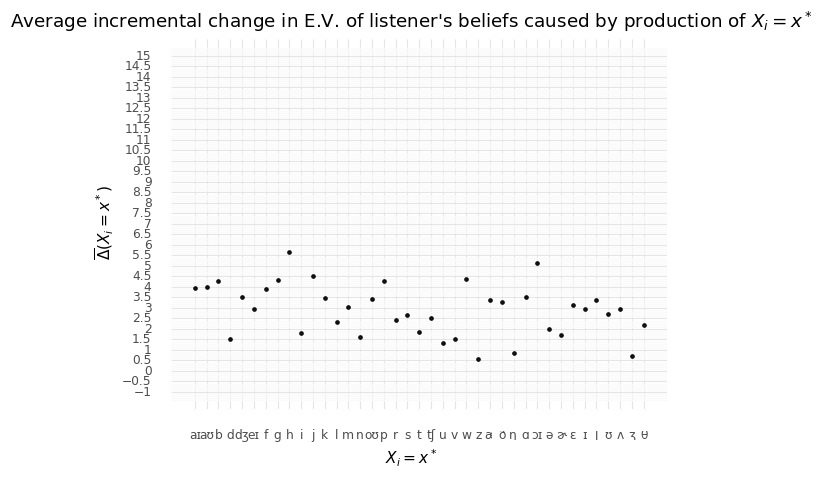

<ggplot: (-9223363305174214000)>

In [271]:
delta_bar_far = plot(delta_bar_df, 
     x_col = '$x^*$', 
     y_col = '$\overline{\Delta}(x^*)$', 
     title = "Average incremental change in E.V. of listener's beliefs caused by production of $X_i = x^*$", 
     x_label = '$X_i = x^*$', 
     y_label = '$\overline{\Delta}(X_i = x^*)$', 
     y_min = -1.0,
     y_max = 15.0,
#      size=smallSize, 
#      size=medSize,
     size=largeSize,
#      alpha=lowAlpha,
#      alpha=medAlpha,
     alpha=highAlpha,
     width=0.0)
delta_bar_far

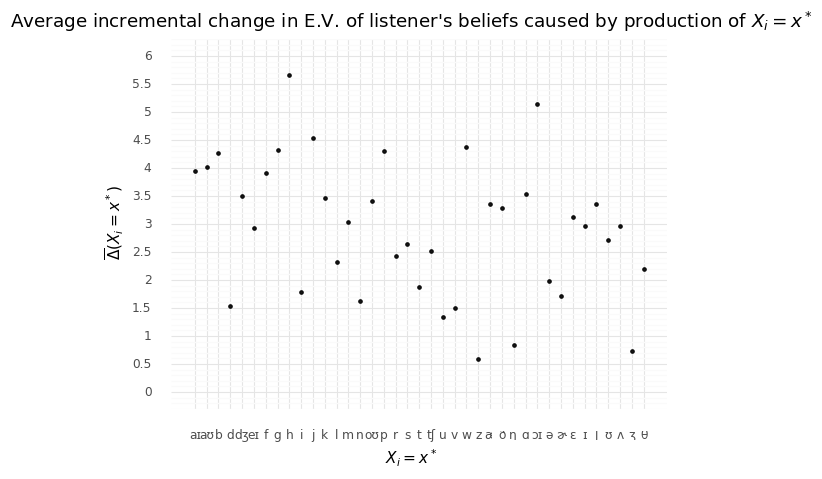

<ggplot: (-9223363305478953577)>

In [272]:
delta_bar_close = plot(delta_bar_df, 
     x_col = '$x^*$', 
     y_col = '$\overline{\Delta}(x^*)$', 
     title = "Average incremental change in E.V. of listener's beliefs caused by production of $X_i = x^*$", 
     x_label = '$X_i = x^*$', 
     y_label = '$\overline{\Delta}(X_i = x^*)$', 
     y_min = 0.0,
     y_max = 6.0,
#      size=smallSize, 
#      size=medSize,
     size=largeSize,
#      alpha=lowAlpha,
#      alpha=medAlpha,
     alpha=highAlpha,
     width=0.0)
delta_bar_close

### Incremental graph export

In [273]:
from os import getcwd
getcwd()

'/home/AD/emeinhar/c2-jn'

In [274]:
plotsToSave_Incremental = {
"hXistarX0h_by_xstar_plot":hXistarX0h_by_xstar_plot,

"ICIxstar_plot":ICIxstar_plot,

"hXhatiStarX0k_plot":hXhatiStarX0k_plot,

"HXhatiXstar_plot":HXhatiXstar_plot,

"avgHXhatiXstar_plot":avgHXhatiXstar_plot,

"hXhatiStarXiStar_close":hXhatiStarXiStar_close,

"iXhatiStarX0kXiStar_plot":iXhatiStarX0kXiStar_plot,

"IXhatiX0kXi_by_xstar_plot":IXhatiX0kXi_by_xstar_plot,

"avgPC_inc_hm_d":avgPC_inc_hm_d,
"avgPC_inc_hm_l":avgPC_inc_hm_l,

"avgCD_inc_hm_d":avgCD_inc_hm_d,
"avgCD_inc_hm_l":avgCD_inc_hm_l,

"Delta_hat_plot":Delta_hat_plot,
"Delta_hat_plot_rez":Delta_hat_plot_rez,
    
"delta_bar_far":delta_bar_far,
"delta_bar_close":delta_bar_close

}

In [275]:
export_ext = '.png'

In [276]:
for eachPlot in plotsToSave_Incremental:
    plotsToSave_Incremental[eachPlot].save(filename=eachPlot + '_incremental' + export_ext, dpi=1000)

/home/AD/emeinhar/anaconda3/envs/omnibus/lib/python3.6/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units))
/home/AD/emeinhar/anaconda3/envs/omnibus/lib/python3.6/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: hXistarX0h_by_xstar_plot_incremental.png
  warn('Filename: {}'.format(filename))
/home/AD/emeinhar/anaconda3/envs/omnibus/lib/python3.6/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units))
/home/AD/emeinhar/anaconda3/envs/omnibus/lib/python3.6/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: ICIxstar_plot_incremental.png
  warn('Filename: {}'.format(filename))
/home/AD/emeinhar/anaconda3/envs/omnibus/lib/python3.6/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units))
/home/AD/emeinhar/anaconda3/envs/omnibus/lib/python3.6/site-packages/plotnine/ggplot.py:707: UserWarning

/home/AD/emeinhar/anaconda3/envs/omnibus/lib/python3.6/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units))
/home/AD/emeinhar/anaconda3/envs/omnibus/lib/python3.6/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: Delta_hat_plot_incremental.png
  warn('Filename: {}'.format(filename))
/home/AD/emeinhar/anaconda3/envs/omnibus/lib/python3.6/site-packages/plotnine/layer.py:449: UserWarning: geom_jitter : Removed 6 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
/home/AD/emeinhar/anaconda3/envs/omnibus/lib/python3.6/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units))
/home/AD/emeinhar/anaconda3/envs/omnibus/lib/python3.6/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: Delta_hat_plot_rez_incremental.png
  warn('Filename: {}'.format(filename))
/home/AD/emeinhar/anaconda3/envs/omnibus/lib/python3.6/site-packages/plotn

limit_output extension: Maximum message size of 10000 exceeded with 10311 characters

In [278]:
%ls *_incremental*

OSError: [Errno 12] Cannot allocate memory

In [279]:
plotsToPDF_Incremental = [
hXistarX0h_by_xstar_plot,

ICIxstar_plot,

hXhatiStarX0k_plot,

HXhatiXstar_plot,

avgHXhatiXstar_plot,

hXhatiStarXiStar_close,

iXhatiStarX0kXiStar_plot,

IXhatiX0kXi_by_xstar_plot,

avgPC_inc_hm_d,
avgPC_inc_hm_l,

avgCD_inc_hm_d,
avgCD_inc_hm_l,

Delta_hat_plot,
Delta_hat_plot_rez,

delta_bar_far,
delta_bar_close
]

In [280]:
save_as_pdf_pages(plotsToPDF_Incremental, filename='Incremental plots.pdf', dpi=1000)

/home/AD/emeinhar/anaconda3/envs/omnibus/lib/python3.6/site-packages/plotnine/ggplot.py:826: UserWarning: Filename: Incremental plots.pdf
  warn('Filename: {}'.format(filename))
/home/AD/emeinhar/anaconda3/envs/omnibus/lib/python3.6/site-packages/plotnine/layer.py:449: UserWarning: geom_jitter : Removed 3 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
/home/AD/emeinhar/anaconda3/envs/omnibus/lib/python3.6/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or
/home/AD/emeinhar/anaconda3/envs/omnibus/lib/python3.6/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or
/home/AD/emeinhar/anaconda3/envs/omnibus/lib/python3.6/site-packages/mizani/bounds.py:352: RuntimeWarning: invalid value encountered in less
  outside = (x < range[0]) | (x >

In [281]:
%pwd

'/home/AD/emeinhar/c2-jn'

### Total context overhead

Recall/note that 
 - $O :: (s,\bar{l}, n)$
 - $O_{:,:,c}$ is the sequence of one-hot vectors for the $c$th wordform indicating what the symbols in it are.
 - $O_{:,j,c}$ is a one-hot vector indicating what the $j$th symbol of the $c$th wordform is (or if it doesn't have one).
 - $O_{i,j,c} = 1$ iff the $j$th symbol $X_j$ of the $c$th wordform $x_0^f$ is $x_i$.
 - $O_{:,j,:}$ is a stack of $n$ one-hot vectors indicating what the $j$th symbol is (or if there is no such symbol) for all $n$ wordforms.
 - $O_{i,j,:}$ is a length $n$ vector indicating for each of the $n$ wordforms $\{w_c\}$ whether $w_c$'s $j$th symbol is $x_i$ or not.
 - $O_{i,:,:}$ is a $\bar{l} \times n$ matrix indicating for each word $c$ (i.e. each column) whether its $j$th symbol (i.e. each row) is symbol $x_i$.
 - $O_{i,:,c}$ is a length $\bar{l}$ vector indicating which of wordform $c$'s indices are symbol $x_i$.

In [296]:
O.shape

(41, 18, 12565)

In [297]:
#3.36s [kotoba/python3]
O_dicts = []
for i in np.arange(O.shape[0]):
    for j in np.arange(O.shape[1]):
        for c in np.arange(O.shape[2]):
            if O[i,j,c] == 1:
                O_dicts.append({'i':i,
                                'j_bar':j,
                                'j':j,
                                'c':c,
                                'x*':Xslex_idxmap[i],
                                'w':W_idxMap[c]})

In [299]:
z_occurrences = {FrozenDict(each) for each in O_dicts if each['x*'] == 'z'}
len(z_occurrences)
list(z_occurrences)[:5]

785

[FrozenDict({'c': 1360, 'i': 24, 'x*': 'z', 'j_bar': 3, 'w': '⋊.d.ɪ.z.ɚ.v.⋉', 'j': 3}),
 FrozenDict({'c': 9927, 'i': 24, 'x*': 'z', 'j_bar': 3, 'w': '⋊.w.ə.z.⋉', 'j': 3}),
 FrozenDict({'c': 7459, 'i': 24, 'x*': 'z', 'j_bar': 3, 'w': '⋊.r.ɪ.z.u.m.⋉', 'j': 3}),
 FrozenDict({'c': 460, 'i': 24, 'x*': 'z', 'j_bar': 3, 'w': '⋊.b.æ.z.l.⋉', 'j': 3}),
 FrozenDict({'c': 193, 'i': 24, 'x*': 'z', 'j_bar': 4, 'w': '⋊.b.l.eɪ.z.ɚ.⋉', 'j': 4})]

In [300]:
def retrieveRows(predicate):
    return {FrozenDict(each) for each in O_dicts if predicate(each)}

In [324]:
def indicesOfWwhereXiIs_calc(W, x_star):
    rows = retrieveRows(lambda row: row['w'] == W and row['x*'] == x_star)
    return {row['j'] for row in rows}

# indicesOfWwhereXiIs = {x_star:{w:indicesOfWwhereXiIs_calc(w, x_star)
#                                for w in getWordformsWithx(x_star)}
#                        for x_star in tqdm(Xs_lex)}

def parallelCalc(x_star):
    return (x_star, {w:indicesOfWwhereXiIs_calc(w, x_star) for w in getWordformsWithx(x_star)})

# takes ~3m [kotoba/python3]
indicesOfWwhereXiIs = dict(Parallel(n_jobs=-1, backend='multiprocessing', verbose=50)(delayed(parallelCalc)(x_star)
                          for x_star in Xs_lex))

[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   22.3s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   22.7s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   23.0s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   24.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   27.4s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   34.3s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:   38.8s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   39.5s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:   44.5s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   45.8s
[Parallel(n_jobs=-1)]: Done  15 tasks      |

In [329]:
indicesOfWwhereXiIs['z']['⋊.d.ɪ.z.ɚ.v.⋉']

{3}

In [491]:
pJ_W = {w:{j:1.0/len(ds2t(w)) if j < len(ds2t(w)) else 0.0
                for j in range(l_bar)}
             for w in Ws}
randW
# pJ_W[randW]
areNormalized(pJ_W)
pJ_W = condDistsAsProbDists(pJ_W)
pJ_W[randW]

'⋊.r.æ.ð.ɚ.⋉'

True

0: 0.16666666666666669
1: 0.16666666666666669
2: 0.16666666666666669
3: 0.16666666666666669
4: 0.16666666666666669
5: 0.16666666666666669
6: 0.0
7: 0.0
8: 0.0
9: 0.0
10: 0.0
11: 0.0
12: 0.0
13: 0.0
14: 0.0
15: 0.0
16: 0.0
17: 0.0

In [492]:
pJW = {(j,w):pW[w]*pJ_W[w][j]
       for j,w in product(range(l_bar), Ws)}
isNormalized(pJW)
pJW = ProbDist(pJW)

True

In [493]:
pJ = {j:sum(pJW[(j_prime,w)] for j_prime, w in pJW
            if j_prime == j)
      for j in range(l_bar)}
isNormalized(pJ)
pJ = ProbDist(pJ)
pJ

True

0: 0.20311152676593114
1: 0.20311152676593114
2: 0.20311152676593114
3: 0.19814410313825054
4: 0.10488443054410906
5: 0.04386188775653968
6: 0.020361008913728457
7: 0.011265698657772381
8: 0.006143973582464628
9: 0.003244611162901299
10: 0.001736122027198795
11: 0.0007047628358460063
12: 0.00021811898550585623
13: 6.967987601354815e-05
14: 2.126789650802433e-05
15: 9.062637411172401e-06
16: 6.506873146430866e-07
17: 4.100064247681646e-08

In [494]:
def pX_JW_calc(j,w):
    if pJW[(j,w)] == 0.0:
        return {x_star:0.0 for x_star in Xs_lex}
    w_t = ds2t(w)
    actual_x_j = w_t[j]
    return {x_star:1.0 if x_star == actual_x_j else 0.0
            for x_star in Xs_lex}

pX_JW = {(j,w):pX_JW_calc(j,w)
              for j,w in pJW}

randW
pX_JW[1, randW]

'⋊.r.æ.ð.ɚ.⋉'

{'ɑ': 0.0,
 'oʊ': 0.0,
 'aɪ': 0.0,
 '⋊': 0.0,
 'æ': 0.0,
 'ʃ': 0.0,
 'v': 0.0,
 'p': 0.0,
 'ʊ': 0.0,
 't': 0.0,
 '⋉': 0.0,
 'ŋ': 0.0,
 'ə': 0.0,
 'aʊ': 0.0,
 'u': 0.0,
 'ʒ': 0.0,
 'eɪ': 0.0,
 'ð': 0.0,
 'dʒ': 0.0,
 'r': 1.0,
 'h': 0.0,
 'tʃ': 0.0,
 'b': 0.0,
 'd': 0.0,
 'θ': 0.0,
 'ɔɪ': 0.0,
 'l': 0.0,
 'g': 0.0,
 'j': 0.0,
 'ɚ': 0.0,
 'ɛ': 0.0,
 'k': 0.0,
 's': 0.0,
 'i': 0.0,
 'n': 0.0,
 'z': 0.0,
 'ɪ': 0.0,
 'w': 0.0,
 'ʌ': 0.0,
 'f': 0.0,
 'm': 0.0}

Altogether then, we can define a joint distribution $p(X,J,W) = p(X|J,W)p(J|W)p(W)$ and recover
 - $p(X = x^*) = p(X_J = x^*) = \sum\limits_{j,w} p(x^*, j, w) = \sum\limits_{j,w} p(x^*|j,w)p(j,w)$.
 - Both component conditional distributions of $p(X_J, J)$:
   - $p(X_J = x^*|J = j) = \sum\limits_w p(X_J = x^*, w|J = j) = \sum\limits_w p(X_J = x^*|w, j) p(w|j)$
   - $p(J = j|X_J = x^*) = \sum\limits_w p(J = j, w|X_J = x^*) = \sum\limits_w p(j|w, x^*) p(w|x^*)$
 - $p(X_J = x^*|W = w) = \sum\limits_j p(X_J = x^*, J = j|W = w) = \sum\limits_j p(X_j = x^*|J=j,W=w)p(J=j|W=w)$
 - $p(W = w|X_J = x^*) = \frac{p(X_J = x^*|W = w)p(W = w)}{p(X_J = x^*)}$

In [499]:
list(pJW.keys())[:5]

[(0, '⋊.k.ɑ.d.l.⋉'),
 (0, '⋊.s.n.ɪ.p.⋉'),
 (0, '⋊.s.æ.p.i.⋉'),
 (0, '⋊.k.i.n.⋉'),
 (0, '⋊.ɪ.m.p.ʌ.l.s.⋉')]

In [497]:
pXstar = {x:sum(pJW[(j,w)] * pX_JW[(j,w)][x]
                for j, w in pJW)
          x in Xs_lex}
isNormalized(pXstar)
pXstar = ProbDist(pXstar)

pXstar_J = {j:{x:sum()
               for x in Xs_lex}
            for j in range(l_bar)}
areNormalized(pXstar_J)
pXstar_J = condDistsAsProbDists(pXstar_J)

NameError: name 'pXstar' is not defined

### $h(\hat{X}_i = x^* | x_0 \ldots X_i = x^* \ldots x_f)$

In [294]:
hXhatiX0f = {x0f:{i:{x_prime:h_prime( pXhatiX0f[x0f][i][x_prime] )
                     for x_prime in Xs_lex}
                  for i in range(l_bar)}
             for x0f in Ws}

In [330]:
indicesOfWwhereXiIs['ɑ']['⋊.f.i.ɑ.n.s.eɪ.⋉']

{3}

In [331]:
{FrozenDict(each) for each in O_dicts if each['x*'] == 'ɑ' and each['w'] == '⋊.f.i.ɑ.n.s.eɪ.⋉'}

{FrozenDict({'c': 1680, 'i': 28, 'x*': 'ɑ', 'j_bar': 3, 'w': '⋊.f.i.ɑ.n.s.eɪ.⋉', 'j': 3})}

In [333]:
hXhatiprimeX0f_by_xstar = {x_star:{x0f:{i:{x_prime:hXhatiX0f[x0f][i][x_prime]
                                           for x_prime in Xs}
                                        for i in indicesOfWwhereXiIs[x_star][x0f]}
                                   for x0f in getWordformsWithx(x_star)}
                          for x_star in Xs}
hXhatiprimeX0f_by_xstar['z']['⋊.d.ɪ.z.ɚ.v.⋉']

{3: {'ɑ': -0.0,
  'oʊ': -0.0,
  'aɪ': -0.0,
  'æ': -0.0,
  'ʃ': -0.0,
  'v': -0.0,
  'p': -0.0,
  'ʊ': -0.0,
  't': -0.0,
  'ŋ': -0.0,
  'ə': -0.0,
  'aʊ': -0.0,
  'u': -0.0,
  'eɪ': -0.0,
  'ʒ': -0.0,
  'ð': -0.0,
  'dʒ': -0.0,
  'r': -0.0,
  'h': -0.0,
  'tʃ': -0.0,
  'b': -0.0,
  'd': -0.0,
  'θ': -0.0,
  'ɔɪ': -0.0,
  'l': -0.0,
  'g': -0.0,
  'j': -0.0,
  'ɚ': -0.0,
  'ɛ': -0.0,
  'k': -0.0,
  's': 8.871961117428766,
  'i': -0.0,
  'n': -0.0,
  'z': 0.0030825633575886644,
  'ɪ': -0.0,
  'w': -0.0,
  'ʌ': -0.0,
  'f': -0.0,
  'm': -0.0}}

In [336]:
hXhatiprimeX0f_by_xstar_df = pd.DataFrame(data=[{'$x^*$':x_star,
                                                 '$i$':i,
                                                 '$x_0^{*f}$':x0f,
                                                 '$h(\widehat{X}_i = x^*|x_0 \ldots X_i = x^* \ldots x_f$':hXhatiprimeX0f_by_xstar[x_star][x0f][i][x_star]}
                                                for x_star in hXhatiprimeX0f_by_xstar 
                                                    for x0f in hXhatiprimeX0f_by_xstar[x_star]
                                                       for i in hXhatiprimeX0f_by_xstar[x_star][x0f]])
hXhatiprimeX0f_by_xstar_df.head()

$h(\widehat{X}_i = x^*|x_0 \ldots X_i = x^* \ldots x_f$  $i$ $x^*$  \
0                                          -0.000000          3     ɑ   
1                                          -0.000000          4     ɑ   
2                                           2.156733          2     ɑ   
3                                           1.109962          2     ɑ   
4                                           0.000184          2     ɑ   

            $x_0^{*f}$  
0     ⋊.f.i.ɑ.n.s.eɪ.⋉  
1  ⋊.d.ɪ.s.ɑ.n.ɪ.s.t.⋉  
2          ⋊.k.ɑ.d.l.⋉  
3            ⋊.s.ɑ.d.⋉  
4  ⋊.k.ɑ.n.t.r.æ.k.t.⋉

In [337]:
hXhatiprimeX0f_by_xstar_df.sort_values('$h(\widehat{X}_i = x^*|x_0 \ldots X_i = x^* \ldots x_f$', ascending=False)

$h(\widehat{X}_i = x^*|x_0 \ldots X_i = x^* \ldots x_f$  $i$ $x^*$  \
8293                                            9.814937          1     v   
29468                                           8.797531          1     r   
35030                                           7.729706          1     θ   
8943                                            7.509939          1     v   
35018                                           7.199865          3     θ   
1044                                            7.176518          2     ɑ   
9125                                            6.451389          1     v   
30198                                           6.435413          1    tʃ   
34999                                           6.244446          1     θ   
1990                                            5.878139          1     ɑ   
24843                                           5.845817          3     ð   
70951                                           5.803460          1     f   
35075                                           5.507851          1     θ   
43535                                           5.431937          2     ɛ   
34594                                           5.394164          2     d   
32779                                           5.373073          1     d   
33093                                           5.072784          3     d   
46947                                           5.064904          1     k   
32732                                           5.045267          4     d   
24849                                           4.954658          3     ð   
9434                                            4.859712          1     p   
32744                                           4.772905          1     d   
34301                                           4.701505          4     d   
24795                                           4.662920          3     ð   
61830                                           4.653838          1     z   
42202                                           4.616405          3     ɚ   
8615                                            4.606797          1     v   
70521                                           4.562680          2     ʌ   
71055                                           4.549608          3     f   
48176                                           4.453209          1     k   
...                                                  ...        ...   ...   
30952                                          -0.000000          6     b   
30953                                          -0.000000          8     b   
30956                                          -0.000000          4     b   
30911                                          -0.000000          9     b   
30906                                          -0.000000          5     b   
30866                                          -0.000000          6     b   
30887                                          -0.000000          1     b   
30868                                          -0.000000          1     b   
30869                                          -0.000000          3     b   
30870                                          -0.000000         12     b   
30872                                          -0.000000         11     b   
30877                                          -0.000000          7     b   
30878                                          -0.000000          2     b   
30879                                          -0.000000         10     b   
30880                                          -0.000000          3     b   
30881                                          -0.000000          5     b   
30883                                          -0.000000          4     b   
30892                                          -0.000000          3     b   
30905                                          -0.000000          5     b   
30894                                          -0.000000          2     b   
308

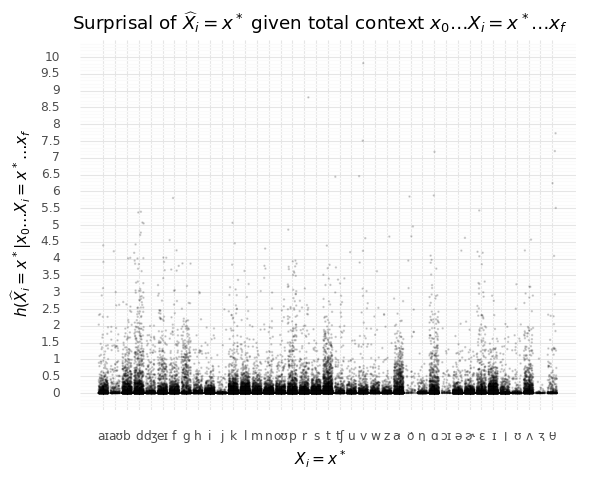

<ggplot: (8731678238223)>

In [339]:
hXhatiprimeX0f_far = plot(hXhatiprimeX0f_by_xstar_df, 
     x_col = '$x^*$', 
     y_col = '$h(\widehat{X}_i = x^*|x_0 \ldots X_i = x^* \ldots x_f$', 
     title = "Surprisal of $\widehat{X}_i = x^*$ given total context $x_0 \ldots X_i = x^* \ldots x_f$", 
     x_label = '$X_i = x^*$', 
     y_label = '$h(\widehat{X}_i = x^*|x_0 \ldots X_i = x^* \ldots x_f$', 
     y_min = 0.0,
     y_max = 10.0,
     size=smallSize, 
#      size=medSize,
#      size=largeSize,
     alpha=lowAlpha,
#      alpha=medAlpha,
#      alpha=highAlpha,
     width=largeWidth)
hXhatiprimeX0f_far

0.15

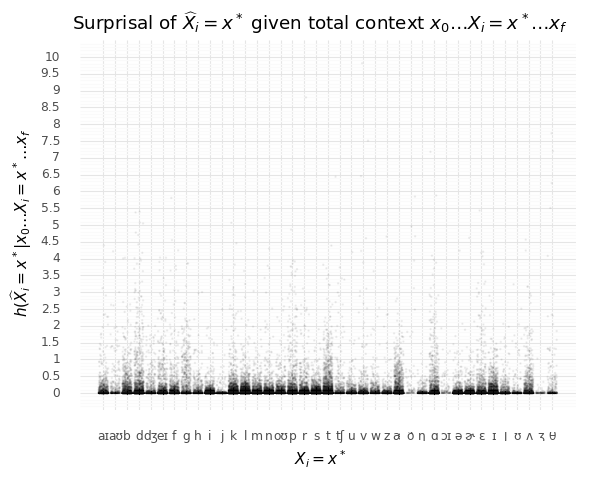

<ggplot: (-9223363305176380777)>

In [342]:
lowAlpha
hXhatiprimeX0f_close = plot(hXhatiprimeX0f_by_xstar_df, 
     x_col = '$x^*$', 
     y_col = '$h(\widehat{X}_i = x^*|x_0 \ldots X_i = x^* \ldots x_f$', 
     title = "Surprisal of $\widehat{X}_i = x^*$ given total context $x_0 \ldots X_i = x^* \ldots x_f$", 
     x_label = '$X_i = x^*$', 
     y_label = '$h(\widehat{X}_i = x^*|x_0 \ldots X_i = x^* \ldots x_f$', 
     y_min = 0.0,
     y_max = 10.0,
     size=smallSize, 
#      size=medSize,
#      size=largeSize,
     alpha=0.05,
#      alpha=medAlpha,
#      alpha=highAlpha,
     width=largeWidth)
hXhatiprimeX0f_close

### $H(\widehat{X}_i | x_0 \ldots X_i = x^* \ldots x_f)$

$H(\widehat{X}_i | x_0 \ldots X_i = x^* \ldots x_f) = \sum\limits_{x'} p(\widehat{X}_i = x'| x_0 \ldots X_i = x^* \ldots x_f) h(\widehat{X}_i = x'|x_0 \ldots X_i = x^* \ldots x_f)$

In [444]:
HXhatiprimeX0f_by_xstar = {x_star:{x0f:{i:sum(pXhatiX0f[x0f][i][x_prime] * hXhatiX0f[x0f][i][x_prime]
                                              for x_prime in Xs)
                                        for i in indicesOfWwhereXiIs[x_star][x0f]}
                                   for x0f in getWordformsWithx(x_star)}
                           for x_star in Xs}
HXhatiprimeX0f_by_xstar['z']['⋊.d.ɪ.z.ɚ.v.⋉'][3]
HXhatiprimeX0f_by_xstar['z']['⋊.d.ɪ.z.ɚ.v.⋉']
HXhatiprimeX0f_by_xstar['z']

0.022012200589809947

{3: 0.022012200589809947}

{'⋊.n.aɪ.v.z.⋉': {4: 0.34450735725013815},
 '⋊.k.ɑ.z.m.ə.n.ɑ.t.⋉': {3: 0.0},
 '⋊.l.ɛ.n.z.⋉': {4: 0.63877317572961123},
 '⋊.g.r.ɪ.z.l.i.⋉': {4: 0.00151986033303476},
 '⋊.aɪ.s.ə.l.eɪ.ʃ.ɪ.n.ɪ.z.m.⋉': {10: 0.0},
 '⋊.k.ʌ.z.n.⋉': {3: 0.33031769734342448},
 '⋊.k.ə.n.f.j.u.z.⋉': {7: 0.0},
 '⋊.t.oʊ.ɚ.d.z.⋉': {5: 0.0},
 '⋊.æ.n.ə.l.aɪ.z.⋉': {6: 0.0070130349198703167},
 '⋊.ɪ.g.z.æ.m.ə.n.⋉': {3: 0.0},
 '⋊.p.eɪ.t.r.i.ə.t.ɪ.z.m.⋉': {9: 0.0},
 '⋊.j.ʊ.r.z.⋉': {4: 0.10777127407339998},
 '⋊.b.l.ɪ.z.ɚ.d.⋉': {4: 0.0},
 '⋊.s.m.ɪ.ð.ɚ.i.n.z.⋉': {8: 0.0},
 '⋊.n.oʊ.z.⋉': {3: 0.21193884019491943},
 '⋊.k.ɑ.m.p.ə.z.ɪ.ʃ.ɪ.n.⋉': {6: 0.19001879305667044},
 '⋊.p.r.ə.p.oʊ.z.⋉': {6: 0.0014966693876508894},
 '⋊.m.ɪ.ʃ.u.z.⋉': {5: 0.013325578346989574},
 '⋊.r.ɪ.z.aɪ.n.⋉': {3: 0.14385305656325859},
 '⋊.dʒ.ɛ.n.ɚ.l.ə.z.eɪ.ʃ.ɪ.n.⋉': {7: 0.0},
 '⋊.f.oʊ.r.k.l.oʊ.z.⋉': {7: 0.0},
 '⋊.b.æ.z.l.⋉': {3: 0.34551283924489279},
 '⋊.p.ə.z.ɛ.s.⋉': {3: 0.044264847595410224},
 '⋊.æ.d.v.ɚ.t.aɪ.z.⋉': {7: 0.0},
 '⋊.æ.f.r.ə.d.i.z.i.æ.k.⋉': {7: 0

limit_output extension: Maximum message size of 10000 exceeded with 31181 characters

In [445]:
HXhatiprimeX0f_by_xstar_df = pd.DataFrame(data=[{'$x^*$':x_star,
                                                 '$i$':i,
                                                 '$x_0^{*f}$':x0f,
                                                 '$H(\widehat{X}_i|x_0 \ldots X_i = x^* \ldots x_f$':HXhatiprimeX0f_by_xstar[x_star][x0f][i]}
                                                for x_star in HXhatiprimeX0f_by_xstar 
                                                    for x0f in HXhatiprimeX0f_by_xstar[x_star]
                                                       for i in HXhatiprimeX0f_by_xstar[x_star][x0f]])
HXhatiprimeX0f_by_xstar_df.head()

$H(\widehat{X}_i|x_0 \ldots X_i = x^* \ldots x_f$  $i$ $x^*$  \
0                                           0.000000    3     ɑ   
1                                           0.000000    4     ɑ   
2                                           1.478060    2     ɑ   
3                                           2.002775    2     ɑ   
4                                           0.001836    2     ɑ   

            $x_0^{*f}$  
0     ⋊.f.i.ɑ.n.s.eɪ.⋉  
1  ⋊.d.ɪ.s.ɑ.n.ɪ.s.t.⋉  
2          ⋊.k.ɑ.d.l.⋉  
3            ⋊.s.ɑ.d.⋉  
4  ⋊.k.ɑ.n.t.r.æ.k.t.⋉

In [447]:
HXhatiprimeX0f_by_xstar_df.sort_values('$H(\widehat{X}_i|x_0 \ldots X_i = x^* \ldots x_f$', ascending=False)

$H(\widehat{X}_i|x_0 \ldots X_i = x^* \ldots x_f$  $i$ $x^*$  \
24579                                           3.649114    1    eɪ   
30522                                           3.418597    1    tʃ   
39820                                           3.296052    2     g   
28586                                           3.283945    2     r   
39634                                           3.268673    1     g   
62075                                           3.254430    1     z   
15993                                           3.197322    1     t   
22019                                           3.182384    1    aʊ   
3932                                            3.171529    1    aɪ   
30336                                           3.146989    1    tʃ   
22029                                           3.107978    2    aʊ   
33415                                           3.084346    1     d   
40442                                           3.077750    3     g   
40418                                           3.071472    1     g   
40630                                           3.057332    1     j   
72073                                           3.045012    1     f   
25090                                           3.042402    1    dʒ   
46107                                           3.029119    2     k   
27095                                           3.021073    1     r   
40452                                           3.018285    3     g   
39353                                           3.014676    2     l   
8128                                            3.011669    1     v   
7046                                            2.970169    2     ʃ   
11573                                           2.959450    1     p   
67488                                           2.950396    1     ɪ   
34461                                           2.949182    1     d   
74592                                           2.948472    1     m   
24960                                           2.946673    1    dʒ   
24990                                           2.939212    1    dʒ   
8384                                            2.934033    1     v   
...                                                  ...  ...   ...   
30952                                           0.000000    6     b   
30953                                           0.000000    8     b   
30956                                           0.000000    4     b   
30911                                           0.000000    9     b   
30906                                           0.000000    5     b   
30866                                           0.000000    6     b   
30887                                           0.000000    1     b   
30868                                           0.000000    1     b   
30869                                           0.000000    3     b   
30870                                           0.000000   12     b   
30872                                           0.000000   11     b   
30877                                           0.000000    7     b   
30878                                           0.000000    2     b   
30879                                           0.000000   10     b   
30880                                           0.000000    3     b   
30881                                           0.000000    5     b   
30883                                           0.000000    4     b   
30892                                           0.000000    3     b   
30905                                           0.000000    5     b   
30894                                           0.000000    2     b   
30895                                           0.000000    3     b   
30896                                           0.000000    4     b   
30897                                           0.000000    4     b   
30898                                           0.000000    1     b   
30899                          

0.15

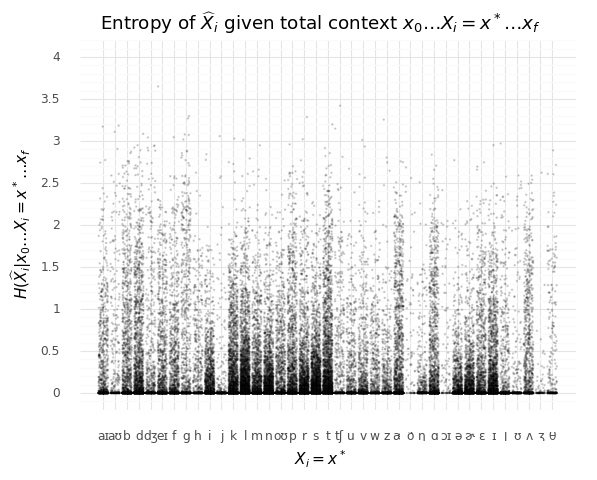

<ggplot: (8731353797489)>

In [452]:
lowAlpha
HXhatiprimeX0f_far = plot(HXhatiprimeX0f_by_xstar_df, 
     x_col = '$x^*$', 
     y_col = '$H(\widehat{X}_i|x_0 \ldots X_i = x^* \ldots x_f$', 
     title = "Entropy of $\widehat{X}_i$ given total context $x_0 \ldots X_i = x^* \ldots x_f$", 
     x_label = '$X_i = x^*$', 
     y_label = '$H(\widehat{X}_i|x_0 \ldots X_i = x^* \ldots x_f$', 
     y_min = 0.0,
     y_max = 4.0,
     size=smallSize, 
#      size=medSize,
#      size=largeSize,
#      alpha=0.05,
     alpha=lowAlpha,
#      alpha=medAlpha,
#      alpha=highAlpha,
     width=largeWidth)
HXhatiprimeX0f_far

0.15

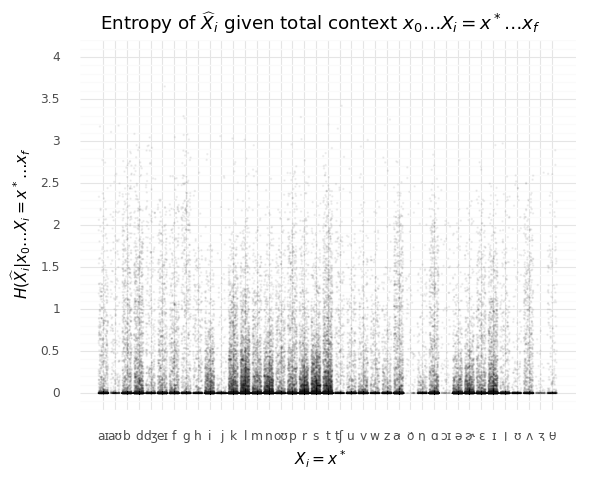

<ggplot: (8731355109373)>

In [451]:
lowAlpha
HXhatiprimeX0f_close = plot(HXhatiprimeX0f_by_xstar_df, 
     x_col = '$x^*$', 
     y_col = '$H(\widehat{X}_i|x_0 \ldots X_i = x^* \ldots x_f$', 
     title = "Entropy of $\widehat{X}_i$ given total context $x_0 \ldots X_i = x^* \ldots x_f$", 
     x_label = '$X_i = x^*$', 
     y_label = '$H(\widehat{X}_i|x_0 \ldots X_i = x^* \ldots x_f$', 
     y_min = 0.0,
     y_max = 4.0,
     size=smallSize, 
#      size=medSize,
#      size=largeSize,
     alpha=0.05,
#      alpha=lowAlpha,
#      alpha=medAlpha,
#      alpha=highAlpha,
     width=largeWidth)
HXhatiprimeX0f_close

### $H(\hat{X}_i | X_0 \ldots X_i = x^* \ldots X_f)$

$H(\hat{X}_i | X_0 \ldots X_i = x^* \ldots X_f) = \sum\limits_{x_0 \ldots X_i = x^* \ldots x_f} p(x_0 \ldots x_{i-1}, x_{i+1} \ldots x_f| X_i = x^*) h(\widehat{X}_i = x^*|x_0 \ldots X_i = x^* \ldots x_f)$, where

$p(x_0 \ldots x_{i-1}, x_{i+1} \ldots x_f| X_i = x^*) \overset{?}{=} \frac{p(x_0 \ldots x_{i-1}, X_i = x^*, x_{i+1} \ldots x_f)}{\sum\limits_{x'_0 \ldots x'_{i-1}, X'_i = x^*, x'_{i+1} \ldots x'_f} p(x'_0 \ldots x'_{i-1}, X'_i = x^*, x'_{i+1} \ldots x'_f)}$

Supposing we do this, the denominator should represent $p(X_i = x^*)$, where $i$ is *not* constant. If this really represents a probability, then $\sum\limits_{x'} p(X_i = x')$ should be 1. 

It is not.

In [346]:
pSomeXiIsXstar = {x_star:sum(pW[w] for w in getWordformsWithx(x_star))
                  for x_star in Xs}
isNormalized(pSomeXiIsXstar)
norm(pSomeXiIsXstar)

False

3.208814617659165

**Take 2:**

$p(X_J = x^*| J = i)$ seems very concrete and calculable:
 - $p(X_J = x^* | J = 3) = $

In [350]:
len(wordsWhereXiIs('z',3))
list(wordsWhereXiIs('z',3))[:10]
sum(pW[w] for w in wordsWhereXiIs('z',3))

244

['⋊.r.ɛ.z.ɚ.ɛ.k.t.⋉',
 '⋊.d.ɪ.z.æ.s.t.ɚ.⋉',
 '⋊.k.ɑ.z.m.ə.n.ɑ.t.⋉',
 '⋊.r.ɪ.z.aɪ.n.d.⋉',
 '⋊.ɑ.d.z.⋉',
 '⋊.k.ʌ.z.n.⋉',
 '⋊.ɪ.g.z.æ.m.ə.n.⋉',
 '⋊.ɪ.g.z.i.m.ə.⋉',
 '⋊.w.aɪ.z.⋉',
 '⋊.i.v.z.⋉']

0.03285523448649626

Starting from this we should be able to marginalize over possible values of $J$:
 - $p(X_J = x^*) = \sum\limits_{i \in [0, \bar{l}]} p(X_J = x^* | J = i) p(J = i)$
 
What is $p(J = i)$? *Not* crystal clear. Also $p(X_J = x^* | J = i)$ is not as straightforward as I thought it was above:

In [433]:
pXJ = {j:{x:sum(pW[w] for w in wordsWhereXiIs(x, j))
          for x in Xs_lex}
       for j in range(l_bar)}
areNormalized(pXJ)
norms(pXJ) # <- BAD.
# pXJ = condDistsAsProbDists(pXJ) # <- NO.

False

[0.9999999999999993,
 1.0000000000000009,
 1.0000000000000004,
 0.9850977291169585,
 0.6120590387403931,
 0.30694632480254397,
 0.1659410517456778,
 0.10227387995398557,
 0.06130007935152371,
 0.03520581757545343,
 0.020120926218428488,
 0.0087759751135478,
 0.0029362489094659954,
 0.0010065404860659906,
 0.0003287727729886572,
 0.0001456938865358783,
 1.1102684991409292e-05,
 7.380115645826966e-07]

**An aside on the interpretation of $p(J)$** 

Hypothesis: The 'real' relevant/helpful distribution here is $p(W,J)$. $p(W)$ clearly comes from the lexicon prior, and the sample space for $p(J)$ is $0 \ldots \bar{l}$. For a specific word $w$, what is $p(J|w)$? 

Well, $\forall j > |w|$, it seems necessary to say that $p(j|w) = 0$. For the rest, a uniform distribution seems like the only reasonable choice.

In [469]:
randW
len(ds2t(randW))
ds2t(randW)[ len(ds2t(randW)) - 1 ]

'⋊.r.æ.ð.ɚ.⋉'

6

'⋉'

In [474]:
pJ_givenW = {w:{j:1.0/len(ds2t(w)) if j < len(ds2t(w)) else 0.0
                for j in range(l_bar)}
             for w in Ws}
randW
# pJ_givenW[randW]
areNormalized(pJ_givenW)
pJ_givenW = condDistsAsProbDists(pJ_givenW)
pJ_givenW[randW]

'⋊.r.æ.ð.ɚ.⋉'

True

0: 0.16666666666666669
1: 0.16666666666666669
2: 0.16666666666666669
3: 0.16666666666666669
4: 0.16666666666666669
5: 0.16666666666666669
6: 0.0
7: 0.0
8: 0.0
9: 0.0
10: 0.0
11: 0.0
12: 0.0
13: 0.0
14: 0.0
15: 0.0
16: 0.0
17: 0.0

In [477]:
pJW = {(j,w):pW[w]*pJ_givenW[w][j]
       for j,w in product(range(l_bar), Ws)}
isNormalized(pJW)
pJW = ProbDist(pJW)

True

In [479]:
pJ = {j:sum(pJW[(j_prime,w)] for j_prime, w in pJW
            if j_prime == j)
      for j in range(l_bar)}
isNormalized(pJ)
pJ = ProbDist(pJ)
pJ

True

0: 0.20311152676593114
1: 0.20311152676593114
2: 0.20311152676593114
3: 0.19814410313825054
4: 0.10488443054410906
5: 0.04386188775653968
6: 0.020361008913728457
7: 0.011265698657772381
8: 0.006143973582464628
9: 0.003244611162901299
10: 0.001736122027198795
11: 0.0007047628358460063
12: 0.00021811898550585623
13: 6.967987601354815e-05
14: 2.126789650802433e-05
15: 9.062637411172401e-06
16: 6.506873146430866e-07
17: 4.100064247681646e-08

$\forall j,w$ such that $p(j,w) > 0$, $p(X_J = x^*|j, w)$ is $1.0$ for just that $x^*$ where $X_j$ of $w$ is, in fact, $x^*$:

In [486]:
def pX_givenJW_calc(j,w):
    if pJW[(j,w)] == 0.0:
        return {x_star:0.0 for x_star in Xs_lex}
    w_t = ds2t(w)
    actual_x_j = w_t[j]
    return {x_star:1.0 if x_star == actual_x_j else 0.0
            for x_star in Xs_lex}

pX_givenJW = {(j,w):pX_givenJW_calc(j,w)
              for j,w in pJW}

randW
pX_givenJW[1, randW]

'⋊.r.æ.ð.ɚ.⋉'

{'ɑ': 0.0,
 'oʊ': 0.0,
 'aɪ': 0.0,
 '⋊': 0.0,
 'æ': 0.0,
 'ʃ': 0.0,
 'v': 0.0,
 'p': 0.0,
 'ʊ': 0.0,
 't': 0.0,
 '⋉': 0.0,
 'ŋ': 0.0,
 'ə': 0.0,
 'aʊ': 0.0,
 'u': 0.0,
 'ʒ': 0.0,
 'eɪ': 0.0,
 'ð': 0.0,
 'dʒ': 0.0,
 'r': 1.0,
 'h': 0.0,
 'tʃ': 0.0,
 'b': 0.0,
 'd': 0.0,
 'θ': 0.0,
 'ɔɪ': 0.0,
 'l': 0.0,
 'g': 0.0,
 'j': 0.0,
 'ɚ': 0.0,
 'ɛ': 0.0,
 'k': 0.0,
 's': 0.0,
 'i': 0.0,
 'n': 0.0,
 'z': 0.0,
 'ɪ': 0.0,
 'w': 0.0,
 'ʌ': 0.0,
 'f': 0.0,
 'm': 0.0}

Altogether then, we can define a joint distribution $p(X,J,W) = p(X|J,W)p(J|W)p(W)$ and recover
 - $p(X = x^*) = p(X_J = x^*) = \sum\limits_{j,w} p(x^*, j, w) = \sum\limits_{j,w} p(x^*|j,w)p(j,w)$.
 - Both component conditional distributions of $p(X_J, J)$.
 - $p(X_J = x^*|W = w) = \sum\limits_j p(X_J = x^*, J = j|W = w) = \sum\limits_j p(X_j = x^*|J=j,W=w)p(J=j|W=w)$
 - $p(W = w|X_J = x^*) = \frac{p(X_J = x^*|W = w)p(W = w)}{p(X_J = x^*)}$

/end_aside

What's $p(J = i| X_J = x^*)$?

In [462]:
choice(O_dicts)

{'i': 17, 'j_bar': 3, 'j': 3, 'c': 10773, 'x*': 'r', 'w': '⋊.ə.b.r.ʌ.p.t.⋉'}

In [483]:
def numOccurrencesOf(x, w):
    w_t = ds2t(w)
    return Counter(w_t)[x]

randW
ds2t(randW)[1]
numOccurrencesOf( ds2t(randW)[1], randW )
numOccurrencesOf('x', 'x.o.a.b.x')

'⋊.r.æ.ð.ɚ.⋉'

'r'

1

2

In [481]:
# indices_of_x_star = {x_star:tuple([row['j'] for row in retrieveRows(lambda row: row['x*'] == x_star)])
#                      for x_star in Xs_lex}

# pJX = {x_star:ProbDist(Counter(indices_of_x_star[x_star]))
#        for x_star in Xs_lex} # <- gonna be normalized by construction.

indexWeight = lambda x_star, w: pW[w] / numOccurrencesOf(x_star, w)

indices_of_x_star = {x_star:tuple([(row['j'], indexWeight(x_star, row['w'])) 
                                   for row in retrieveRows(lambda row: row['x*'] == x_star)])
                     for x_star in Xs_lex}

pJX = {x_star:{j:sum(pair[1] for pair in indices_of_x_star[x_star] if pair[0] == j)
               for j in range(l_bar)}
       for x_star in Xs_lex}
pJX['z']
sum(pJX['z'].values())
areNormalized(pJX)

{0: 0,
 1: 0.00017500302422183872,
 2: 0.021790786296897784,
 3: 0.03280862596759821,
 4: 0.004375911151678558,
 5: 0.0036966657898959243,
 6: 0.0007493613371463893,
 7: 0.0007423323459453856,
 8: 0.0006962196277680344,
 9: 0.00012817992927417358,
 10: 1.5475484790368443e-05,
 11: 6.570578731372819e-06,
 12: 3.491737534633552e-06,
 13: 0,
 14: 0,
 15: 0,
 16: 0,
 17: 0}

0.06518862327148267

False

In [ ]:
hJX = {x_star:mapValues(h_prime, pJX[x_star])
       for x_star in Xs_lex}

def fill_pJX_df(x_star, i):
    if i in pJX[x_star]:
        return float(pJX[x_star][i])
    return np.nan

pJX_df = pd.DataFrame(data = [{'$x^*$':x_star,
                               '$i$':i,
                               '$p(J=i|X_j = x^*)$':fill_pJX_df(x_star, i)}#float(pJX[x_star][i])}
#                               for x_star in pJX for i in pJX[x_star]])
                              for x_star in pJX for i in range(l_bar)])
pJX_df.head()

hJX_df = pd.DataFrame(data = [{'$x^*$':x_star,
                               '$i$':i,
                               '$h(J=i|X_j = x^*)$':h_prime(fill_pJX_df(x_star, i))}#float(pJX[x_star][i])}
#                               for x_star in pJX for i in pJX[x_star]])
                              for x_star in pJX for i in range(l_bar)])

In [385]:
noData_pJX_df = pJX_df[pJX_df['$p(J=i|X_j = x^*)$'].isnull()]
noData_pJX_df.head()

$i$  $p(J=i|X_j = x^*)$ $x^*$
0     0                 NaN     ɑ
11   11                 NaN     ɑ
12   12                 NaN     ɑ
13   13                 NaN     ɑ
14   14                 NaN     ɑ

/home/AD/emeinhar/anaconda3/envs/omnibus/lib/python3.6/site-packages/mizani/bounds.py:352: RuntimeWarning: invalid value encountered in less
  outside = (x < range[0]) | (x > range[1])
/home/AD/emeinhar/anaconda3/envs/omnibus/lib/python3.6/site-packages/mizani/bounds.py:352: RuntimeWarning: invalid value encountered in greater
  outside = (x < range[0]) | (x > range[1])
/home/AD/emeinhar/anaconda3/envs/omnibus/lib/python3.6/site-packages/matplotlib/colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


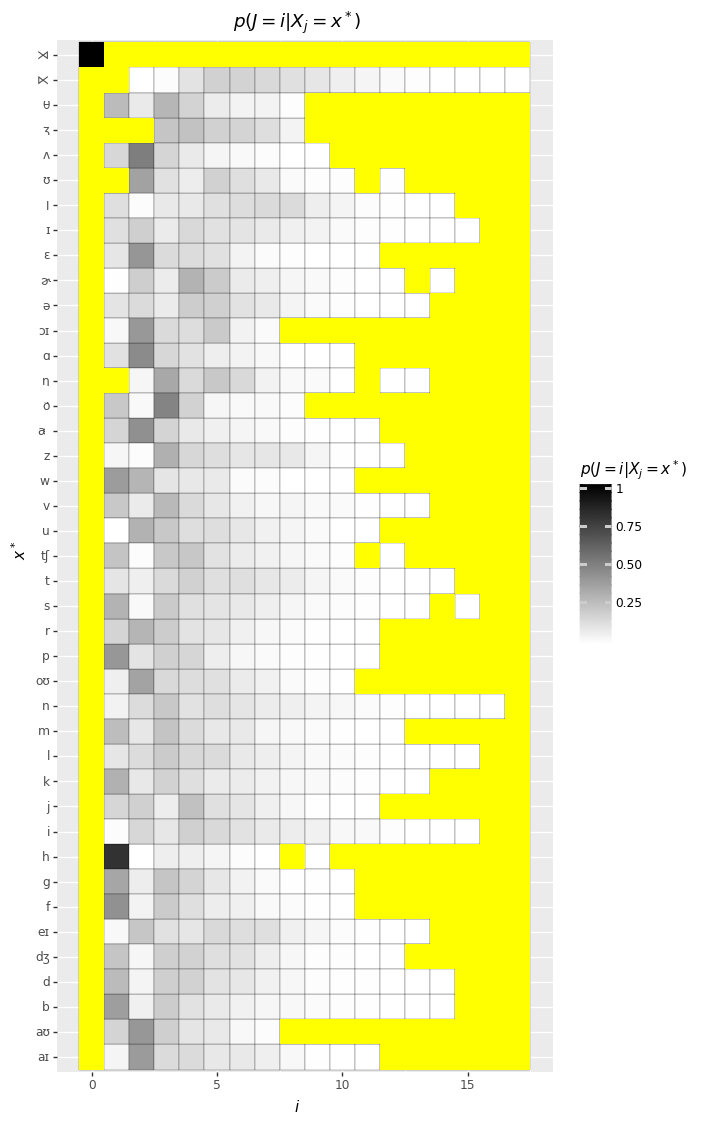

<ggplot: (8731923108423)>

In [396]:
pJX_hm_l = ggplot(pJX_df, aes("$i$", "$x^*$"))
pJX_hm_l = pJX_hm_l + scale_fill_gradient(low = 'white', high = 'black', na_value='yellow')
pJX_hm_l = pJX_hm_l + geom_tile(aes(fill='$p(J=i|X_j = x^*)$'), color='black') + coord_fixed()
pJX_hm_l = pJX_hm_l + geom_tile(fill = 'yellow', data = noData_pJX_df) + coord_fixed()
pJX_hm_l = pJX_hm_l + ggtitle('$p(J=i|X_j = x^*)$')
#pJX_hm_l = pJX_hm_l + theme_bw()
# pJX_hm_l = pJX_hm_l + theme(plot_background = element_rect(fill = "transparent"))
pJX_hm_l

/home/AD/emeinhar/anaconda3/envs/omnibus/lib/python3.6/site-packages/mizani/bounds.py:352: RuntimeWarning: invalid value encountered in less
  outside = (x < range[0]) | (x > range[1])
/home/AD/emeinhar/anaconda3/envs/omnibus/lib/python3.6/site-packages/mizani/bounds.py:352: RuntimeWarning: invalid value encountered in greater
  outside = (x < range[0]) | (x > range[1])
/home/AD/emeinhar/anaconda3/envs/omnibus/lib/python3.6/site-packages/matplotlib/colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


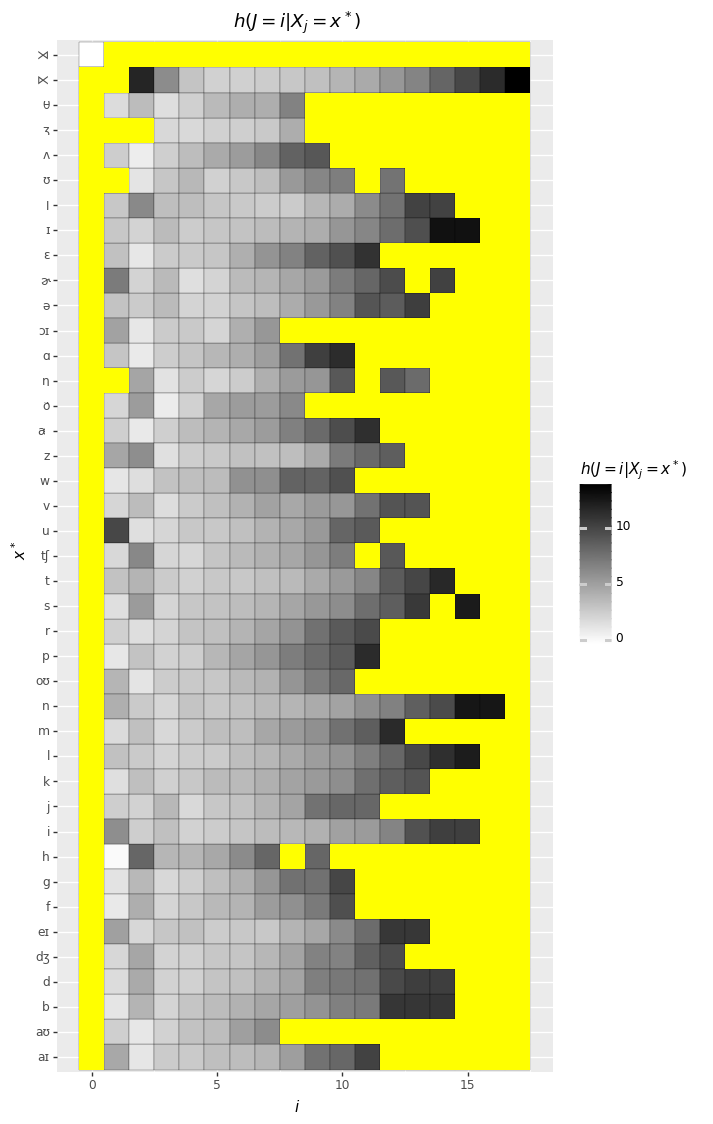

<ggplot: (8731678632929)>

In [397]:
hJX_hm_l = ggplot(hJX_df, aes("$i$", "$x^*$"))
hJX_hm_l = hJX_hm_l + scale_fill_gradient(low = 'white', high = 'black', na_value='yellow')
hJX_hm_l = hJX_hm_l + geom_tile(aes(fill='$h(J=i|X_j = x^*)$'), color='black') + coord_fixed()
hJX_hm_l = hJX_hm_l + geom_tile(fill = 'yellow', data = noData_pJX_df) + coord_fixed()
hJX_hm_l = hJX_hm_l + ggtitle('$h(J=i|X_j = x^*)$')
#hJX_hm_l = hJX_hm_l + theme_bw()
# hJX_hm_l = hJX_hm_l + theme(plot_background = element_rect(fill = "transparent"))
hJX_hm_l

This is Good.

Starting from this --- $p(J = i| X_J = x^*)$ --- we should be able to marginalize over possible values of $x^*$:
 - $p(J = i) = \sum\limits_{x^*} p(J = i| X_J = x^*)p(X_J = x^*)$
 
...but what's $p(X_J = x^*)$? that brings us back to where we already were.

What about the joint distribution $p(J = i, X_j = x^*)$?

In [461]:
choice(O_dicts)

{'i': 16, 'j_bar': 1, 'j': 1, 'c': 5819, 'x*': 'p', 'w': '⋊.p.eɪ.n.⋉'}

In [417]:
JXstar_observations = tuple(map(lambda row: (row['j'], row['x*']),
                                O_dicts))
len(JXstar_observations)
pJXstar = ProbDist(Counter(JXstar_observations))

def fill_pJXstar_df(j, x_star):
    if (j, x_star) in pJXstar:
        return float(pJXstar[(j, x_star)])
    return np.nan

pJXstar_df = pd.DataFrame(data=[{'$x^*$':x_star,
                                 '$j$':j,
                                 '$p(J = i, X_j = x^*)$':fill_pJXstar_df(j, x_star)}
                                for (j, x_star) in product(range(l_bar), Xs_lex)])
pJXstar_df.head()

hJXstar_df = pd.DataFrame(data=[{'$x^*$':x_star,
                                 '$j$':j,
                                 '$h(J = i, X_j = x^*)$':h_prime(fill_pJXstar_df(j, x_star))}
                                for (j, x_star) in product(range(l_bar), Xs_lex)])

99948

$j$  $p(J = i, X_j = x^*)$ $x^*$
0    0                    NaN     ɑ
1    0                    NaN    oʊ
2    0                    NaN    aɪ
3    0               0.125715     ⋊
4    0                    NaN     æ

In [413]:
noData_pJXstar_df = pJXstar_df[pJXstar_df['$p(J = i, X_j = x^*)$'].isnull()]
noData_pJXstar_df.head()

$j$  $p(J = i, X_j = x^*)$ $x^*$
0    0                    NaN     ɑ
1    0                    NaN    oʊ
2    0                    NaN    aɪ
4    0                    NaN     æ
5    0                    NaN     ʃ

/home/AD/emeinhar/anaconda3/envs/omnibus/lib/python3.6/site-packages/mizani/bounds.py:352: RuntimeWarning: invalid value encountered in less
  outside = (x < range[0]) | (x > range[1])
/home/AD/emeinhar/anaconda3/envs/omnibus/lib/python3.6/site-packages/mizani/bounds.py:352: RuntimeWarning: invalid value encountered in greater
  outside = (x < range[0]) | (x > range[1])
/home/AD/emeinhar/anaconda3/envs/omnibus/lib/python3.6/site-packages/matplotlib/colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


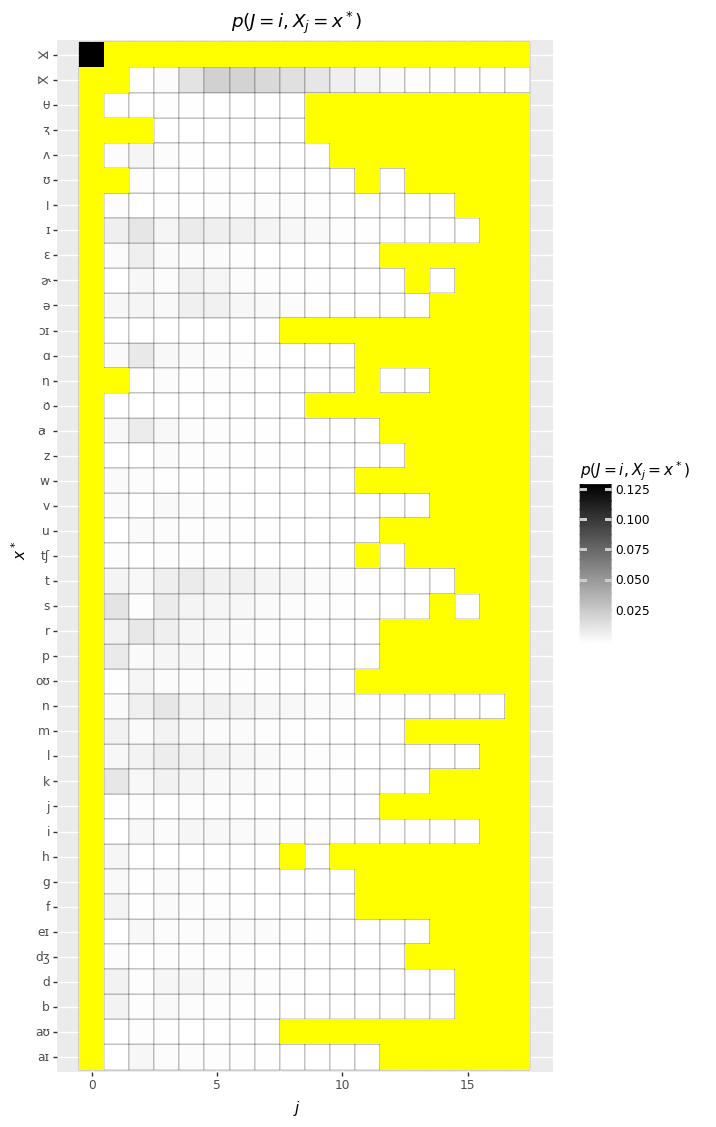

<ggplot: (-9223363305176809868)>

In [416]:
pJXstar_hm_l = ggplot(pJXstar_df, aes("$j$", "$x^*$"))
pJXstar_hm_l = pJXstar_hm_l + scale_fill_gradient(low = 'white', high = 'black', na_value='yellow')
pJXstar_hm_l = pJXstar_hm_l + geom_tile(aes(fill='$p(J = i, X_j = x^*)$'), color='black') + coord_fixed()
pJXstar_hm_l = pJXstar_hm_l + geom_tile(fill = 'yellow', data = noData_pJXstar_df) + coord_fixed()
pJXstar_hm_l = pJXstar_hm_l + ggtitle('$p(J = i, X_j = x^*)$')
#pJXstar_hm_l = pJXstar_hm_l + theme_bw()
# pJXstar_hm_l = pJXstar_hm_l + theme(plot_background = element_rect(fill = "transparent"))
pJXstar_hm_l

/home/AD/emeinhar/anaconda3/envs/omnibus/lib/python3.6/site-packages/mizani/bounds.py:352: RuntimeWarning: invalid value encountered in less
  outside = (x < range[0]) | (x > range[1])
/home/AD/emeinhar/anaconda3/envs/omnibus/lib/python3.6/site-packages/mizani/bounds.py:352: RuntimeWarning: invalid value encountered in greater
  outside = (x < range[0]) | (x > range[1])
/home/AD/emeinhar/anaconda3/envs/omnibus/lib/python3.6/site-packages/matplotlib/colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


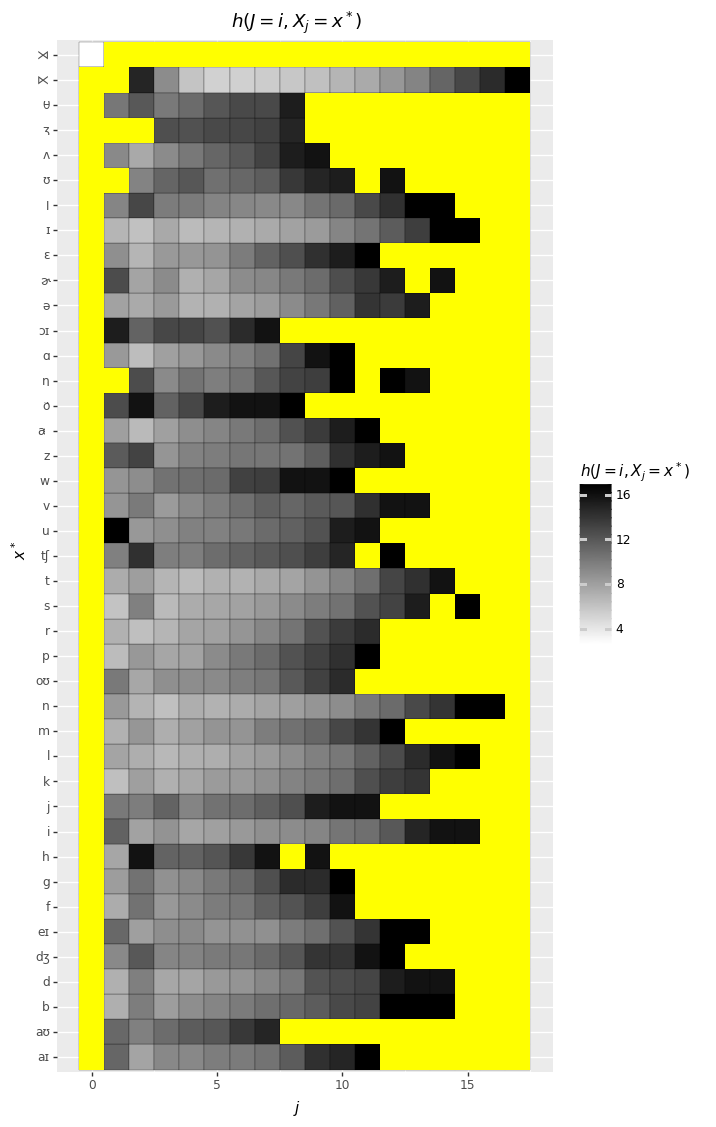

<ggplot: (-9223363305174269275)>

In [420]:
hJXstar_hm_l = ggplot(hJXstar_df, aes("$j$", "$x^*$"))
hJXstar_hm_l = hJXstar_hm_l + scale_fill_gradient(low = 'white', high = 'black', na_value='yellow')
hJXstar_hm_l = hJXstar_hm_l + geom_tile(aes(fill='$h(J = i, X_j = x^*)$'), color='black') + coord_fixed()
hJXstar_hm_l = hJXstar_hm_l + geom_tile(fill = 'yellow', data = noData_pJXstar_df) + coord_fixed()
hJXstar_hm_l = hJXstar_hm_l + ggtitle('$h(J = i, X_j = x^*)$')
#hJXstar_hm_l = hJXstar_hm_l + theme_bw()
# hJXstar_hm_l = hJXstar_hm_l + theme(plot_background = element_rect(fill = "transparent"))
hJXstar_hm_l

If `pJXstar` $p(J, X_J)$ really does represent the joint distribution we're after, then we should be able to recover the conditional distribution defined above (`pJX`). Can we?

$p(J = i)$:

In [429]:
pJ_fromPJXstar = {j:sum(tuple([pJXstar[(j_prime, x_star)] for j_prime, x_star in pJXstar if j_prime == j]))
                  for j in range(l_bar)}
isNormalized(pJ_fromPJXstar)
pJ_fromPJXstar = ProbDist(pJ_fromPJXstar)

True

$p(X_J)$:

In [430]:
pXstar_fromPJXstar = {x_star:sum([pJXstar[(j, x_prime)] for j, x_prime in pJXstar if x_prime == x_star])
                      for x_star in Xs_lex}
isNormalized(pXstar_fromPJXstar)
pXstar_fromPJXstar = ProbDist(pXstar_fromPJXstar)

True

$p(J = i | X_J = x^*)$

In [435]:
pJX_fromPJXstar = {x_star:{j:pJXstar[(j, x_star)]/pXstar_fromPJXstar[x_star]
                           for j in range(l_bar)}
                   for x_star in Xs_lex}
areNormalized(pJX_fromPJXstar)
pJX_fromPJXstar = condDistsAsProbDists(pJX_fromPJXstar)

True

In [440]:
for x_star in pJX:
    for j in pJX[x_star]:
        areDiff = isclose(pJX_fromPJXstar[x_star][j], pJX[x_star][j])
        theDiff = abs(pJX_fromPJXstar[x_star][j] - pJX[x_star][j])
        print(j, x_star, theDiff) if not areDiff else None

Great!

In [ ]:
# hXhatiX0f = {x0f:{i:{x_prime:h_prime( pXhatiX0f[x0f][i][x_prime] )
#                      for x_prime in Xs_lex}
#                   for i in range(l_bar)}
#              for x0f in Ws}

HXhatiX0f = {x0f:{i:{x_prime:h_prime( pXhatiX0f[x0f][i][x_prime] )
                     for x_prime in Xs_lex}
                  for i in range(l_bar)}
             for x0f in Ws}

### $i(\hat{X}_i = x^* ; x_0 \ldots x_{i-1}, x_{i+1} \ldots x_f | X_i = x^*)$

### $I(\hat{X}_i ; X_0 \ldots X_{i-1}, X_{i+1} \ldots X_f | X_i = x^*)$

### Average total contextual perceptual contrast: $D_{\overline{C}}(x^*,x') = D_{KL}(p(Y_i|X_i = x^*) || p(Y_i| X_i = x'))$

### Average total contextual discriminability: $\hat{D}_{\overline{C}}(x^*,x') = D_{KL}(p(\hat{X}_i|X_i = x^*) || p(\hat{X}_i| X_i = x'))$

In [191]:
randR = getRandomKey(pX0i)
randR

'⋊.l.aɪ.k.n'

In [217]:
pXhati_distX0k(randR)

array([  0.00000000e+00,   0.00000000e+00,   1.00921920e-04,
         3.03751760e-04,   0.00000000e+00,   0.00000000e+00,
         3.53142316e-03,   0.00000000e+00,   0.00000000e+00,
         1.83712672e-07,   0.00000000e+00,   8.38113070e-01,
         1.74995032e-04,   1.08123047e-03,   8.87989241e-04,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         9.49992391e-04,   1.26744345e-01,   0.00000000e+00,
         0.00000000e+00,   2.34215725e-02,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         2.51636899e-04,   9.94341818e-08,   1.91001300e-06,
         4.43687988e-03,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00])

In [234]:
incrementalEntropies_by_x0k = {x0k:entropy(pXhati_distX0k(x0k))
                               for x0k in prefixes}

/home/AD/emeinhar/anaconda3/envs/omnibus/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log2
  


In [235]:
incrementalEntropies_by_xstar_by_x0k = {x_star:{x0k:incrementalEntropies_by_x0k[x0k]
                                                for x0k in prefixesWhoseSecondToLastSegIs[x_star]}
                                        for x_star in Xs_lex}

In [285]:
HXhatiXstar_df = pd.DataFrame(data = [{'$x^*$':'{0}'.format(x_star),
                                       'global context':removeXi(x0k),
                                       '$H(\hat{X}_i|x_0, x_1, \ldots X_i = x^*, x_{i+1})$':incrementalEntropies_by_xstar_by_x0k[x_star][x0k]}
                                        for x_star in Xs for x0k in incrementalEntropies_by_xstar_by_x0k[x_star]])
HXhatiXstar_df.head()

$H(\hat{X}_i|x_0, x_1, \ldots X_i = x^*, x_{i+1})$ $x^*$  \
0                                           0.086165      ʒ   
1                                           0.313488      ʒ   
2                                           0.004545      ʒ   
3                                           0.337064      ʒ   
4                                           0.000000      ʒ   

       global context  
0       ⋊.d.ə.v.ɪ._.ɪ  
1         ⋊.ə.v.ɚ._.ɪ  
2         ⋊.l.ʌ.g._.ʊ  
3           ⋊.v.ɪ._.u  
4  ⋊.j.u.θ.ə.n.eɪ._.j

In [287]:
HXhatiXstar_df.sort_values(['$H(\hat{X}_i|x_0, x_1, \ldots X_i = x^*, x_{i+1})$'], ascending=False)

$H(\hat{X}_i|x_0, x_1, \ldots X_i = x^*, x_{i+1})$ $x^*$  \
38034                                       4.062980e+00      z   
2844                                        4.048900e+00     ɔɪ   
41898                                       4.034015e+00     aɪ   
38206                                       3.995439e+00      z   
37760                                       3.991882e+00      z   
2830                                        3.985299e+00     ɔɪ   
38274                                       3.974479e+00      z   
41951                                       3.937197e+00     aɪ   
41979                                       3.888768e+00     aɪ   
37779                                       3.864408e+00      z   
41097                                       3.846592e+00      ɚ   
37717                                       3.827302e+00      z   
5177                                        3.804601e+00      æ   
37752                                       3.801027e+00      z   
38251                                       3.800154e+00      z   
12755                                       3.777160e+00      ə   
251                                         3.767455e+00      g   
41783                                       3.747100e+00     aɪ   
41589                                       3.739571e+00     aɪ   
1970                                        3.699308e+00     eɪ   
41933                                       3.697093e+00     aɪ   
41330                                       3.665659e+00     aɪ   
12842                                       3.661950e+00      ə   
11671                                       3.642999e+00      ə   
11485                                       3.626292e+00      ə   
41521                                       3.600225e+00     aɪ   
5396                                        3.592930e+00      æ   
12273                                       3.558986e+00      ə   
2820                                        3.555543e+00     ɔɪ   
12555                                       3.549600e+00      ə   
...                                                  ...    ...   
23083                                      -1.719827e-07      t   
1637                                       -1.719827e-07     eɪ   
6990                                       -1.719827e-07      n   
20761                                      -1.719827e-07      t   
13939                                      -1.719827e-07      r   
43303                                      -1.719827e-07      d   
31446                                      -1.719827e-07      ɪ   
40774                                      -1.719827e-07      ɚ   
8382                                       -1.719827e-07      n   
13902                                      -1.719827e-07      r   
19023                                      -1.719827e-07      l   
11569                                      -1.719827e-07      ə   
13879                                      -1.719827e-07      r   
24724                                      -1.719827e-07      k   
30403                                      -1.719827e-07      ɪ   
7013                                       -1.719827e-07      n   
36613                                      -1.719827e-07      i   
39218                                      -1.719827e-07      p   
21633                                      -1.719827e-07      t   
36610                                      -1.719827e-07      i   
19000                                      -1.719827e-07      l   
26094                                      -3.439653e-07      k   
25713                                      -3.439653e-07      k   
13428                                      -3.439653e-07      ə   
8373                                       -3.439653e-07      n   
30856                                      -3.439653e-07      ɪ   
30997                                      -3.439653e-07      ɪ   
6234                                       -3.439653e-

/home/AD/emeinhar/anaconda3/envs/omnibus/lib/python3.6/site-packages/plotnine/layer.py:449: UserWarning: geom_jitter : Removed 379 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


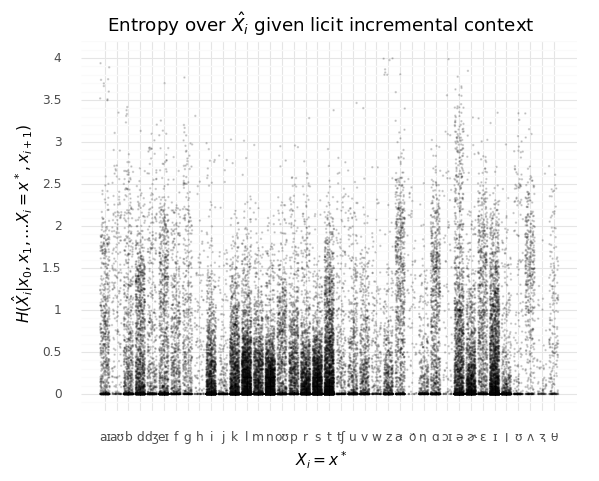

<ggplot: (8768155481590)>

In [292]:
plot(HXhatiXstar_df, 
     x_col = '$x^*$', 
     y_col = '$H(\hat{X}_i|x_0, x_1, \ldots X_i = x^*, x_{i+1})$', 
     title = 'Entropy over $\hat{X_i}$ given licit incremental context', 
     x_label = '$X_i = x^*$', 
     y_label = '$H(\hat{X}_i|x_0, x_1, \ldots X_i = x^*, x_{i+1})$', 
     y_min = 0.0,
     y_max = 4.0,
     size=smallSize, 
     alpha=lowAlpha,
     width=largeWidth)

In [214]:
x_i = 'k'
j = 3
T_normalized[prefixMap['⋊.l.aɪ.k.n'],Xs_lexMap[x_i], j]# / np.sum(T[prefixMap['⋊.r.eɪ.z.n.⋉'],:, j])

0.83811306224619275

In [216]:
pXhatiX0k('k', '⋊.l.aɪ.k.n')

0.83811306953430176

In [196]:
# x_i = 'z'
j = 3
T_normalized[prefixMap['⋊.l.aɪ.k.n'],:, j]# / np.sum(T[prefixMap['⋊.r.eɪ.z.n.⋉'],:, j])

array([  0.00000000e+00,   0.00000000e+00,   1.00921920e-04,
         3.03751771e-04,   0.00000000e+00,   0.00000000e+00,
         3.53142319e-03,   0.00000000e+00,   0.00000000e+00,
         1.83712672e-07,   0.00000000e+00,   8.38113062e-01,
         1.74995032e-04,   1.08123047e-03,   8.87989249e-04,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         9.49992350e-04,   1.26744351e-01,   0.00000000e+00,
         0.00000000e+00,   2.34215727e-02,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         2.51636886e-04,   9.94341818e-08,   1.91001300e-06,
         4.43687978e-03,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00])

In [200]:
-1.0 * np.log2(np.array([0.5,0.25]))

array([ 1.,  2.])

In [232]:
from itertools import starmap

In [233]:
def entropy(probVec):
    old_calc = np.dot(probVec, -1.0 * np.log2(probVec))
    terms = np.array([(p, -1.0*np.log2(p) if p > 0.0 else 0.0) for p in probVec])
    prods = np.array(list(starmap(lambda p, logp: p * logp,
                                  terms)))
    s = np.sum(prods)
    return s

entropy(np.array([0.5, 0.5]))
entropy(np.array([0.25, 0.25, 0.25, 0.25]))

1.0

2.0

In [182]:
randW = getRandomKey(pW)
randW

'⋊.l.æ.n.d.l.ɑ.k.t.⋉'

In [213]:
pXhatiX0k('z', '⋊.r.eɪ.z.n.⋉')

0.0

In [220]:
pXhatiX0k('z', '⋊.r.eɪ.z.n')

0.92141151428222656

In [409]:
x_i = 'z'
j = 3
T_normalized[prefixMap['⋊.r.eɪ.z.n'],Xs_lexMap[x_i], j]# / np.sum(T[prefixMap['⋊.r.eɪ.z.n.⋉'],:, j])

0.92141137901831738

In [147]:
pXhatiX0k('z', '⋊.r.eɪ.z.n.⋉')
pXhatiX0k(ds2t(randW)[-2], randW)

0.93540030717849731

1.0

In [150]:
T.shape

(46186, 41, 18)

In [160]:
x_i = 'z'
j = 3
T[prefixMap['⋊.r.eɪ.z.n.⋉'],Xs_lexMap[x_i], j] / np.sum(T[prefixMap['⋊.r.eɪ.z.n.⋉'],:, j])

0.92518661329202345

In [172]:
x_i = 'z'
j = 3
T_normalized[prefixMap['⋊.r.eɪ.z.n.⋉'],Xs_lexMap[x_i], j]# / np.sum(T[prefixMap['⋊.r.eɪ.z.n.⋉'],:, j])

0.92518661329202345

 - For each $x^*$, collect the set of prefixes $R_{x^*} = \{x_0^{i}; x_{i+1} | x_i = x^*\}$.
 - For each such prefix $r_j = x_0^{i+1}$, what is $p(\hat{X}_i = x^* | x_0^{i+1} = r_j)$?

$\{\hat{p}(\widehat{X}_i = x^* | x_0^i;x_{i+1}) | x_i = x^* \}$

In [245]:
prefixesWhoseSecondToLastSegIs.keys()

dict_keys(['ʒ', 'g', 'v', 'θ', 'eɪ', 'ɔɪ', 'u', 'ɛ', 'æ', 'h', 'n', '⋊', 'w', 'dʒ', 'f', 'ŋ', 'ə', 'r', 'oʊ', 'b', 'l', 't', 'k', 's', 'aʊ', 'ɪ', 'ʃ', 'ʊ', 'ʌ', 'i', 'j', 'tʃ', '⋉', 'z', 'p', 'ɚ', 'ð', 'aɪ', 'ɑ', 'd', 'm'])

In [246]:
pXhatiStarX0k = {x_star:{x0k:pXhatiX0k(x_star, x0k)
                         for x0k in prefixesWhoseSecondToLastSegIs[x_star]}
                 for x_star in Xs_lex}

In [247]:
hXhatiStarX0k = {x_star:{x0k:h_prime( pXhatiX0k(x_star, x0k) )
                         for x0k in prefixesWhoseSecondToLastSegIs[x_star]}
                 for x_star in Xs}

In [248]:
def removeXi(x0k):
    x0k_t = ds2t(x0k)
    l = len(x0k_t)
    
    before_t = x0k_t[:-2]
    before_ds = t2ds(before_t)
    x_i = x0k_t[-2]
#     i = l - 2
    x_k = x0k_t[-1]
    return before_ds + '._.' + x_k

removeXi('b.i.p.b.u.p')

'b.i.p.b._.p'

In [249]:
def leftContext(x0k):
    x0k_t = ds2t(x0k)
    l = len(x0k_t)
    
    before_t = x0k_t[:-3]
    before_ds = t2ds(before_t)
#     x_i = x0k_t[-2]
#     i = l - 2
#     x_k = x0k_t[-1]
    return before_ds# + '._.' + x_k

leftContext('b.i.p.b.u.p')
leftContext('b.i.p')

'b.i.p'

''

In [250]:
hXhatiStarX0k_df = pd.DataFrame(data = [{'$x^*$':'{0}'.format(x_star),
                                         'global context':removeXi(x0k),
                                         '$h(\hat{X}_i = x^*|x_0, x_1, \ldots X_i = x^*, x_{i+1})$':hXhatiStarX0k[x_star][x0k]}
                                        for x_star in Xs for x0k in hXhatiStarX0k[x_star]])
hXhatiStarX0k_df.head()

$h(\hat{X}_i = x^*|x_0, x_1, \ldots X_i = x^*, x_{i+1})$ $x^*$  \
0                                           0.015144            ʒ   
1                                           0.066076            ʒ   
2                                           0.000506            ʒ   
3                                           0.060922            ʒ   
4                                          -0.000000            ʒ   

       global context  
0       ⋊.d.ə.v.ɪ._.ɪ  
1         ⋊.ə.v.ɚ._.ɪ  
2         ⋊.l.ʌ.g._.ʊ  
3           ⋊.v.ɪ._.u  
4  ⋊.j.u.θ.ə.n.eɪ._.j

In [251]:
hXhatiStarX0k_df.sort_values(['$h(\hat{X}_i = x^*|x_0, x_1, \ldots X_i = x^*, x_{i+1})$'], ascending=False)

$h(\hat{X}_i = x^*|x_0, x_1, \ldots X_i = x^*, x_{i+1})$ $x^*$  \
1343                                        7.199864e+00            θ   
42414                                       7.176518e+00            ɑ   
34590                                       6.127886e+00            ʌ   
42412                                       5.878139e+00            ɑ   
41303                                       5.845818e+00            ð   
43297                                       5.394164e+00            d   
2571                                        5.185967e+00           eɪ   
1183                                        5.053764e+00            v   
44232                                       5.045267e+00            d   
13172                                       5.007948e+00            ə   
34433                                       4.966205e+00            ʊ   
41277                                       4.954658e+00            ð   
11343                                       4.808800e+00            ə   
1336                                        4.712397e+00            θ   
43295                                       4.701505e+00            d   
41309                                       4.662920e+00            ð   
970                                         4.630583e+00            v   
1034                                        4.620815e+00            v   
10432                                       4.549609e+00            f   
34249                                       4.524807e+00            ʊ   
2922                                        4.449645e+00            u   
945                                         4.430257e+00            v   
34503                                       4.429090e+00            ʌ   
43506                                       4.421965e+00            d   
12051                                       4.418172e+00            ə   
41815                                       4.392841e+00           aɪ   
3822                                        4.334491e+00            ɛ   
11240                                       4.302062e+00            ə   
916                                         4.301575e+00            v   
578                                         4.300227e+00            v   
...                                                  ...          ...   
23083                                      -1.719826e-07            t   
1637                                       -1.719826e-07           eɪ   
6990                                       -1.719826e-07            n   
20761                                      -1.719826e-07            t   
40774                                      -1.719826e-07            ɚ   
43303                                      -1.719826e-07            d   
13939                                      -1.719826e-07            r   
31446                                      -1.719826e-07            ɪ   
8382                                       -1.719826e-07            n   
19023                                      -1.719826e-07            l   
11554                                      -1.719826e-07            ə   
39218                                      -1.719826e-07            p   
36613                                      -1.719826e-07            i   
30403                                      -1.719826e-07            ɪ   
21633                                      -1.719826e-07            t   
36610                                      -1.719826e-07            i   
11569                                      -1.719826e-07            ə   
13879                                      -1.719826e-07            r   
19000                                      -1.719826e-07            l   
7013                                       -1.719826e-07            n   
24724                                      -1.719826e-07            k   
30997                                      -3.439653e-07            ɪ   
6234                                       -3.439653e-07         

/home/AD/emeinhar/anaconda3/envs/omnibus/lib/python3.6/site-packages/plotnine/layer.py:449: UserWarning: geom_jitter : Removed 376 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


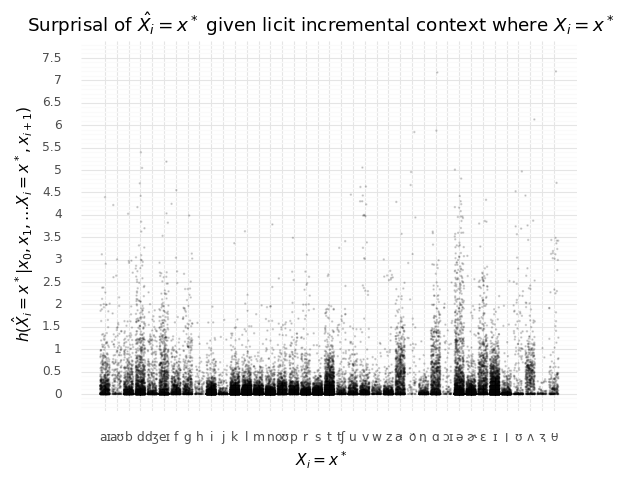

<ggplot: (-9223363268700278633)>

In [293]:
plot(hXhatiStarX0k_df, 
     x_col = '$x^*$', 
     y_col = '$h(\hat{X}_i = x^*|x_0, x_1, \ldots X_i = x^*, x_{i+1})$', 
     title = 'Surprisal of $\hat{X_i} = x^*$ given licit incremental context where $X_i = x^*$', 
     x_label = '$X_i = x^*$', 
     y_label = '$h(\hat{X}_i = x^*|x_0, x_1, \ldots X_i = x^*, x_{i+1})$', 
     y_min = 0.0,
     y_max = 7.5,
     size=smallSize, 
     alpha=lowAlpha,
     width=largeWidth)

$p(\widehat{X}_i = x' |X_i = x^*) = \sum\limits_{x_0^{i}; x_{i+1} | x_i = x^*} p(\widehat{X}_i = x'|x_0, x_1, \ldots X_i = x^*; x_{i+1}) p(x_0^i;x_{i+1})$

In [255]:
def pXhatiXi_calc(x_prime, x_star):
    x_star_idx = Xs_lexMap[x_star]
    x_prime_idx = Xs_lexMap[x_prime]
    
    my_prefixes = prefixesWhoseSecondToLastSegIs[x_star]
    return np.sum([pX0i[x0k] * pXhatiX0k(x_prime, x0k)
                   for x0k in my_prefixes])

In [256]:
pXhatiXi_np = np.zeros((len(Xs_lexMap), len(Xs_lexMap)))

for x_prime, x_star in product(Xs_lex, Xs_lex):
    pXhatiXi_np[Xs_lexMap[x_prime], Xs_lexMap[x_star]] = pXhatiXi_calc(x_prime, x_star)

In [257]:
def pXhatiXi(x_prime, x_star):
    return pXhatiXi_np[Xs_lexMap[x_prime], Xs_lexMap[x_star]]

In [258]:
hXhatiStarXiStar = {x_star:h_prime(pXhatiXi(x_star, x_star))
                    for x_star in Xs}

In [259]:
hXhatiStarXiStar_df = pd.DataFrame(data = [{'$x^*$':'{0}'.format(x_star),
                                         '$h(\hat{X}_i = x^*|X_i = x^*)$':hXhatiStarXiStar[x_star]}
                                        for x_star in Xs])
hXhatiStarXiStar_df.head()

$h(\hat{X}_i = x^*|X_i = x^*)$ $x^*$
0                        9.284203     ʒ
1                        5.826619     g
2                        3.907742     v
3                        5.835503     θ
4                        4.759030    eɪ

In [260]:
hXhatiStarXiStar_df.sort_values(['$h(\hat{X}_i = x^*|X_i = x^*)$'], ascending=True)

$h(\hat{X}_i = x^*|X_i = x^*)$ $x^*$
10                        2.044534     n
20                        2.202874     t
24                        2.276567     ɪ
15                        2.711359     ə
22                        2.916573     s
16                        3.015272     r
19                        3.108523     l
37                        3.190116     d
9                         3.231847     æ
34                        3.265171     ð
29                        3.353926     i
38                        3.579993     m
21                        3.580610     k
6                         3.593186     u
33                        3.855924     ɚ
2                         3.907742     v
18                        3.923671    oʊ
12                        3.954230     w
36                        3.958321     ɑ
8                         3.962730     h
31                        3.992338     z
7                         4.099164     ɛ
35                        4.216412    aɪ
13                        4.298700     f
32                        4.393523     p
17                        4.419053     b
27                        4.548197     ʌ
4                         4.759030    eɪ
28                        5.330342     j
25                        5.359129     ʃ
14                        5.621579     ŋ
23                        5.699414    aʊ
1                         5.826619     g
3                         5.835503     θ
30                        5.992846    tʃ
26                        6.151718     ʊ
11                        6.224166    dʒ
5                         8.855008    ɔɪ
0                         9.284203     ʒ

In [261]:
hXhatiStarXiStar_df.sort_values(['$h(\hat{X}_i = x^*|X_i = x^*)$'], ascending=False)

$h(\hat{X}_i = x^*|X_i = x^*)$ $x^*$
0                         9.284203     ʒ
5                         8.855008    ɔɪ
11                        6.224166    dʒ
26                        6.151718     ʊ
30                        5.992846    tʃ
3                         5.835503     θ
1                         5.826619     g
23                        5.699414    aʊ
14                        5.621579     ŋ
25                        5.359129     ʃ
28                        5.330342     j
4                         4.759030    eɪ
27                        4.548197     ʌ
17                        4.419053     b
32                        4.393523     p
13                        4.298700     f
35                        4.216412    aɪ
7                         4.099164     ɛ
31                        3.992338     z
8                         3.962730     h
36                        3.958321     ɑ
12                        3.954230     w
18                        3.923671    oʊ
2                         3.907742     v
33                        3.855924     ɚ
6                         3.593186     u
21                        3.580610     k
38                        3.579993     m
29                        3.353926     i
34                        3.265171     ð
9                         3.231847     æ
37                        3.190116     d
19                        3.108523     l
16                        3.015272     r
22                        2.916573     s
15                        2.711359     ə
24                        2.276567     ɪ
20                        2.202874     t
10                        2.044534     n

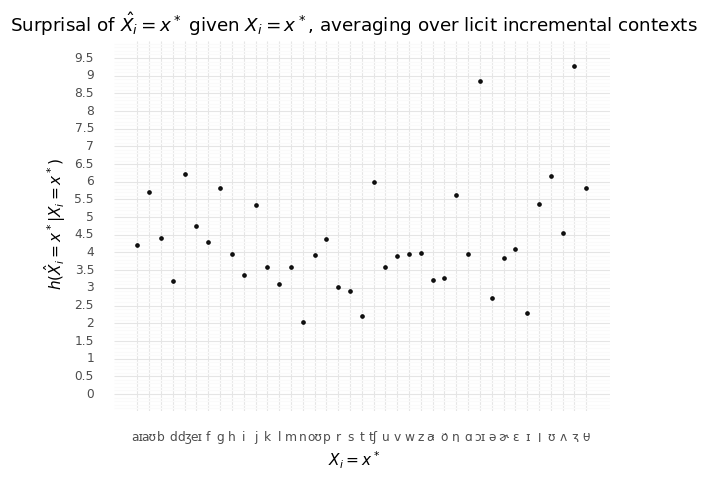

<ggplot: (8768139782941)>

In [296]:
plot(hXhatiStarXiStar_df, 
     x_col = '$x^*$', 
     y_col = '$h(\hat{X}_i = x^*|X_i = x^*)$', 
     title = 'Surprisal of $\hat{X_i} = x^*$ given $X_i = x^*$, averaging over licit incremental contexts', 
     x_label = '$X_i = x^*$', 
     y_label = '$h(\hat{X}_i = x^*|X_i = x^*)$', 
     y_min = 0.0,
     y_max = 9.5,
     size=largeSize, 
     alpha=highAlpha,
     width=0.0)

$i(\widehat{X}_i = x^*;x_0, x_1, \ldots x_{i+1} | X_i = x^*) = h(\widehat{X}_i = x^* | X_i = x^*) - h(\widehat{X}_i = x^* | x_0, x_1, \ldots X_i = x^*; x_{i+1})$

In [297]:
iXhatiStarX0kXiStar = {x_star:{x0k:h_prime( pXhatiXi(x_star, x_star) ) - h_prime( pXhatiX0k(x_star, x0k) )
                               for x0k in prefixesWhoseSecondToLastSegIs[x_star]}
                       for x_star in Xs}

In [298]:
iXhatiStarX0kXiStar_df = pd.DataFrame(data = [{'$x^*$':'{0}'.format(x_star),
                                               'global context':x0k,
                                               '$i(\hat{X}_i = x^*; x_0, x_1, \ldots \_, x_{i+1} |X_i = x^*)$':iXhatiStarX0kXiStar[x_star][x0k]}
                                        for x_star in Xs for x0k in iXhatiStarX0kXiStar[x_star]])
iXhatiStarX0kXiStar_df.head()

$i(\hat{X}_i = x^*; x_0, x_1, \ldots \_, x_{i+1} |X_i = x^*)$ $x^*$  \
0                                           9.269059                 ʒ   
1                                           9.218127                 ʒ   
2                                           9.283697                 ʒ   
3                                           9.223281                 ʒ   
4                                           9.284203                 ʒ   

       global context  
0       ⋊.d.ə.v.ɪ.ʒ.ɪ  
1         ⋊.ə.v.ɚ.ʒ.ɪ  
2         ⋊.l.ʌ.g.ʒ.ʊ  
3           ⋊.v.ɪ.ʒ.u  
4  ⋊.j.u.θ.ə.n.eɪ.ʒ.j

In [299]:
iXhatiStarX0kXiStar_df.sort_values(['$i(\hat{X}_i = x^*; x_0, x_1, \ldots \_, x_{i+1} |X_i = x^*)$'], ascending=False)

$i(\hat{X}_i = x^*; x_0, x_1, \ldots \_, x_{i+1} |X_i = x^*)$ $x^*$  \
58                                              9.284203                 ʒ   
62                                              9.284203                 ʒ   
37                                              9.284203                 ʒ   
44                                              9.284203                 ʒ   
30                                              9.284203                 ʒ   
29                                              9.284203                 ʒ   
26                                              9.284203                 ʒ   
47                                              9.284203                 ʒ   
22                                              9.284203                 ʒ   
48                                              9.284203                 ʒ   
39                                              9.284203                 ʒ   
54                                              9.284203                 ʒ   
55                                              9.284203                 ʒ   
15                                              9.284203                 ʒ   
19                                              9.284203                 ʒ   
66                                              9.284203                 ʒ   
72                                              9.284203                 ʒ   
73                                              9.284203                 ʒ   
4                                               9.284203                 ʒ   
70                                              9.284203                 ʒ   
7                                               9.284203                 ʒ   
5                                               9.284203                 ʒ   
67                                              9.284203                 ʒ   
2                                               9.283697                 ʒ   
52                                              9.283559                 ʒ   
18                                              9.283110                 ʒ   
27                                              9.282258                 ʒ   
69                                              9.281855                 ʒ   
36                                              9.281316                 ʒ   
33                                              9.280498                 ʒ   
...                                                  ...               ...   
11741                                          -0.890756                 ə   
43934                                          -0.980121                 d   
12631                                          -0.993011                 ə   
4718                                           -1.054293                 æ   
1183                                           -1.146023                 v   
11908                                          -1.149329                 ə   
11735                                          -1.216301                 ə   
43506                                          -1.231848                 d   
12526                                          -1.239142                 ə   
11292                                          -1.247300                 ə   
11645                                          -1.248353                 ə   
1343                                           -1.364362                 θ   
13096                                          -1.369416                 ə   
41309                                          -1.397748                 ð   
12992                                          -1.448396                 ə   
13138                                          -1.459195                 ə   
43295                                          -1.511389                 d   
12878                                          -1.525306                 ə   
34590                                          -1.579689                 ʌ   
11240                        

/home/AD/emeinhar/anaconda3/envs/omnibus/lib/python3.6/site-packages/plotnine/layer.py:449: UserWarning: geom_jitter : Removed 70 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


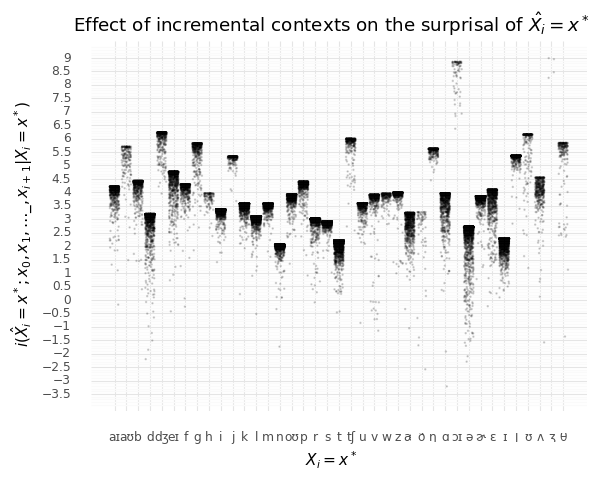

<ggplot: (-9223363268714942292)>

In [301]:
plot(iXhatiStarX0kXiStar_df, 
     x_col = '$x^*$', 
     y_col = '$i(\hat{X}_i = x^*; x_0, x_1, \ldots \_, x_{i+1} |X_i = x^*)$', 
     title = 'Effect of incremental contexts on the surprisal of $\hat{X_i} = x^*$', 
     x_label = '$X_i = x^*$', 
     y_label = '$i(\hat{X}_i = x^*; x_0, x_1, \ldots \_, x_{i+1} |X_i = x^*)$', 
     y_min = -3.5,
     y_max = 9.0,
     size=smallSize, 
     alpha=lowAlpha,
     width=largeWidth)

What about conditioning on whole words?

For some $x^*$:
 - Let $o_{x^*} = \{(x_0^f, i)|x_i = x^*\}$.
 - Let $o^p_{x^*} = \{p(\hat{x}_i = x^*|x_0^f) | (x_0^f, i) \in o_{x^*}\}$, where
   - $p(\hat{x}_i = x^* | x_0^f) = \sum\limits_{\hat{x}_0^f:\hat{x}_i = x^*} p(\hat{x}_0^f|x_0^f)$
 - $p(\hat{x}_i = x^* | x_i = x^*) = \sum\limits_{x_0^f: x_i = x^*} p(\hat{x}_i = x^* | x_0^f) p(x_0^f)$

In [142]:
def occurrenceRelation(x_star):
    return union([{(w, i) 
                   for w in wordsWhereXiIs(x_star, i)} 
                  for i in range(max(wordlengthsInclEdges)) if wordsWhereXiIs(x_star, i) != set()])
occurrenceRelation('b')

{('⋊.f.ɚ.s.t.b.ɑ.r.n.⋉', 5),
 ('⋊.v.ɛ.dʒ.t.ə.b.l.⋉', 6),
 ('⋊.ə.d.m.ɪ.s.ə.b.l.⋉', 7),
 ('⋊.m.ɑ.r.b.ɪ.d.ɪ.t.i.⋉', 4),
 ('⋊.t.r.ɛ.b.l.⋉', 4),
 ('⋊.ɪ.n.k.r.ɛ.d.ə.b.l.i.⋉', 8),
 ('⋊.b.ɑ.n.d.⋉', 1),
 ('⋊.t.eɪ.b.l.s.p.u.n.⋉', 3),
 ('⋊.b.r.oʊ.k.ɚ.⋉', 1),
 ('⋊.ɪ.r.ɪ.s.p.ɑ.n.s.ə.b.l.⋉', 10),
 ('⋊.n.ɛ.b.⋉', 3),
 ('⋊.b.aɪ.s.ɛ.p.s.⋉', 1),
 ('⋊.ɛ.k.w.ə.t.ə.b.l.⋉', 7),
 ('⋊.b.l.ɑ.z.eɪ.⋉', 1),
 ('⋊.h.ʌ.b.⋉', 3),
 ('⋊.b.oʊ.r.d.ə.m.⋉', 1),
 ('⋊.ɪ.n.s.eɪ.ʃ.ə.b.l.⋉', 7),
 ('⋊.b.r.eɪ.l.⋉', 1),
 ('⋊.b.eɪ.l.ə.f.⋉', 1),
 ('⋊.b.ɑ.r.b.d.⋉', 4),
 ('⋊.ə.b.r.ʌ.p.t.⋉', 2),
 ('⋊.b.r.eɪ.ʒ.ɚ.⋉', 1),
 ('⋊.k.ɑ.b.l.s.t.oʊ.n.⋉', 3),
 ('⋊.b.aɪ.ə.s.⋉', 1),
 ('⋊.b.ɑ.r.b.⋉', 1),
 ('⋊.b.l.u.m.ɚ.z.⋉', 1),
 ('⋊.b.ɑ.n.d.ɪ.dʒ.⋉', 1),
 ('⋊.l.eɪ.b.ɚ.⋉', 3),
 ('⋊.k.ɑ.l.ə.m.b.aɪ.n.⋉', 6),
 ('⋊.r.æ.m.b.ʌ.ŋ.k.ʃ.ɪ.s.⋉', 4),
 ('⋊.d.ə.b.r.i.⋉', 3),
 ('⋊.h.ʌ.m.b.l.⋉', 4),
 ('⋊.ɛ.b.j.ʊ.l.ə.n.t.⋉', 2),
 ('⋊.ɛ.d.ə.b.l.⋉', 4),
 ('⋊.ɪ.m.oʊ.b.ɪ.l.ɪ.t.i.⋉', 4),
 ('⋊.b.æ.s.t.ɚ.d.⋉', 1),
 ('⋊.w.ɑ.r.d.r.oʊ.b.⋉', 7),
 ('⋊.æ.b.s.ɪ.n.t.i.⋉', 2),
 ('⋊.k

limit_output extension: Maximum message size of 10000 exceeded with 25989 characters

In [146]:
# pXhatiX0f_by_Xstar = {x_star:{(x0f,i):{x_hat_i_prime:sum(phatXhat0fX0k(xhat0f, x0f) 
#                                                          for xhat0f in wordsWhereXiIs(x_hat_i_prime, i))
#                                        for x_hat_i_prime in Xs_lex}
#                               for (x0f,i) in occurrenceRelation(x_star)}
#                       for x_star in Xs_lex}

# def pxhati_given_x0f(x_hat_i_prime, x0f, i):
# #     return sum(phatXhat0fX0k(xhat0f, x0f) 
# #                for xhat0f in wordsWhereXiIs(x_hat_i_prime, i))
#     return (x_hat_i_prime, sum(phatXhat0fX0k(xhat0f, x0f) 
#                                for xhat0f in wordsWhereXiIs(x_hat_i_prime, i)))

def pXhati_given_x0f(i, x0f):
    dist = {x_hat_i_prime:sum(phatXhat0fX0k(xhat0f, x0f) 
                              for xhat0f in wordsWhereXiIs(x_hat_i_prime, i))
            for x_hat_i_prime in Xs_lex}
    return ((x0f, i), dist)
#     dist = Parallel(n_jobs=-1, backend='multiprocessing')(delayed(pxhati_given_x0f)(x_hat_i_prime, x0f, i)
#                                                                       for x_hat_i_prime in Xs_lex)
#     dist = dict(dist)
#     return dist

# pXhatiX0f_by_Xstar = {x_star:{(x0f,i):pXhati_given_x0f(i, x0f)
#                               for (x0f,i) in occurrenceRelation(x_star)}
#                       for x_star in Xs_lex}

# i have no idea what a good name for this function is
def wordDists(x_star):
    distMap = Parallel(n_jobs=-1, backend='multiprocessing', verbose=1)(delayed(pXhati_given_x0f)(i, x0f)
                                                             for (x0f,i) in occurrenceRelation(x_star))
    return dict(distMap)

# takes 23m [kotoba/python3]
pXhatiX0f_by_Xstar = {x_star:wordDists(x_star)
                      for x_star in tqdm(Xs_lex)}


  0%|          | 0/41 [00:00<?, ?it/s][Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 252 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 642 out of 642 | elapsed:    9.0s finished

  2%|▏         | 1/41 [00:09<06:20,  9.52s/it][Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 252 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 554 out of 577 | elapsed:    8.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 577 out of 577 | elapsed:    8.1s finished

  5%|▍         | 2/41 [00:18<05:59,  9.22s/it][Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 12 concurrent workers.
[Paralle

[Parallel(n_jobs=-1)]: Done 2844 tasks      | elapsed:   38.8s
[Parallel(n_jobs=-1)]: Done 3528 tasks      | elapsed:   48.2s
[Parallel(n_jobs=-1)]: Done 3702 out of 3725 | elapsed:   50.6s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 3725 out of 3725 | elapsed:   50.8s finished

 41%|████▏     | 17/41 [04:52<09:05, 22.71s/it][Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 252 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 828 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 1224 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done 1692 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done 2232 tasks      | elapsed:   30.9s
[Parallel(n_jobs=-1)]: Done 2844 tasks      | elapsed:   39.3s
[Parallel(n_jobs=-1)]: Done 3528 tasks      | elapsed:   48.7s
[Parallel(n_jobs=-1

limit_output extension: Maximum message size of 10000 exceeded with 10011 characters

In [147]:
pXhatiX0f_by_Xstar_fn = which + ' ' + 'pXhatiX0f_by_Xstar_K2only' + '.json'
exportProbDist(pXhatiX0f_by_Xstar_fn, pXhatiX0f_by_Xstar)

TypeError: key ('⋊.w.ɑ.l.ə.p.⋉', 1) is not a string

In [ ]:
pXhatiStarX0f_by_Xstar = {x_star:{(x0f,i):pXhatiX0f_by_Xstar[x_star][(x0f,i)][x_star]
                                  for (x0f,i) in occurrenceRelation(x_star)}
                          for x_star in Xs_lex}

In [ ]:
pXhatiStarX0f_by_Xstar_fn = which + ' ' + 'pXhatiStarX0f_by_Xstar_K2only' + '.json'
exportProbDist(pXhatiStarX0f_by_Xstar_fn, pXhatiStarX0f_by_Xstar)

In [ ]:
for x_star in Xs_lex:
    for (x0f,i) in occurrenceRelation(x_star):
        assert isNormalized(pXhatiX0f_by_Xstar[x_star][(x0f,i)])

In [ ]:
hXhatiStarX0f_by_Xstar = {x_star:{(x0f,i):h_prime( pXhatiX0f_by_Xstar[x_star][(x0f,i)][x_star] )
                                  for (x0f,i) in occurrenceRelation(x_star)}
                          for x_star in Xs_lex}

In [ ]:
# pXhatiXistar_by_xstar = {x_star:{x_}
#                          for x_star in Xs_lex}